# fit1T mode0,mode1 実験まとめ

In [1]:
import sys,os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
import numpy as np
import matplotlib.pyplot as plt
import cv2
import wandb
import optuna
# from sympy import *
from sympy import diff,Symbol,Matrix,symbols,solve,simplify,binomial,lambdify,poly
from sympy.abc import a,b,c
# init_session()
from sympy import var
# px,py =var('px:4'),var('py:4')
from statistics import mean
import datetime
import time
datetime.datetime.now()

# Google Colaboratory の MyDrive パス
COLABRDROOT = "/content/drive/MyDrive/RadiShLab"

# ホーム
LOCALHOME = "."  # フォルダを絶対指定するならここを書き変えてください

# 環境判定（Google Colaboratory かどうかの判定）
try:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append(COLABRDROOT+'/rdlib')
    COLABORATORY = True
except ImportError:
    sys.path.append('./rdlib')
    COLABORATORY = False
import rdexper as rd

# フォルダ指定
labhome = COLABRDROOT if COLABORATORY else LOCALHOME

NSilF = labhome+'/RDSamples/NSilImages' # 正規化されたシルエット画像のフォルダ
imgs = rd.collectimages(NSilF)       # シルエット画像のリスト

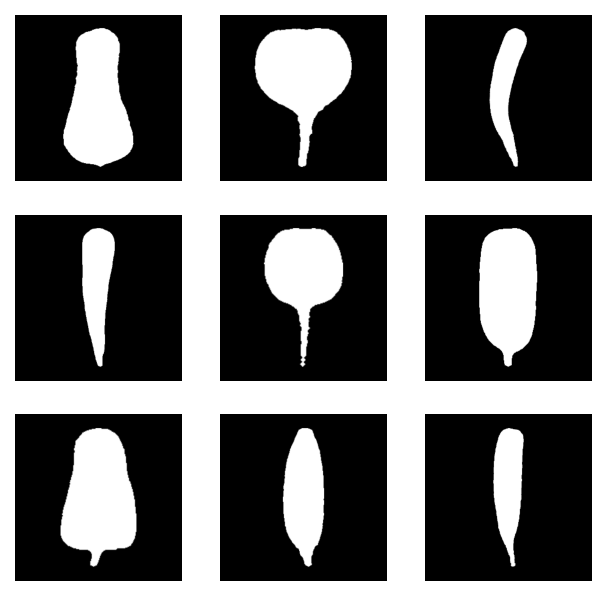

In [2]:
NSilF = labhome+'/RDSamples/NSilImages' # 正規化されたシルエット画像のフォルダ
imgs = rd.collectimages(NSilF)       # シルエット画像のリスト
#imgs = collectimages(NSilF)       # シルエット画像のリスト
plt.figure(figsize=(5,5),dpi=150)
for i in range(9):
  rd.plotimg(imgs[i],330+i+1)
  #plotimg(imgs[i],330+i+1)


In [6]:
import time
rd.convg_coe = 1e-7
rd.BezierCurve.mloop_itt=3

lr = 0.001
lrP = 30000 
def check1T0(imgnum,mode=0,Nsamples=65,Nfrom=5,Nto=20,err_th=0.65,withFig=True):
    results = {}
    for N in range(Nfrom,Nto+1):
      print(N,end='')
      start = time.process_time()
      img = imgs[imgnum]
      conAll = rd.getCntPairWithImg(img, mode=1, dbtmdr=3) # 全周輪郭を得る
      Samples = rd.getSamples(conAll,N=Nsamples,mode='Equidistant')
      bez = rd.BezierCurve(N=N,samples=Samples) # インスタンス生成
      cps, func, (err,trynum) = bez.fit1T(maxTry=3000, mode=mode, lr=lr,lrP=lrP,withErr=True, 
                            withEC=True,tpara=[], pat=1000, err_th=err_th, threstune=1.0,moption=True)
      #cps, func, err = bez.fit1T(maxTry=3000, mode=mode, lr=0.001,lrP=30000,withErr=True, 
      #                      tpara=[], pat=1000, err_th=err_th, threstune=1.0,moption=True)
      etime = time.process_time() - start
      odds = rd.isOverFitting(func,bez.ts,conAll,tover=0.1,tunder=-0.1)
      results[str(N)] = (odds,err,trynum,etime)
#      results[str(N)] = (odds,err,etime)
      print(err,odds)
      if err < err_th and len(odds) == 0:
        break
    print("\nN= {}  err = {}  try={}  etime = {}".format(N,err,trynum,etime))
    if withFig:
      rd.drawBez(imgs[imgnum],stt=0.0,end=1.0,bezL=func,cntL=Samples)
    return results

# check1T0(imgnum,mode=0,Nsamples=65,Nfrom=5,Nto=20,err_th=0.65,withFig=True)
imgnum: 処理象画像の番号  
mode: fit1T()のmode  
  0 制御点もベジエパラメータもTensroflowのAdamで最適化　 
  1 制御点は最小二乗法、ベジエパラメータは Tensorflowで最適化
Samples: 標本点の数  
Nfrom,Nto:  近似次数をNfrom から始めてNtoまで試す  
err_th: 目標とするあてはめ誤差  
withFig: True なら結果が図示する  

(補足)誤差要求が満たされていてもオーバフィッティングが１ヶ所でも検出されれば停止せず処理を継続する

10^^^^^^^^^.^.^.^.^.^.^...............................................................^^^^^^.....
CP 5.0, steps:94, etime: 24.78125 err: 4.9756608763
.....
.........................^.^^^^^^^^^^^^^^^^^^..^^^^...^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...........^
^^^^^.^....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^......................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^................
.............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^...........................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.............
CP 2.0, steps:864, etime: 188.46875 err: 1.9906843879
.........^^^^^^^^

{'10': (array([], dtype=int64), 0.8582626420372002, 3000, 642.140625),
 '11': (array([], dtype=int64), 0.9977243575965843, 2845, 678.8125),
 '12': (array([ 0, 55, 56, 57, 58, 62], dtype=int64),
  0.6529559665510186,
  2249,
  598.953125),
 '13': (array([ 0,  1,  2, 63], dtype=int64),
  0.6866206771855624,
  2223,
  658.4375),
 '14': (array([63], dtype=int64), 0.562956371478323, 3000, 981.0),
 '15': (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 25, 26, 27, 28, 29, 30, 31, 32,
         33, 34, 35, 36, 37, 38, 55, 56, 57, 58, 59, 60, 61, 62, 63],
        dtype=int64),
  0.5273104660239348,
  1492,
  533.84375),
 '16': (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 45, 46, 47, 48, 49, 50, 51, 55, 56, 57,
         58, 59, 60, 61, 62, 63], dtype=int64),
  0.5016442744682491,
  1465,
  558.890625),
 '17': (array([], dtype=int64), 0.49279830206012387, 122

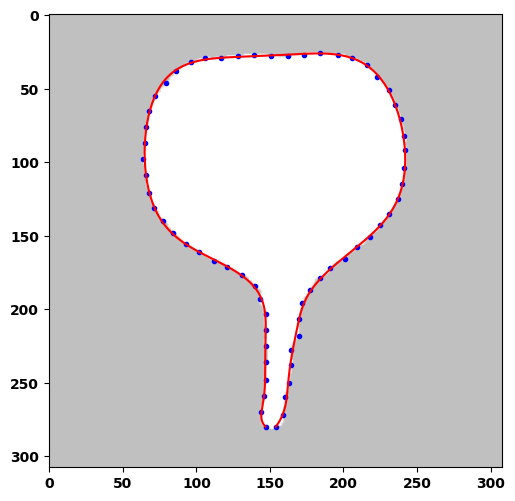

In [7]:
%%time
results= check1T0(1,mode=0,Nsamples=65,Nfrom=10,Nto=20,err_th=0.5,withFig=True)
results

10.....
CP 5.0, steps:4, etime: 9.15625 err: 4.8061691453
......................................................................
CP 2.0, steps:74, etime: 79.31250 err: 1.9981458373
.........................
.............................................................
CP 1.0, steps:160, etime: 165.51562 err: 0.9996374400
.......................................
........................
CP 0.65, steps:223, etime: 228.93750 err: 0.6467784834
............................................................................
............................................E

0.49998197597567906 []

N= 10  err = 0.49998197597567906   etime = 349.953125
Wall time: 5min 50s


{'10': (array([], dtype=int64), 0.49998197597567906, 343, 349.953125)}

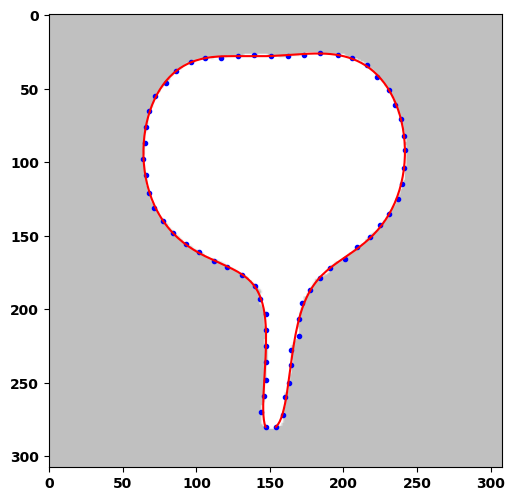

In [12]:
%%time
results= check1T0(1,mode=1,Nsamples=65,Nfrom=10,Nto=10,err_th=0.5,withFig=True)
results

8....................................................................................
CP 5.0, steps:83, etime: 56.87500 err: 4.8924358012
................
.........
CP 2.0, steps:108, etime: 72.84375 err: 1.9700768219
.....................
CP 1.0, steps:129, etime: 86.45312 err: 0.9736702878
..................
CP 0.65, steps:147, etime: 97.96875 err: 0.6404938431
....................E

0.4990699863667521 []

N= 8  err = 0.4990699863667521   etime = 110.84375
Wall time: 1min 50s


{'8': (array([], dtype=int64), 0.4990699863667521, 167, 110.84375)}

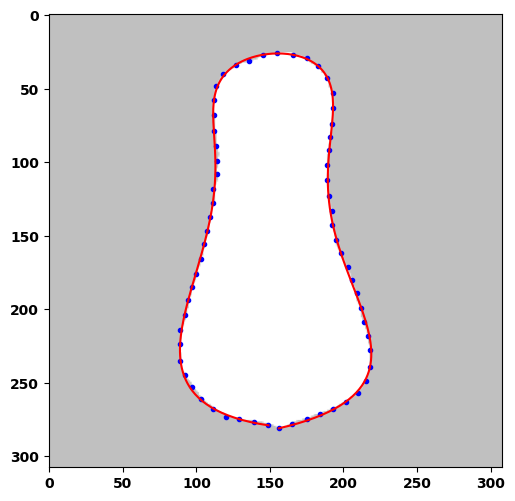

In [11]:
%%time
results= check1T0(0,mode=1,Nsamples=65,Nfrom=8,Nto=8,err_th=0.5,withFig=True)
results

8....................................................................................
CP 5.0, steps:83, etime: 57.15625 err: 4.8924358012
................
.........
CP 2.0, steps:108, etime: 73.14062 err: 1.9700768219
.....................
CP 1.0, steps:129, etime: 86.57812 err: 0.9736702878
..................
CP 0.65, steps:147, etime: 98.09375 err: 0.6404938431
....................E

0.4990699863667521 []

N= 8  err = 0.4990699863667521   etime = 110.96875
Wall time: 1min 51s


{'8': (array([], dtype=int64), 0.4990699863667521, 167, 110.96875)}

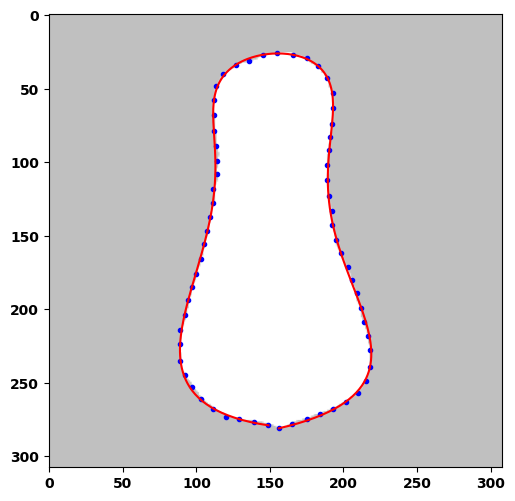

In [10]:
%%time
results= check1T0(0,mode=1,Nsamples=65,Nfrom=8,Nto=8,err_th=0.5,withFig=True)
results

7....................................................................................................
.
CP 5.0, steps:100, etime: 52.14062 err: 4.8904184236
................................
CP 2.0, steps:132, etime: 67.84375 err: 1.9633035335
............................
CP 1.0, steps:160, etime: 81.57812 err: 0.9987380084
...............................
CP 0.65, steps:191, etime: 96.92188 err: 0.6482304178
........
....................................................................................................
....................................................................................................
.............^^^^^^^^^.^^^^^^.^.^^^^.^..^^..C

0.5137228026527839 []

N= 7  err = 0.5137228026527839   etime = 220.84375
Wall time: 3min 40s


{'7': (array([], dtype=int64), 0.5137228026527839, 443, 220.84375)}

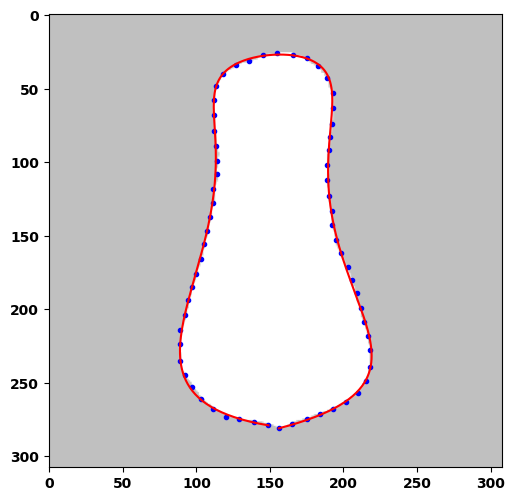

In [8]:
%%time
results= check1T0(0,mode=1,Nsamples=65,Nfrom=7,Nto=7,err_th=0.5,withFig=True)
results

7....................................................................................................
...
CP 5.0, steps:102, etime: 52.79831 err: 4.8841331850
..................................
CP 2.0, steps:136, etime: 69.40321 err: 1.9541646574
..............................
CP 1.0, steps:166, etime: 84.19444 err: 0.9878133190
.................................
.
CP 0.65, steps:200, etime: 100.85515 err: 0.6482225972
...................................................................................................
....................................................................................................
.........[0.5369449562945969, 0.5369446844335924, 0.5369445065644156] 3.420034286834239e-14
C

0.5369445065644156 []

N= 7  err = 0.5369445065644156   etime = 202.59375
Wall time: 3min 22s


{'7': ([], 0.5369445065644156, 408, 202.59375)}

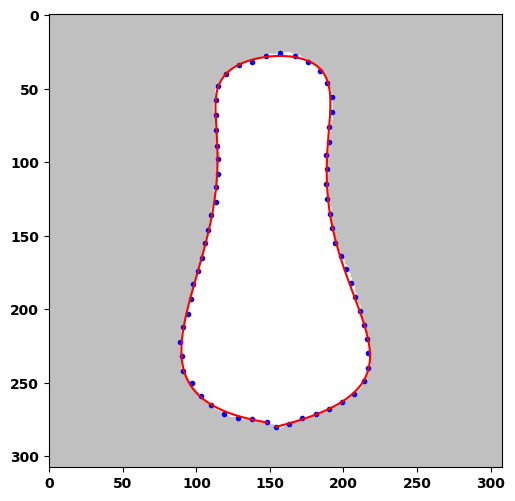

In [4]:
%%time
results= check1T0(0,mode=1,Nsamples=65,Nfrom=7,Nto=7,err_th=0.5,withFig=True)
results

7....................................................................................................
........
CP 5.0, steps:107, etime: 53.74876 err: 4.9868781209
...................................
CP 2.0, steps:142, etime: 71.25712 err: 1.9592583302
..............................
CP 1.0, steps:172, etime: 86.11729 err: 0.9992019562
...........................
.........
CP 0.65, steps:208, etime: 103.88468 err: 0.6456711114
...........................................................................................
................^.........................^^...................^^^^................................C

0.5369745555390635 []

N= 7  err = 0.5369745555390635   etime = 198.0625
Wall time: 3min 18s


{'7': ([], 0.5369745555390635, 398, 198.0625)}

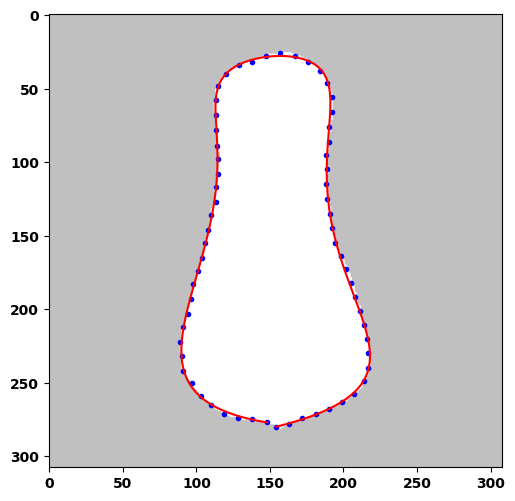

In [5]:
%%time
results= check1T0(0,mode=1,Nsamples=65,Nfrom=7,Nto=7,err_th=0.5,withFig=True)
                  
results

7....................................................................................................
...
CP 5.0, steps:102, etime: 53.50000 err: 4.8841331850
..................................
CP 2.0, steps:136, etime: 70.46875 err: 1.9541646574
..............................E

0.9878133189601893 []

N= 7  err = 0.9878133189601893   etime = 85.59375
Wall time: 1min 25s


{'7': ([], 0.9878133189601893, 166, 85.59375)}

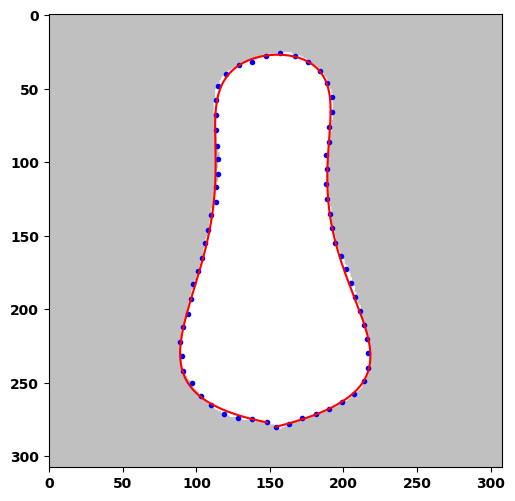

In [4]:
%%time
results= check1T0(0,mode=1,Nsamples=65,Nfrom=7,Nto=7,err_th=1.0,withFig=True)
results

8.........................................................................................
CP 5.0, steps:88, etime: 60.28125 err: 4.8989837489
...........
................
CP 2.0, steps:115, etime: 77.62500 err: 1.9667770295
......................
CP 1.0, steps:137, etime: 91.71875 err: 0.9937473136
.....................
CP 0.65, steps:158, etime: 105.23438 err: 0.6477225775
...............................E

0.49948086650957935 []

N= 8  err = 0.49948086650957935   etime = 125.15625
Wall time: 2min 5s


{'8': (array([], dtype=int64), 0.49948086650957935, 189, 125.15625)}

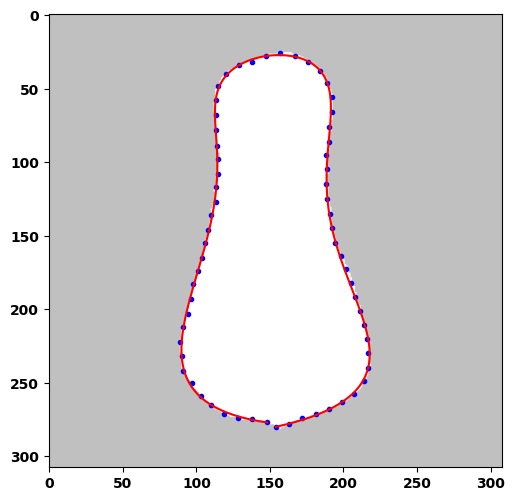

In [6]:
%%time
results= check1T0(0,mode=1,Nsamples=65,Nfrom=8,Nto=8,err_th=0.5,withFig=True)
results

In [ ]:
%%time
results= check1T0(1,mode=1,Nsamples=65,Nfrom=9,Nto=11,err_th=0.5,withFig=True)
results

In [ ]:
%%time
results= check1T0(1,mode=1,Nsamples=65,Nfrom=9,Nto=11,err_th=0.5,withFig=True)
results

9..................................................
CP 5.0, steps:49, etime: 45.15625 err: 4.9838157851
..................................................
....................................................................................................
....................................................................................................
...................................................^................................................
...................................................^........................................^.......
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.................................
CP 

6^^^^..^.............................................................................................
................................................................................^^^^^^^^^^^^^^^^^.^^
^..^^.....^^^^^^.^^^^^^^^^^^^^...................................^^^^^^^^^^^^^^^^^^^^^^.^^..^.......
.....................^^^^^^^^^^^^^^^^^^^^^...............^^^^^^^^^^^^^^^^^^^^^..........^^^^^^^^^^^^
^^^^^^^^^^^^^^^.......^^^^^^^^^^^^^^^^^^^..^....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........
^..C

26.354946448779707 [28 29 30 31 32 33 34]
7^^^..^...^..........................................................................................
....................................................................................^^^^^.^^.^^.....
.............................................................^^^^^^^^.^^.^..........................
.....................
CP 5.0, steps:320, 

{'6': (array([28, 29, 30, 31, 32, 33, 34], dtype=int64),
  26.354946448779707,
  68.390625),
 '7': (array([], dtype=int64), 0.9675060997736978, 64.125)}

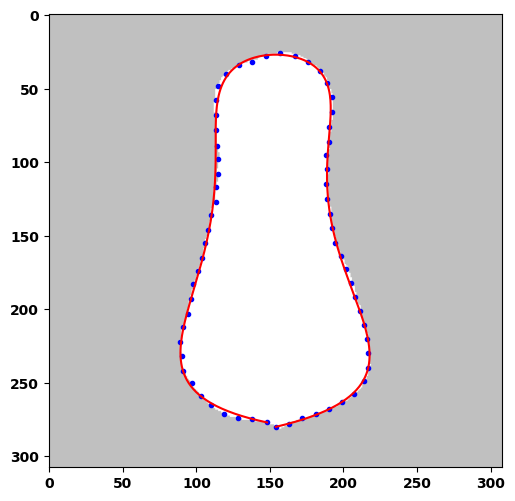

In [20]:
%%time
results= check1T0(0,mode=0,Nsamples=65,Nfrom=6,Nto=7,err_th=1.0,withFig=True)
results

14^^^^^^^^^^^^^^
CP 5.0, steps:13, etime: 9.17188 err: 4.5413415077
^^^...
CP 2.0, steps:19, etime: 10.93750 err: 1.7854419293
^..^.......^....................................................................
....................................................................................................
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..........^^....................^^^^^^^^
^^^^^^^^^^^^^.^^^^^^^^^^^.......^..^.............^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........^^^^^....
......^^^........^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.
CP 1.0, steps:466, etime: 144.03125 err: 0.9888356516
^^^..^^^.......^^^^^^^^^^......^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

{'14': (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 26, 27, 28, 61, 62, 63], dtype=int64),
  0.863711374234984,
  306.296875),
 '15': (array([63], dtype=int64), 0.643827155459533, 239.84375)}

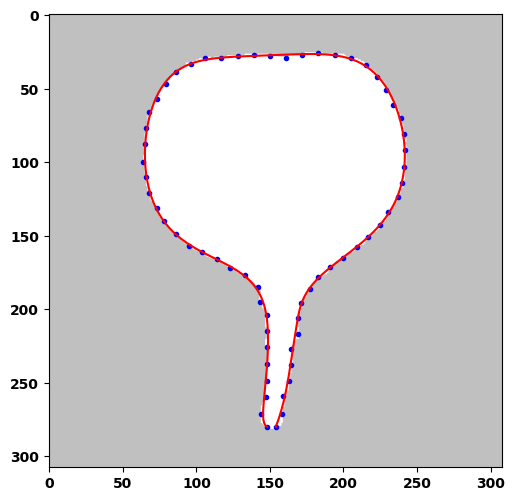

In [13]:
%%time
results= check1T0(1,Nsamples=65,Nfrom=14,Nto=15,err_th=0.5,withFig=True)
results

15^^^^^^^^^^^^
CP 5.0, steps:11, etime: 9.37500 err: 4.4433907046
^.^^^^.
CP 2.0, steps:18, etime: 11.60938 err: 1.4554494616
^.^^.^^.^^.^..^....
CP 1.0, steps:37, etime: 17.98438 err: 0.9995127138
..............................................................
....................................^^^^^^^^^^^^^...^......................^^^^^^^.^^^.^.^....^.....
.................^^^^^^^^^^^^^^.^..^................^....^^^^^^^^^^^^^^^^.^..^..^^^^^^^^^^^^^^^^^^^^
^^^^^^^^.^.^^^^^^^^.^..^^.^.^....^.^^........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^....
^.^^^......
CP 0.65, steps:410, etime: 141.93750 err: 0.6488331937
^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^P

16^^^^^^^^^^
CP 5.0, steps:9, etime: 9.40625 err: 3.62745396

{'15': (array([63], dtype=int64), 0.643827155459533, 243.28125),
 '16': (array([ 0,  4,  5,  6,  7,  8, 55, 56, 60, 61, 62, 63], dtype=int64),
  0.638367564363584,
  248.296875)}

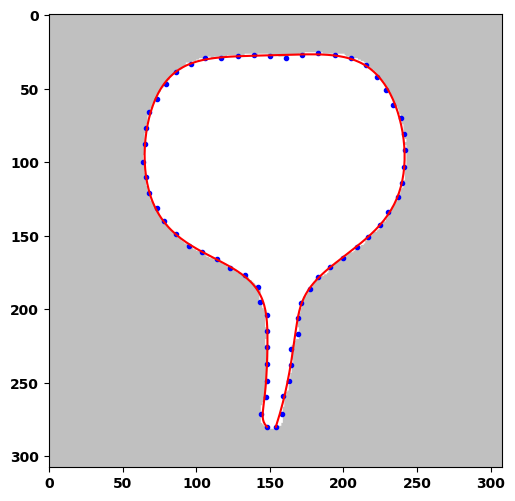

In [15]:
%%time
results= check1T0(1,Nsamples=65,Nfrom=15,Nto=16,err_th=0.5,withFig=True)
results

17^^^^^^^^^^^^^^
CP 5.0, steps:13, etime: 11.67188 err: 3.5439124928
^^^^.
CP 2.0, steps:18, etime: 13.59375 err: 1.4875507901
^......
CP 1.0, steps:25, etime: 16.25000 err: 0.9270736785
^^.^^....^............................................^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^..^^...^^^^^.^^.^^...............^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^..
CP 0.65, steps:174, etime: 75.23438 err: 0.6489189597
...^^^^^^^^.^^.^.........
.....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^...^^^^^^^^^^^^^.^^.^^.^..^.^^.^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^.^^^^^.^^^^.^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^e1e1^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^P

18^^^^^^^^^^^^^
CP 5.0, steps:12, etime: 12.12500 err: 3.9524735358
^^
CP 2.0, steps:14, etime: 12.96875 err: 1.6553542451
^^.^...
CP 

{'17': (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 51, 52, 53, 54, 58, 63], dtype=int64),
  0.5458435888309712,
  258.890625),
 '18': (array([ 0, 58, 63], dtype=int64), 0.5742826908893401, 209.84375),
 '19': (array([36, 48, 49, 50, 55, 56, 57, 59, 60, 61, 62, 63], dtype=int64),
  0.5416212593252009,
  348.609375),
 '20': (array([], dtype=int64), 0.4996018560164991, 73.671875)}

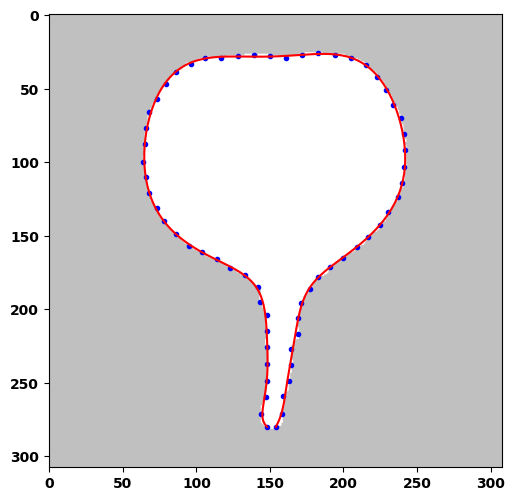

In [16]:
%%time
results= check1T0(1,Nsamples=65,Nfrom=17,Nto=20,err_th=0.5,withFig=True)
results

10....
CP 5.0, steps:3, etime: 8.21875 err: 4.9350461717
......................................................................................
CP 2.0, steps:89, etime: 95.10938 err: 1.9908536546
..........
....................................................................................................
........
CP 1.0, steps:207, etime: 214.56250 err: 0.9968218795
............................................................................................
..............................................
CP 0.65, steps:345, etime: 354.85938 err: 0.6499508977
......................................................
....................................................................................................
...........................................................................................^.^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^^^^^^^^^^^^^^^^^...^^.^^^^^^^^

{'10': (array([], dtype=int64), 0.5911321361850019, 3035.140625),
 '11': (array([], dtype=int64), 0.5549905403126161, 3648.953125),
 '12': (array([], dtype=int64), 0.524115055803229, 4335.53125),
 '13': (array([0], dtype=int64), 0.4999537602193741, 4413.296875),
 '14': (array([], dtype=int64), 0.4999202768078338, 312.28125)}

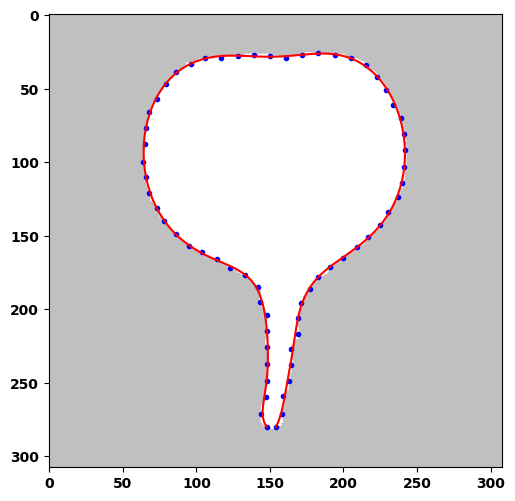

In [18]:
%%time
results= check1T0(1,mode=1,Nsamples=65,Nfrom=10,Nto=20,err_th=0.5,withFig=True)
results

In [9]:
import time
 

def checkN(imgnum,mode=0,Nsamples=65,Nprolog=3,Nfrom=5,Nto=7,lr=0.005,lrP=400,preTry=100,maxTry=1500,pat=10,err_th=0.5, threstune=1.0,moption=False):
    img = imgs[imgnum]
    config = wandb.config={
          'program':'checkN',
          ''
          'lr':lr,
          'maxTry':maxTry,
          'preTry':preTry,
          'pat':pat,
          'err_th':err_th}
    wandb.init(project="checkN %d" % imgnum,
                 config = config)
    rd.BezierCurve.wandb=wandb

    conAll = rd.getCntPairWithImg(img, mode=1) # 全周輪郭を得る
    Samples = rd.getSamples(conAll,N=Nsamples,mode='Equidistant')

    bez = rd.BezierCurve(N=0,samples=Samples) # インスタンス生成
    lastN,results = bez.fit2(mode=mode,Nprolog=Nprolog,Nfrom=Nfrom,Nto=Nto,pat=pat,lr=lr,lrP=lrP,err_th=err_th,preTry=preTry,maxTry=maxTry,withErr=True,withEC=True,threstune=threstune,moption=moption)
    cps,func,err = results[str(lastN)]
    rd.drawBez(img,stt=0.0,end=1.0,bezL=func,cntL=Samples)
    print("{:>3d}次でOK".format(lastN))
    return results,err

#from sympy import diff, Symbol, Matrix, symbols, solve, simplify, binomial, Abs, im, re, lambdify
import time

#from statistics import mean
def check1T(imgnum,mode=0,Nsamples=65,N=7,itt=3,lr=0.001,lrP=30000,maxTry=1500,pat=10,err_th=0.75,threstune=1.0,withEC=False,trial=None):
    start = time.process_time()
    rd.BezierCurve.mloop_itt = itt
    # rd.BezierCurve.eq_coe = coe
    img = imgs[imgnum]
    conAll = rd.getCntPairWithImg(img, mode=1) # 全周輪郭を得る
    Samples = rd.getSamples(conAll,N=Nsamples,mode='Equidistant')
    bez = rd.BezierCurve(N=N,samples=Samples) # インスタンス生成
    bestcps, bestfunc, minerror = bez.fit1T(maxTry=maxTry, mode=mode, lr=lr,lrP=lrP,withErr=True, withEC=withEC,tpara=[], pat=pat, err_th=err_th, threstune=threstune,trial=trial,moption=True)
    elapsed_time = time.process_time() - start
    rd.drawBez(img,stt=-0.00,end=1.00,bezL=bestfunc,cntL=Samples)
    print(bestfunc,bestcps)
    if withEC:
        (error,trynum) = minerror
        return error,elapsed_time,trynum+1,bestcps  
    else:
        return minerror,elapsed_time
    
def checkTo(imgnum,N,mode=0,err_th=1.0,pat=1000,maxTry=3000):
    return check1T(imgnum,mode=mode,Nsamples=65,N=N,itt=3,maxTry=maxTry,pat=pat,err_th=err_th,threstune=1.0,withEC=True,trial=None)


## 詳細バージョン

....
CP 5.0, steps:3, etime: 8.87500 err: 4.5097056353
.................
CP 2.0, steps:20, etime: 25.87500 err: 1.9592015528
................................
CP 1.0, steps:52, etime: 58.12500 err: 0.9965205489
...............................................
.
CP 0.65, steps:100, etime: 106.46875 err: 0.6495311175
...............................................................E

Matrix([[159.0*t**10 + 159.116157740014*t**9*(10 - 10*t) - 6509.50273596375*t**8*(1 - t)**2 + 124727.975998431*t**7*(1 - t)**3 - 334057.725619472*t**6*(1 - t)**4 + 507789.272090773*t**5*(1 - t)**5 - 208623.265639688*t**4*(1 - t)**6 + 80685.2208641136*t**3*(1 - t)**7 + 2893.95178370619*t**2*(1 - t)**8 + 1648.98519825863*t*(1 - t)**9 + 166.0*(1 - t)**10], [280.0*t**10 + 241.182487746452*t**9*(10 - 10*t) - 21274.8064877002*t**8*(1 - t)**2 + 320411.788812715*t**7*(1 - t)**3 - 929905.270995207*t**6*(1 - t)**4 + 1150334.5733749*t**5*(1 - t)**5 - 671862.085569287*t**4*(1 - t)**6 + 177525.375757743*t**3*(1 - t)**7 - 300

(0.49970667409729475,
 169.84375,
 164,
 [[166.0, 279.0],
  [164.89851982586308, 213.47002266823392],
  [64.31003963791532, -66.8733328236548],
  [672.3768405342801, 1479.3781313145212],
  [-993.4441220937512, -3199.3432646156502],
  [2015.0367940110043, 4564.81973561467],
  [-1590.7510743784378, -4428.120338072416],
  [1039.3997999869232, 2670.098240105962],
  [-144.65561635474998, -472.77347750444864],
  [159.11615774001422, 241.18248774645204],
  [159.0, 280.0]])

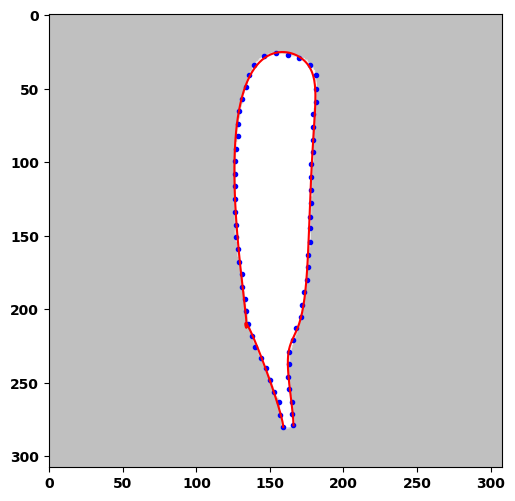

In [13]:
%%time
checkTo(8,mode=1,N=10,err_th=0.5)

....E

Matrix([[159.0*t**10 + 182.307428811119*t**9*(10 - 10*t) - 4092.87178274812*t**8*(1 - t)**2 + 80524.4434145685*t**7*(1 - t)**3 - 148003.198203704*t**6*(1 - t)**4 + 187504.051519273*t**5*(1 - t)**5 + 18384.2133752106*t**4*(1 - t)**6 + 11589.4303340897*t**3*(1 - t)**7 + 11316.2102123442*t**2*(1 - t)**8 + 1353.68254105453*t*(1 - t)**9 + 166.0*(1 - t)**10], [280.0*t**10 + 185.638913493965*t**9*(10 - 10*t) + 20391.0209043417*t**8*(1 - t)**2 - 101204.597706498*t**7*(1 - t)**3 + 460522.485656041*t**6*(1 - t)**4 - 708008.57195888*t**5*(1 - t)**5 + 408369.257189851*t**4*(1 - t)**6 - 75967.6331431942*t**3*(1 - t)**7 + 15955.8917894124*t**2*(1 - t)**8 + 2052.73341597307*t*(1 - t)**9 + 279.0*(1 - t)**10]]) [[166.0, 279.0], [135.36825410545325, 205.27334159730702], [251.47133805209347, 354.57537309805303], [96.57858611741403, -633.063609526618], [87.54387321528878, 1944.6155104278614], [744.0636965050521, -2809.557825233649], [-704.7771343033512, 2192.9642174097194], [671.0370284547375, -843

(4.509705635312895,
 8.953125,
 4,
 [[166.0, 279.0],
  [135.36825410545325, 205.27334159730702],
  [251.47133805209347, 354.57537309805303],
  [96.57858611741403, -633.063609526618],
  [87.54387321528878, 1944.6155104278614],
  [744.0636965050521, -2809.557825233649],
  [-704.7771343033512, 2192.9642174097194],
  [671.0370284547375, -843.3716475541539],
  [-90.95270628329146, 453.1337978742608],
  [182.30742881111863, 185.6389134939645],
  [159.0, 280.0]])

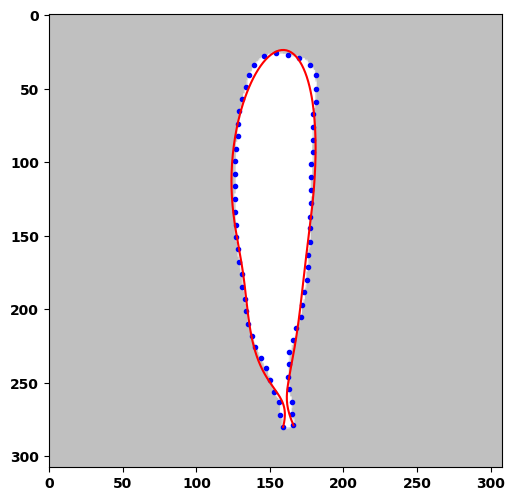

In [14]:
%%time
checkTo(8,mode=1,N=10,err_th=5)

....
CP 5.0, steps:3, etime: 8.92188 err: 4.5097056353
.................
CP 2.0, steps:20, etime: 26.07812 err: 1.9592015528
................................
CP 1.0, steps:52, etime: 58.28125 err: 0.9965205489
...............................................
.
CP 0.65, steps:100, etime: 106.59375 err: 0.6495311175
...............................................................E

Matrix([[159.0*t**10 + 159.116157740014*t**9*(10 - 10*t) - 6509.50273596375*t**8*(1 - t)**2 + 124727.975998431*t**7*(1 - t)**3 - 334057.725619472*t**6*(1 - t)**4 + 507789.272090773*t**5*(1 - t)**5 - 208623.265639688*t**4*(1 - t)**6 + 80685.2208641136*t**3*(1 - t)**7 + 2893.95178370619*t**2*(1 - t)**8 + 1648.98519825863*t*(1 - t)**9 + 166.0*(1 - t)**10], [280.0*t**10 + 241.182487746452*t**9*(10 - 10*t) - 21274.8064877002*t**8*(1 - t)**2 + 320411.788812715*t**7*(1 - t)**3 - 929905.270995207*t**6*(1 - t)**4 + 1150334.5733749*t**5*(1 - t)**5 - 671862.085569287*t**4*(1 - t)**6 + 177525.375757743*t**3*(1 - t)**7 - 300

(0.49970667409729475,
 170.109375,
 164,
 [[166.0, 279.0],
  [164.89851982586308, 213.47002266823392],
  [64.31003963791532, -66.8733328236548],
  [672.3768405342801, 1479.3781313145212],
  [-993.4441220937512, -3199.3432646156502],
  [2015.0367940110043, 4564.81973561467],
  [-1590.7510743784378, -4428.120338072416],
  [1039.3997999869232, 2670.098240105962],
  [-144.65561635474998, -472.77347750444864],
  [159.11615774001422, 241.18248774645204],
  [159.0, 280.0]])

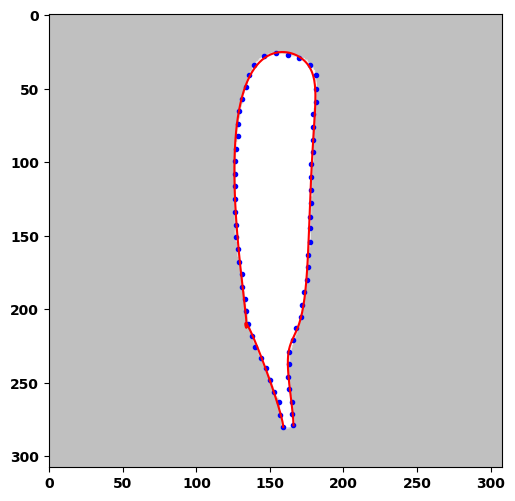

In [20]:
%%time
checkTo(8,mode=1,N=10,err_th=0.5)

.
CP 5.0, steps:0, etime: 7.39062 err: 3.1997810229
.....
CP 2.0, steps:5, etime: 15.98438 err: 1.9371697836
............................
CP 1.0, steps:33, etime: 63.35938 err: 0.9938866986
..................................
CP 0.65, steps:67, etime: 121.01562 err: 0.6449809457
................................
.............................E

Matrix([[144.0*t**13 + 198.395209383217*t**12*(13 - 13*t) + 4035.32571307089*t**11*(1 - t)**2 + 127409.80778735*t**10*(1 - t)**3 + 809814.873125078*t**9*(1 - t)**4 - 4149887.64196711*t**8*(1 - t)**5 + 9724150.06826125*t**7*(1 - t)**6 - 7754170.83316565*t**6*(1 - t)**7 + 2194714.27622933*t**5*(1 - t)**8 + 468550.634487896*t**4*(1 - t)**9 - 186778.021057498*t**3*(1 - t)**10 + 20276.1589775657*t**2*(1 - t)**11 + 1858.9539370655*t*(1 - t)**12 + 138.0*(1 - t)**13], [281.0*t**13 + 275.556873697051*t**12*(13 - 13*t) - 13647.2325047991*t**11*(1 - t)**2 + 527900.978251689*t**10*(1 - t)**3 - 2113105.98827763*t**9*(1 - t)**4 + 4518039.55785163*t**8*(1 - t)**5

(0.4993340575356902,
 224.796875,
 129,
 [[138.0, 279.0],
  [142.99645669734582, 232.870703885862],
  [259.95075612263724, 63.66318379517344],
  [-653.0700036975458, 1199.7459806964334],
  [655.3155727103443, -1917.909152850211],
  [1705.294697924889, 1778.6280158306306],
  [-4518.747571774853, 47.79231498157379],
  [5666.754119033361, -2368.1817726874124],
  [-3224.465922274368, 3510.520246970964],
  [1132.608214160948, -2955.3929905980785],
  [445.48883841730833, 1845.8076162646462],
  [51.73494503937038, -174.96451929229602],
  [198.3952093832166, 275.5568736970509],
  [144.0, 281.0]])

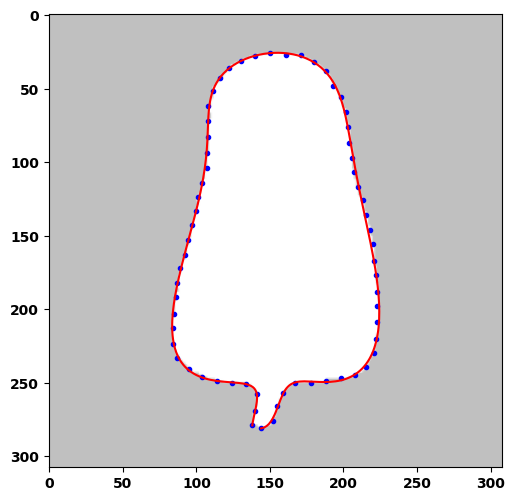

In [11]:
%%time
checkTo(6,mode=1,N=13,err_th=0.5)

....
CP 5.0, steps:3, etime: 9.14062 err: 4.5097056353
.................
CP 2.0, steps:20, etime: 26.40625 err: 1.9592015528
................................
CP 1.0, steps:52, etime: 58.90625 err: 0.9965205489
...............................................
.
CP 0.65, steps:100, etime: 107.45312 err: 0.6495311175
...............................................................E

Matrix([[159.0*t**10 + 159.116157740014*t**9*(10 - 10*t) - 6509.50273596375*t**8*(1 - t)**2 + 124727.975998431*t**7*(1 - t)**3 - 334057.725619472*t**6*(1 - t)**4 + 507789.272090773*t**5*(1 - t)**5 - 208623.265639688*t**4*(1 - t)**6 + 80685.2208641136*t**3*(1 - t)**7 + 2893.95178370619*t**2*(1 - t)**8 + 1648.98519825863*t*(1 - t)**9 + 166.0*(1 - t)**10], [280.0*t**10 + 241.182487746452*t**9*(10 - 10*t) - 21274.8064877002*t**8*(1 - t)**2 + 320411.788812715*t**7*(1 - t)**3 - 929905.270995207*t**6*(1 - t)**4 + 1150334.5733749*t**5*(1 - t)**5 - 671862.085569287*t**4*(1 - t)**6 + 177525.375757743*t**3*(1 - t)**7 - 300

(0.49970667409729475,
 171.1875,
 164,
 [[166.0, 279.0],
  [164.89851982586308, 213.47002266823392],
  [64.31003963791532, -66.8733328236548],
  [672.3768405342801, 1479.3781313145212],
  [-993.4441220937512, -3199.3432646156502],
  [2015.0367940110043, 4564.81973561467],
  [-1590.7510743784378, -4428.120338072416],
  [1039.3997999869232, 2670.098240105962],
  [-144.65561635474998, -472.77347750444864],
  [159.11615774001422, 241.18248774645204],
  [159.0, 280.0]])

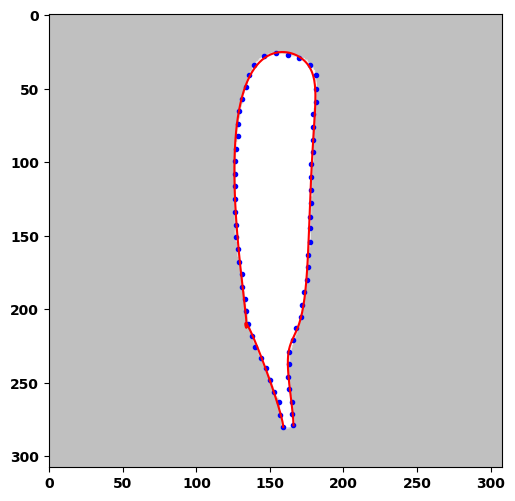

In [12]:
%%time
checkTo(8,mode=1,N=10,err_th=0.5)

...
CP 5.0, steps:2, etime: 6.59375 err: 4.9526120869
.....................................
CP 2.0, steps:39, etime: 36.82812 err: 1.9935849874
...................................................
CP 1.0, steps:90, etime: 79.21875 err: 0.9928617062
.........
......................................................................
CP 0.65, steps:169, etime: 144.35938 err: 0.6496688325
..............................
.................^..........................................................................^.......
...............................................^^....^.......................^^....^............^...
.^..^^.^^.^.^^.^.^.^.^......^.................^^^^^^...^^......^^........^^^^^^^.^..^.^^.^^....^....
.^..^^^................................^.........^^^^..........^.....^^^^^.^.^..^^^^.....^^^^.^..^^^
^^^^^^^^^..^^...^^^^^^^^^.........^^^........................^^^^^.....^..^^.^^^^^^^^^^^^^^^^^^^^^^^
^^^^........^^^^^.^.^.^.^.^.^.^.^..........^^.^^^..^^...........^^^^..^^^.^...^^

(0.553016247042916,
 2487.140625,
 3001,
 [[161.0, 279.0],
  [178.47103935232082, -39.91597858423341],
  [162.32331850571052, 1574.0531018389106],
  [-6.858912021118259, -3075.666909683483],
  [790.3964284477429, 4024.9684984860105],
  [-536.1036783768005, -3541.5294896233113],
  [439.01300898839855, 1938.180640933665],
  [48.71888388592831, -311.5404556226863],
  [128.90265587276778, 230.68124235469946],
  [154.0, 280.0]])

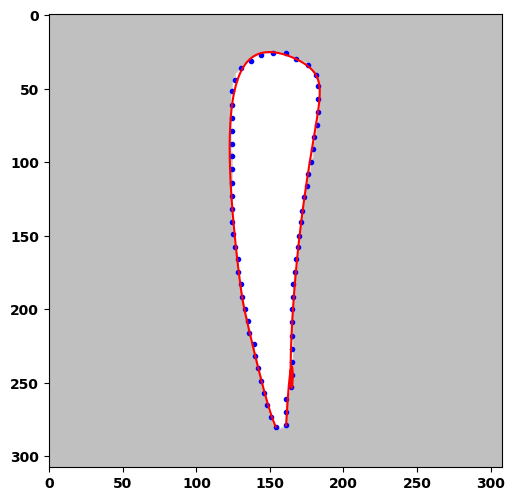

In [6]:
%%time
checkTo(3,mode=1,N=9,err_th=0.5)

..
CP 5.0, steps:1, etime: 8.46875 err: 4.1575694159
....
CP 2.0, steps:5, etime: 14.34375 err: 1.9107660922
...........E

Matrix([[154.0*t**12 + 149.250096890145*t**11*(12 - 12*t) + 17271.3621235495*t**10*(1 - t)**2 - 35273.1195360016*t**9*(1 - t)**3 + 333992.833423415*t**8*(1 - t)**4 + 327712.764536321*t**7*(1 - t)**5 - 465256.764520404*t**6*(1 - t)**6 + 783536.734439907*t**5*(1 - t)**7 - 459904.588873878*t**4*(1 - t)**8 + 130826.893317573*t**3*(1 - t)**9 + 3205.05118079208*t**2*(1 - t)**10 + 1936.8560207011*t*(1 - t)**11 + 148.0*(1 - t)**12], [280.0*t**12 + 100.615522604159*t**11*(12 - 12*t) + 90804.3366003237*t**10*(1 - t)**2 - 1068289.12255569*t**9*(1 - t)**3 + 5963118.02871586*t**8*(1 - t)**4 - 14676082.3328865*t**7*(1 - t)**5 + 18848169.5644124*t**6*(1 - t)**6 - 13126069.0104305*t**5*(1 - t)**7 + 4727265.33531594*t**4*(1 - t)**8 - 715336.683059103*t**3*(1 - t)**9 + 51448.345734756*t**2*(1 - t)**10 + 2558.39423063077*t*(1 - t)**11 + 279.0*(1 - t)**12]]) [[148.0, 279.0], [161.4046

(0.9941225238786799,
 30.265625,
 17,
 [[148.0, 279.0],
  [161.40466839175872, 213.19951921923084],
  [48.56138152715275, 779.5203899205454],
  [594.6676968980578, -3251.530377541377],
  [-929.1001795431874, 9550.030980436242],
  [989.3140586362457, -16573.31945761433],
  [-503.5246369268439, 20398.451909537205],
  [413.77874310141533, -18530.40698596781],
  [674.7329968149791, 12046.70308831486],
  [-160.3323615272799, -4855.859647980404],
  [261.68730490226466, 1375.8232818230863],
  [149.2500968901446, 100.61552260415925],
  [154.0, 280.0]])

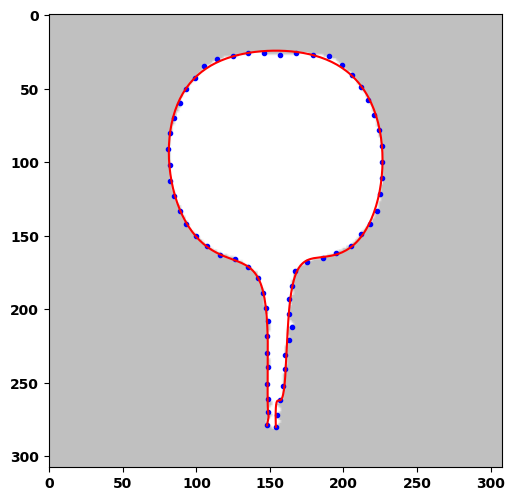

In [4]:
%%time
checkTo(4,mode=1,N=12,err_th=1)

.
CP 5.0, steps:0, etime: 7.39062 err: 3.1997810229
.....
CP 2.0, steps:5, etime: 15.78125 err: 1.9371697836
............................E

Matrix([[144.0*t**13 + 188.712436894689*t**12*(13 - 13*t) + 12564.9762190308*t**11*(1 - t)**2 + 8001.55723975661*t**10*(1 - t)**3 + 1603117.85852654*t**9*(1 - t)**4 - 7028204.65791809*t**8*(1 - t)**5 + 15560989.6594489*t**7*(1 - t)**6 - 14283909.3433334*t**6*(1 - t)**7 + 6312018.04215083*t**5*(1 - t)**8 - 992938.376214656*t**4*(1 - t)**9 + 84593.1612194508*t**3*(1 - t)**10 - 1574.38673190335*t**2*(1 - t)**11 + 2213.35560854354*t*(1 - t)**12 + 138.0*(1 - t)**13], [281.0*t**13 + 281.350375409439*t**12*(13 - 13*t) - 23059.3172999425*t**11*(1 - t)**2 + 716806.839457014*t**10*(1 - t)**3 - 3520184.51176886*t**9*(1 - t)**4 + 8971459.37976121*t**8*(1 - t)**5 - 10494394.2387597*t**7*(1 - t)**6 + 5001482.44398882*t**6*(1 - t)**7 - 200352.299270648*t**5*(1 - t)**8 - 412109.10286914*t**4*(1 - t)**9 + 133737.387163479*t**3*(1 - t)**10 + 24831.1392877076*t**2*(1

(0.9938866985817353,
 63.046875,
 34,
 [[138.0, 279.0],
  [170.25812373411878, 180.83721974553086],
  [-20.184445280812177, 318.3479395859947],
  [295.7802839840936, 467.6132418303449],
  [-1388.7250016988198, -576.3763676491469],
  [4904.442923194115, -155.67389220718607],
  [-8323.956493784035, 2914.616808851293],
  [9068.175792219667, -6115.614358251576],
  [-5460.92048012284, 6970.830908905368],
  [2242.122879058092, -4923.3349814949115],
  [27.97747286628186, 2506.317620479071],
  [161.08943870552255, -295.6322730761863],
  [188.71243689468918, 281.35037540943887],
  [144.0, 281.0]])

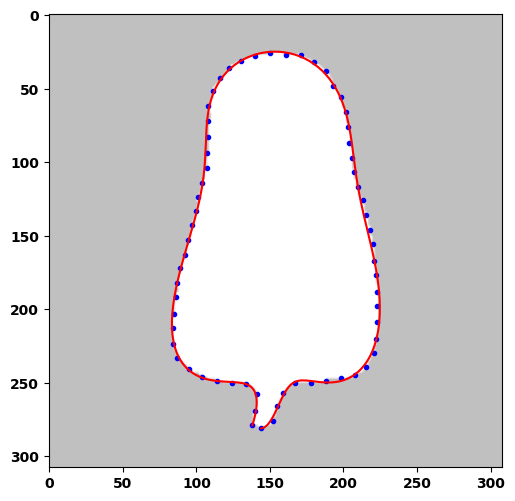

In [5]:
%%time
checkTo(6,mode=1,N=13,err_th=1)

^^^^^^^^^......
CP 5.0, steps:14, etime: 5.40625 err: 4.9647823606
^....^..^........
CP 2.0, steps:31, etime: 7.84375 err: 1.9915908437
.............................................................^^^^^^^
^^^^^^....................^^^^^^^.^^^........................^^^^^^.^^^..^......................^^^^
^^^.^^..^^.....E

Matrix([[161.0*t**8 + 127.29*t**7*(8 - 8*t) + 2944.1*t**6*(1 - t)**2 + 2702.98*t**5*(1 - t)**3 + 13695.3*t**4*(1 - t)**4 + 10613.5*t**3*(1 - t)**5 + 6544.34*t**2*(1 - t)**6 + 1345.94*t*(1 - t)**7 + 168.0*(1 - t)**8], [281.0*t**8 + 239.407*t**7*(8 - 8*t) + 2559.14*t**6*(1 - t)**2 + 29584.8*t**5*(1 - t)**3 - 53499.9*t**4*(1 - t)**4 + 17962.1*t**3*(1 - t)**5 + 5093.08*t**2*(1 - t)**6 + 1773.29*t*(1 - t)**7 + 279.0*(1 - t)**8]]) [[168.0, 279.0], [168.24286, 221.66129], [233.7265, 181.89565], [189.5259, 320.75156], [195.64737, -764.285], [48.267467, 528.3004], [105.146286, 91.39795], [127.29013, 239.40685], [161.0, 281.0]]
Wall time: 34.4 s


(0.9989999204401281,
 34.484375,
 215,
 [[168.0, 279.0],
  [168.24286, 221.66129],
  [233.7265, 181.89565],
  [189.5259, 320.75156],
  [195.64737, -764.285],
  [48.267467, 528.3004],
  [105.146286, 91.39795],
  [127.29013, 239.40685],
  [161.0, 281.0]])

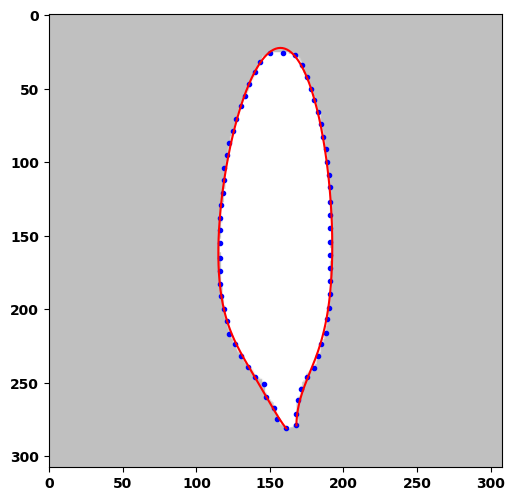

In [6]:
%%time
checkTo(7,mode=1,N=8,err_th=1)

....
CP 5.0, steps:3, etime: 9.09375 err: 4.5097056353
.................
CP 2.0, steps:20, etime: 26.12500 err: 1.9592015528
................................E

Matrix([[159.0*t**10 + 173.813777295355*t**9*(10 - 10*t) - 6459.36600738713*t**8*(1 - t)**2 + 109492.59675372*t**7*(1 - t)**3 - 253350.359731056*t**6*(1 - t)**4 + 353254.856128392*t**5*(1 - t)**5 - 91954.8152962042*t**4*(1 - t)**6 + 43155.2606031874*t**3*(1 - t)**7 + 7604.43661288186*t**2*(1 - t)**8 + 1502.68076591549*t*(1 - t)**9 + 166.0*(1 - t)**10], [280.0*t**10 + 268.416379858188*t**9*(10 - 10*t) - 16147.8398348846*t**8*(1 - t)**2 + 226232.028256403*t**7*(1 - t)**3 - 576884.584351807*t**6*(1 - t)**4 + 682697.718150912*t**5*(1 - t)**5 - 428864.370426257*t**4*(1 - t)**6 + 132739.390049254*t**3*(1 - t)**7 - 202.869896227929*t**2*(1 - t)**8 + 1989.59073565034*t*(1 - t)**9 + 279.0*(1 - t)**10]]) [[166.0, 279.0], [150.2680765915492, 198.95907356503406], [168.98748028626352, -4.508219916176191], [359.6271716932282, 1106.16158374378

(0.9965205488788613,
 58.859375,
 53,
 [[166.0, 279.0],
  [150.2680765915492, 198.95907356503406],
  [168.98748028626352, -4.508219916176191],
  [359.6271716932282, 1106.1615837437862],
  [-437.88007283906757, -2042.2112877440802],
  [1401.804984636475, 2709.1179291702856],
  [-1206.4302844335984, -2747.0694492943176],
  [912.4383062809966, 1885.2669021366903],
  [-143.54146683082504, -358.84088521965725],
  [173.81377729535532, 268.41637985818846],
  [159.0, 280.0]])

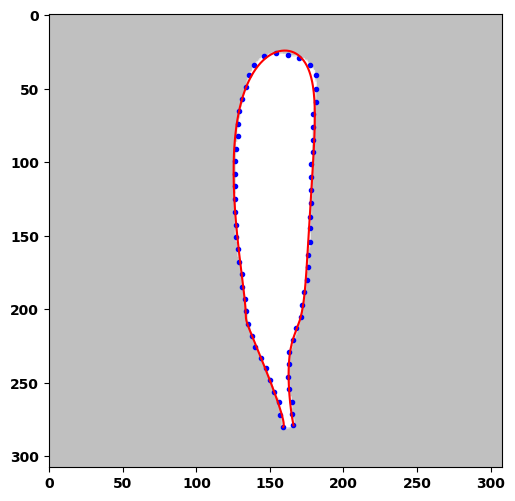

In [7]:
%%time
checkTo(8,mode=1,N=10,err_th=1)

.
CP 5.0, steps:0, etime: 6.31250 err: 4.0914453585
..
CP 2.0, steps:2, etime: 8.75000 err: 1.9177060332
........................................................E

Matrix([[159.0*t**11 + 149.324177935319*t**10*(11 - 11*t) + 10862.1882375153*t**9*(1 - t)**2 - 59708.8337790291*t**8*(1 - t)**3 + 511636.548606858*t**7*(1 - t)**4 - 1133952.75236877*t**6*(1 - t)**5 + 1406279.97525486*t**5*(1 - t)**6 - 581862.640611403*t**4*(1 - t)**7 + 170232.266527618*t**3*(1 - t)**8 - 2097.64216432028*t**2*(1 - t)**9 + 1980.30053061991*t*(1 - t)**10 + 166.0*(1 - t)**11], [280.0*t**11 + 236.98687791063*t**10*(11 - 11*t) + 15271.4855053685*t**9*(1 - t)**2 - 62420.2767857006*t**8*(1 - t)**3 + 501051.133280492*t**7*(1 - t)**4 - 965903.019002141*t**6*(1 - t)**5 + 796146.130934068*t**5*(1 - t)**6 - 365094.573906925*t**4*(1 - t)**7 + 124948.02955015*t**3*(1 - t)**8 - 654.128696931133*t**2*(1 - t)**9 + 2766.29862160462*t*(1 - t)**10 + 279.0*(1 - t)**11]]) [[166.0, 279.0], [180.02732096544605, 251.4816928731469], [

(0.9983217210753271,
 76.609375,
 59,
 [[166.0, 279.0],
  [180.02732096544605, 251.4816928731469],
  [-38.138948442186994, -11.893249035111513],
  [1031.7107062279863, 757.2607851524235],
  [-1763.2201230648564, -1106.3471936573476],
  [3043.896050335195, 1723.2600236668143],
  [-2454.4431869453797, -2090.699175329309],
  [1550.413783657147, 1518.3367675166417],
  [-361.87171987290344, -378.3047077921251],
  [197.49433159118774, 277.6633728248823],
  [149.32417793531914, 236.98687791062972],
  [159.0, 280.0]])

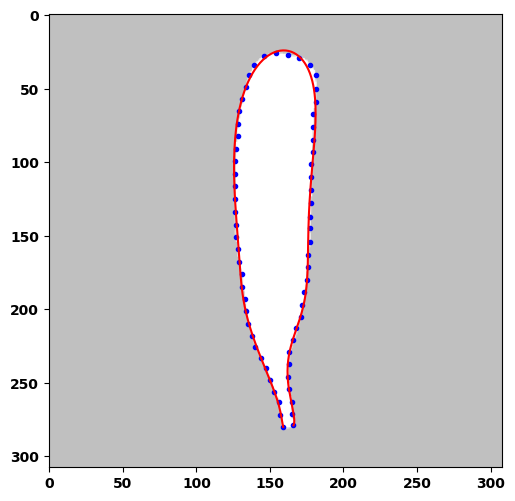

In [8]:
%%time
checkTo(8,mode=1,N=11,err_th=1)

....................................................................................
CP 5.0, steps:83, etime: 57.34375 err: 4.8924358012
................
.........
CP 2.0, steps:108, etime: 73.39062 err: 1.9700768219
.....................E

Matrix([[156.0*t**8 + 443.017815288597*t**7*(8 - 8*t) - 8392.10019791775*t**6*(1 - t)**2 + 37342.737540468*t**5*(1 - t)**3 + 14668.071386452*t**4*(1 - t)**4 - 22999.9996078747*t**3*(1 - t)**5 + 16460.1622729546*t**2*(1 - t)**6 - 996.0154413431*t*(1 - t)**7 + 149.0*(1 - t)**8], [281.0*t**8 + 216.655803090049*t**7*(8 - 8*t) - 715.992145346056*t**6*(1 - t)**2 + 14708.2233384102*t**5*(1 - t)**3 - 26491.3753902721*t**4*(1 - t)**4 + 17397.7247282372*t**3*(1 - t)**5 - 2563.09588347034*t**2*(1 - t)**6 + 1879.96217246429*t*(1 - t)**7 + 279.0*(1 - t)**8]]) [[149.0, 279.0], [-124.50193016788755, 234.99527155803617], [587.8629383198083, -91.53913869536916], [-410.7142787120481, 310.6736558613782], [209.54387694931435, -378.44821986102966], [666.8345989369287, 2

(0.9736702878437287,
 86.9375,
 130,
 [[149.0, 279.0],
  [-124.50193016788755, 234.99527155803617],
  [587.8629383198083, -91.53913869536916],
  [-410.7142787120481, 310.6736558613782],
  [209.54387694931435, -378.44821986102966],
  [666.8345989369287, 262.64684532875435],
  [-299.71786421134806, -25.57114804807343],
  [443.0178152885966, 216.6558030900489],
  [156.0, 281.0]])

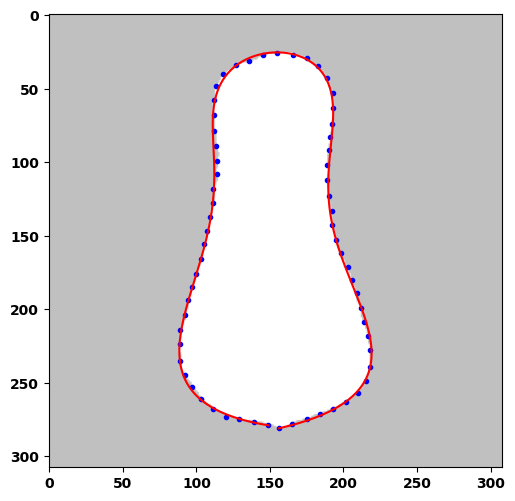

In [9]:
%%time
checkTo(0,mode=1,N=8,err_th=1)

....................
CP 5.0, steps:19, etime: 20.54688 err: 4.9568722133
...........................
CP 2.0, steps:46, etime: 42.51562 err: 1.9712253078
.......................E

Matrix([[156.0*t**9 + 154.822673073354*t**8*(9 - 9*t) + 32254.4858781079*t**7*(1 - t)**2 - 151537.68959943*t**6*(1 - t)**3 + 429179.526181494*t**5*(1 - t)**4 - 379361.866607957*t**4*(1 - t)**5 + 165460.047565492*t**3*(1 - t)**6 - 19170.0955633364*t**2*(1 - t)**7 + 1300.59940632915*t*(1 - t)**8 + 149.0*(1 - t)**9], [281.0*t**9 + 271.578117833162*t**8*(9 - 9*t) + 6915.13102157591*t**7*(1 - t)**2 - 5661.69289910135*t**6*(1 - t)**3 + 15619.1599055762*t**5*(1 - t)**4 - 24786.9663417938*t**4*(1 - t)**5 + 11791.9713424104*t**3*(1 - t)**6 + 3646.90731540559*t**2*(1 - t)**7 + 2618.54447555842*t*(1 - t)**8 + 279.0*(1 - t)**9]]) [[149.0, 279.0], [144.51104514768375, 290.94938617315785], [-532.5026545371228, 101.30298098348855], [1969.7624710177581, 140.38061121917116], [-3010.808465142514, -196.72195509360196], [3406.186

(0.9990843971805015,
 61.359375,
 70,
 [[149.0, 279.0],
  [144.51104514768375, 290.94938617315785],
  [-532.5026545371228, 101.30298098348855],
  [1969.7624710177581, 140.38061121917116],
  [-3010.808465142514, -196.72195509360196],
  [3406.186715726139, 123.96158655219213],
  [-1804.02011427893, -67.40110594168273],
  [895.9579410585517, 192.086972821553],
  [154.8226730733544, 271.5781178331623],
  [156.0, 281.0]])

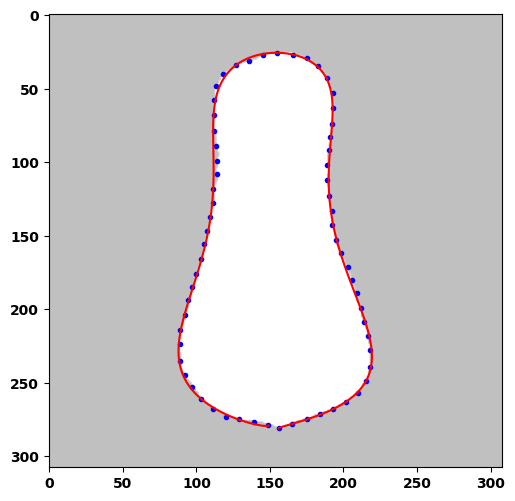

In [10]:
%%time
checkTo(0,mode=1,N=9,err_th=1)

^^^.^.^.^.^..^.^....................................................................................
....................................................................................................
......................................
CP 5.0, steps:237, etime: 37.92188 err: 4.9565850316
..............................................................
.......................
CP 2.0, steps:322, etime: 50.34375 err: 1.9924434113
.............................................................................
...............................................................^^^^^^^^^^^^^^^^^^^^^.^.^.^.^......^.
^...........................^^^^^^^^^^^^^^^^^^^^^^^^^^^.........^.^.............................^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^..^...^.^.^.^...
CP 1.0, steps:734, etime: 110.12500 err: 0.9977708047
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.49620133770130226,
 352.8125,
 2405,
 [[149.0, 279.0],
  [-133.19551, 247.12434],
  [648.6508, -215.81088],
  [-536.3537, 445.15872],
  [354.81622, -452.46133],
  [570.6856, 295.88348],
  [-261.9052, -51.05042],
  [434.88666, 224.18503],
  [156.0, 281.0]])

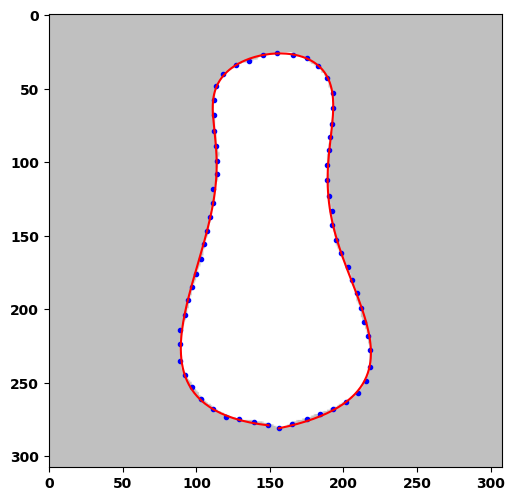

In [4]:
%%time
checkTo(0,mode=0,N=8,err_th=0.5)

^^^^.^^.^.....^.....................................................................................
....................................................................................................
..........^^^^^.^^.^...................................
CP 5.0, steps:254, etime: 34.64062 err: 4.9542708623
.........................................^^^^
^^.^^^..^.^...............
CP 2.0, steps:325, etime: 43.51562 err: 1.9828155148
..............................................^^^^^^^^^^^^^....^.^........
........................................^^^^^^^^^^^^^^.E

Matrix([[156.0*t**7 + 483.341*t**6*(7 - 7*t) - 11730.5*t**5*(1 - t)**2 + 49527.5*t**4*(1 - t)**3 - 37272.4*t**3*(1 - t)**4 + 16847.3*t**2*(1 - t)**5 - 1110.48*t*(1 - t)**6 + 149.0*(1 - t)**7], [281.0*t**7 + 197.521*t**6*(7 - 7*t) + 349.425*t**5*(1 - t)**2 - 952.074*t**4*(1 - t)**3 + 1241.08*t**3*(1 - t)**4 - 757.86*t**2*(1 - t)**5 + 1493.49*t*(1 - t)**6 + 279.0*(1 - t)**7]])
Wall time: 1min


(0.9983940653573302, 59.921875, 455)

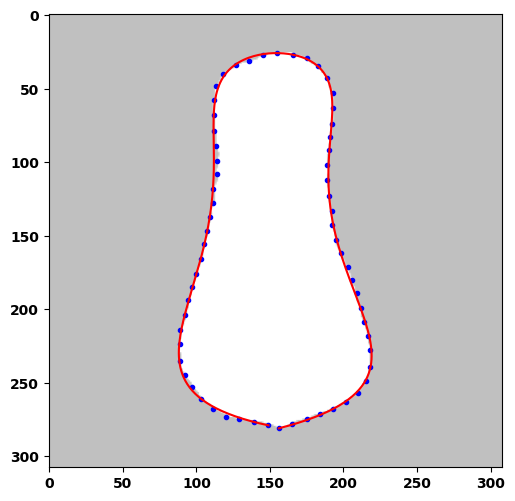

In [20]:
%%time
checkTo(0,mode=0,N=7,err_th=1.0)

In [8]:
%%time
checkTo(1,mode=0,N=12,err_th=0.5)

NameError: name 'checkTo' is not defined

^^^^^^^.^^^^^^.
CP 5.0, steps:14, etime: 9.07812 err: 3.9256421426
^.^^.^^.^^.^..^..............................................^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
....^^............^.........^^^^^^^^^^^^^^^^...^^^..^^^............................^^^^^^^^^^^^^^.^^
^.....^................................^^^^^^^^^^^^^^.....^^........................................
^^^^^^^^^^^^^^^^.^................................................^^^^^^^^^^^^^^^^^.
CP 2.0, steps:483, etime: 127.70312 err: 1.9913330322
^.^.^.^.^.^.^.^.
^.^..........................^^^^^^^^^^^^^^^^^^^^^^^^^.........................^.^^^^^^^^^^.........
..............................^^^^^^^^^^^^^^^^^^^^^......
CP 1.0, steps:656, etime: 171.75000 err: 0.9995060210
.................^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.....^^^^.^...........^^...^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.6424112631731203,
 762.125,
 3001,
 [[147.0, 280.0],
  [143.2606, 114.481445],
  [158.69481, 459.8274],
  [235.06094, -1228.4567],
  [-574.25543, 4286.7144],
  [748.39087, -7778.4634],
  [-404.74338, 9334.654],
  [419.7682, -7622.2695],
  [311.66855, 4108.99],
  [391.43472, -1233.825],
  [41.21205, 481.4877],
  [209.42444, 123.27205],
  [154.0, 280.0]])

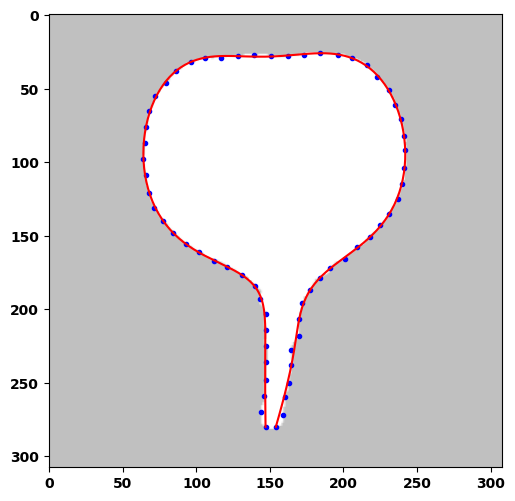

In [36]:
%%time
checkTo(1,mode=0,N=12,err_th=0.5)

^^^^^^^.^.^..^.^.^^.^..^..^..^.....................................................^^^^^^^^.^^^^^^^.
.......^^^^^.^^^^..^^^^^^^^^^.
CP 5.0, steps:129, etime: 34.09375 err: 4.9931908736
^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........^^^^^^
^^^^^^^^^^^^...^^.....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^...^.....^^.....^^....^^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^...........^^^^^^^^^^^^^^^^^^^^^
^^^^^...................^^^^^^^^^^^.^^^^^^^^^^^^^^^^....................................^^^^^^^^^^^^
^^^^^^^^.........
CP 2.0, steps:516, etime: 119.46875 err: 1.9942109911
.^^^^^^^^^.^^.^......^^^^^^^^^^^^^^^^^^^^^^^^^^^.......^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...^^^^^^^^^^^^^^^.........^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...........
.............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...^^^^^^

(0.915098419363599, 464.6875, 2072)

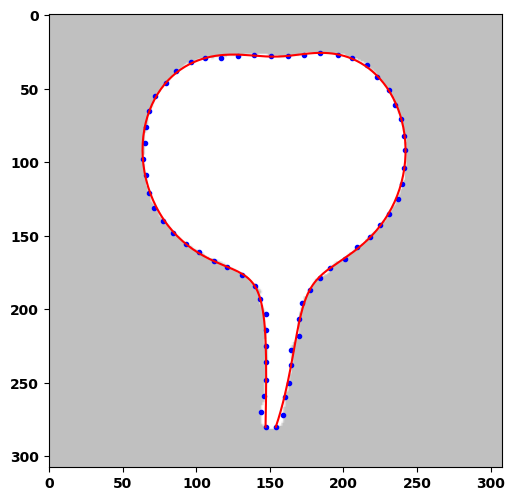

In [23]:
%%time
checkTo(1,mode=0,N=11,err_th=0.5)

^^^^^^^^^^.^..^...^......^.......................................^^^^^........................^^^^^^
^^...
CP 5.0, steps:104, etime: 26.78125 err: 4.9986710959
...^^^^^^^^^^^^^....^^^^^^^^.^..................^^^^^^^.^^^^^^^^^^.^^.^^^^^^^.............^.^^^
^^^^^^^^^^^............................^^^^^^^^^^^^.^^.^.............................^.^^^^^^^^^^^^^
^^.^......^.................................^.^^^^^^^^^^^^^^.^^^^^^^^^....^^^^^^^^^....^^^^^^^^^....
^^^^^^^^^.^^^^^^^^^^^^^.^.^^^^^^^^...^^^^^^^^^.....^^^^^^^^^.....^^^^^^^^^^^^^^^^^^^^^^^^..^^^^^^^^.
.....^^^^^^.................
CP 2.0, steps:527, etime: 114.28125 err: 1.9859379724
.......^.^.^^^^^^^^^^^^^^^^^^.^.^^^^^^^^^^....^^^^......................
.^^^^^^^...^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.
.............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(1.4303170096547517, 239.390625, 1130)

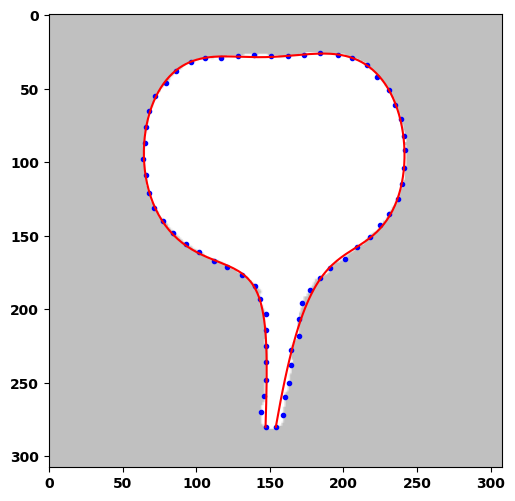

In [24]:
%%time
checkTo(1,mode=0,N=10,err_th=0.5)

^^^^^^^^^.^^^^.
CP 5.0, steps:14, etime: 8.62500 err: 4.5141702499
^....^..^.
CP 2.0, steps:24, etime: 10.87500 err: 1.9799834933
.^....................................................^^^^^^^^^^^.^^..^.^^.
^......................^^^^^^^^^^.^^^^.^^^^.........................^^^^^^^^^^^.^^^^^^.^.^.^.^......
................^^^^^^^^^^^^^^.^.^.^.^.^.^..........................^^^^^^^^^^^^^^^^^^.^.^.^........
.........................^^^^^^^^^^^^^^^^^^^.^.^^^^.^.^^^^.^.^^.^.^^.^.^^.^.^^.^..^.^..^^^^^^^^^^^^^
^^^^^.^^^^^.^^.^^.^^.^^.^^.^^^^^^.^^.^^..^..^^..^..^^^^^^^^^^^^^^^^^^^^^^^^.^.^^^^^^^^.^.^^^^^^.^^^^
^^^^^^^^^^^^^^^^^^^^^^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^.^.^^^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^.^.^^^^^^^^^^.^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^
^^^^^^^^^^^^^^^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.9876466451130222, 229.703125, 1014)

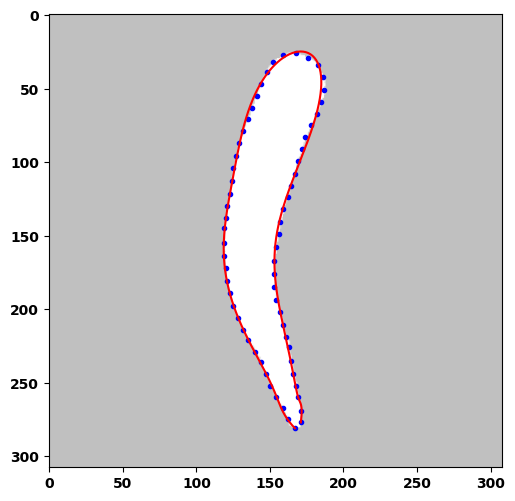

In [25]:
%%time
checkTo(2,mode=0,N=11,err_th=1)

^^^^^^^^^.^^^^.
CP 5.0, steps:14, etime: 8.79688 err: 4.5141702499
^....^..^.
CP 2.0, steps:24, etime: 11.01562 err: 1.9799834933
.^....................................................^^^^^^^^^^^.^^..^.^^.
^......................^^^^^^^^^^.^^^^.^^^^.........................^^^^^^^^^^^.^^^^^^.^.^.^.^......
................^^^^^^^^^^^^^^.^.^.^.^.^.^..........................^^^^^^^^^^^^^^^^^^.^.^.^........
.........................^^^^^^^^^^^^^^^^^^^.^.^^^^.^.^^^^.^.^^.^.^^.^.^^.^.^^.^..^.^..^^^^^^^^^^^^^
^^^^^.^^^^^.^^.^^.^^.^^.^^.^^^^^^.^^.^^..^..^^..^..^^^^^^^^^^^^^^^^^^^^^^^^.^.^^^^^^^^.^.^^^^^^.^^^^
^^^^^^^^^^^^^^^^^^^^^^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^.^.^^^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^.^.^^^^^^^^^^.^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^
^^^^^^^^^^^^^^^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.4949681270735019, 608.5625, 2658)

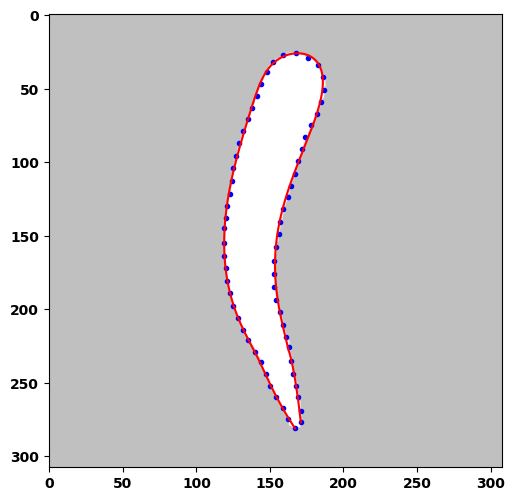

In [29]:
%%time
checkTo(2,mode=0,N=11,err_th=0.5)

^^^^^^^^^.^.^^......^..^.........
CP 5.0, steps:32, etime: 8.28125 err: 4.9993600382
...................................................................
....................................................................................................
..........................
CP 2.0, steps:225, etime: 36.85938 err: 1.9984768605
..........................................................................
....................................................................................................
....................................................................................................
.....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^.^^.^^^.^^....^.^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^..^....................................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^.......................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^.^........^.........................................^^^^^^^^^^^^^^^^^^^^^^^^^^

(1.1580868194021305,
 298.359375,
 1988,
 [[171.0, 277.0],
  [75.17177, -77.889206],
  [422.33847, 90.54141],
  [-36.396904, 131.45482],
  [335.44144, -351.11136],
  [-143.68045, 498.42154],
  [453.23242, -179.08324],
  [-35.26522, 7.7697597],
  [167.0, 281.0]])

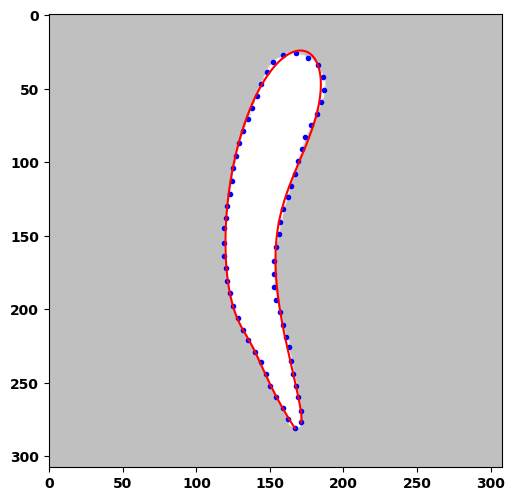

In [7]:
%%time
checkTo(2,mode=0,N=8,err_th=1.0)

^^^^^^^.^.^.^.^..^.................
CP 5.0, steps:34, etime: 6.96875 err: 4.9623687926
.................................................................
....................................................................................................
............................................................................
CP 2.0, steps:275, etime: 37.75000 err: 1.9982561518
........................
.....................................................................................^^^^^^^^^^^^^^^
^^.............................^^^^^^^^^^^^^^^^^^^^^...........................^^^^^^^^^^^^^^^^^^^^^
^.........................^^^^^^^^^^^^^^^^^^^^^^^^.......................^^^^^^^^^^^^^^^^^^^^^^^^...
..................^^^^^^^^^^^^^^^^^^^^^^^^^^^^.............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(1.3260347871705327,
 213.375,
 1660,
 [[171.0, 277.0],
  [58.482746, -155.40495],
  [562.04266, 194.9585],
  [-223.96388, -55.979294],
  [49.524998, -1.243419],
  [502.4965, -66.61309],
  [-53.916653, -37.847084],
  [167.0, 281.0]])

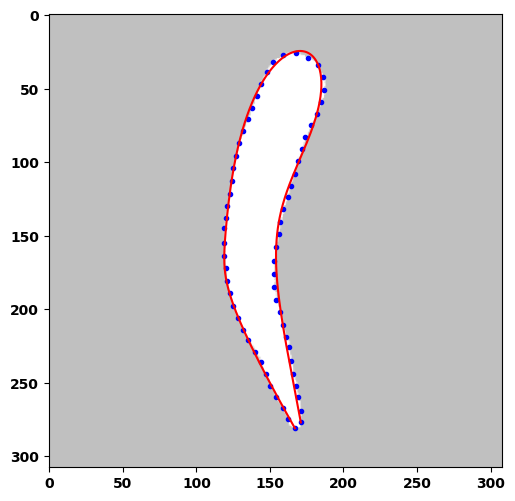

In [6]:
%%time
checkTo(2,mode=0,N=7,err_th=1.0)

^^^^^^^^.^^..^...
CP 5.0, steps:16, etime: 7.09375 err: 4.9811107331
.^.^..^.....^.^....................................................................
....................................................................................................
...............................
CP 2.0, steps:230, etime: 45.32812 err: 1.9981937965
............................................^^^^^^^^^^^^^^^^^^^^^^^^.
............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^..^.................^^^^^^^^^^^^^^^^.^.^^^^^^^^^^^^^^^^^^............................
..^^^^^^^^^^^^^^^^^^^^^^^^^^^^......^^^^^^^^^^^^^.^.^.^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^...............
.......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^..^........................................^^^^^^
^^^^^^^^^^..^........................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..........^.^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.6746863144808077, 531.421875, 3001)

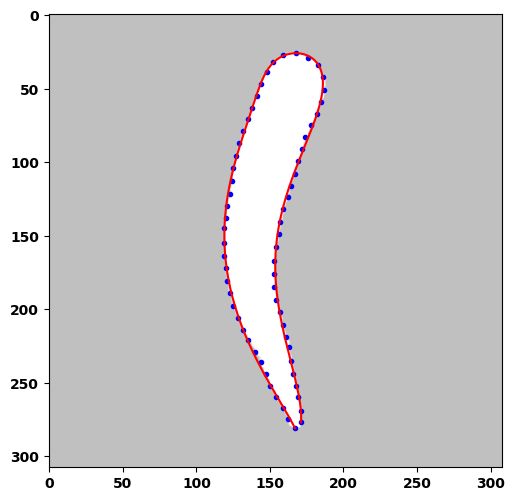

In [30]:
%%time
checkTo(2,mode=0,N=9,err_th=0.5)

^^^.^.^.^.^.^..^.^..^..............................................^^^.
CP 5.0, steps:70, etime: 11.71875 err: 4.9868461575
^^^^.^^......................
.....................^^^^^^^.^^^...........................................................^^^^^^^^.
^^.^.^......................................................^^^^^.^^^^.^.^.^........................
.................................^^^^^^^^^^.^^^^.^.^................................................
........^^^^^^^^^^.^^^^^^.^.^^.^..^.^..^....^..^....^..^...........................^^^^^^^^^^^.^^^..
.........................^^^^..
CP 2.0, steps:530, etime: 71.68750 err: 1.9953038641
..^^....................................^^^^^^^.^^^^^^^.^^.^..^......
...............................^^^^^^^^^^^^^^^^^.^.^.^..............................................
................^^^^^^^^^^^^^^^^^.^....^............................................................
...^^^^^^^^^^^^^^^^^^....E

Matrix([[154.0*t**7 + 113.373*t**6*(7 - 7*t) + 3502.36*t*

(0.9917025020760176, 110.28125, 825)

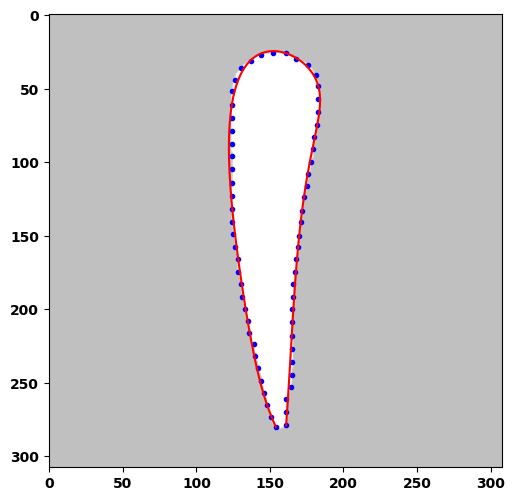

In [31]:
%%time
checkTo(3,mode=0,N=7,err_th=1.0)

^^^.^.^.^.^..^.^....^...............................................................................
........^^^^.^^..^..................................................................^^^.^.^.........
.............................................................^^^^.^.^.^.^..........................
CP 5.0, steps:298, etime: 33.82812 err: 4.9934850193
.
.................................^^^^^^^^^.^....^...................................................
................^^^^^^^^^^^^^^^.^^^^.^.^^^^^^^^^^^^^^^^^^.^.^.^^.^.^^^^.^.^^.^.^..^.^..^.^..........
.......^^^^^^^^^^^^.^.^................................^^^^^.....
CP 2.0, steps:564, etime: 62.53125 err: 1.9883798219
......................^^^^^^^^^^^^^
^.^............................................................................................^^^^^
^^^^^^^^^^^^.^.^..^...........................................................^^^^^^^^^^^^^^^^^^.^..
^.^...............
CP 1.0, steps:817, etime: 89.75000 err: 0.9989398958
............

(0.907127602429447,
 233.90625,
 2129,
 [[161.0, 279.0],
  [177.91457, -205.67558],
  [339.72266, 184.84543],
  [-297.8284, -21.25252],
  [397.7038, 97.7904],
  [17.321802, -130.10077],
  [154.0, 280.0]])

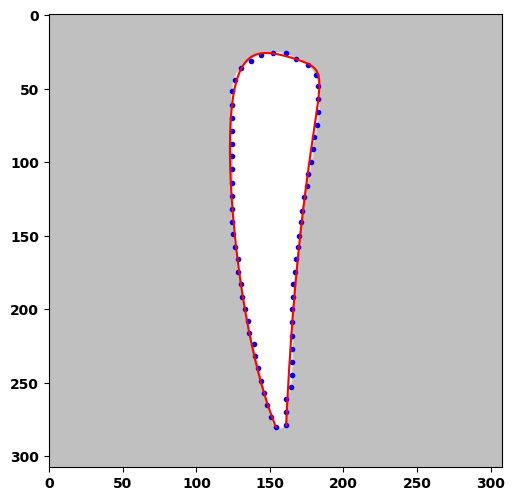

In [37]:
%%time
checkTo(3,mode=0,N=6,err_th=0.5)

^^^.^.^.^.^..^.^....................................................................................
....................................................................................................
.......................................................
CP 5.0, steps:254, etime: 24.12500 err: 4.9867892610
.............................................
........................................................................................
CP 2.0, steps:387, etime: 35.90625 err: 1.9970076697
............
....................................................................................................
.......................................................
CP 1.0, steps:554, etime: 50.90625 err: 0.9991951281
......^^^^^^^^^^^^^^^.^.^.^.^^.^^.^^.^^..^..^
..^..^........^.............................^^^^^^^^^^^^^^^^^^^^^..^.....^..................^..^^^^^
^^^^^^..........................^^^^^^^^^^^^^^^......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.8920636370575125,
 159.484375,
 1754,
 [[161.0, 279.0],
  [202.01697, -416.45956],
  [246.80728, 545.621],
  [274.94897, -93.29914],
  [27.844965, -148.81294],
  [154.0, 280.0]])

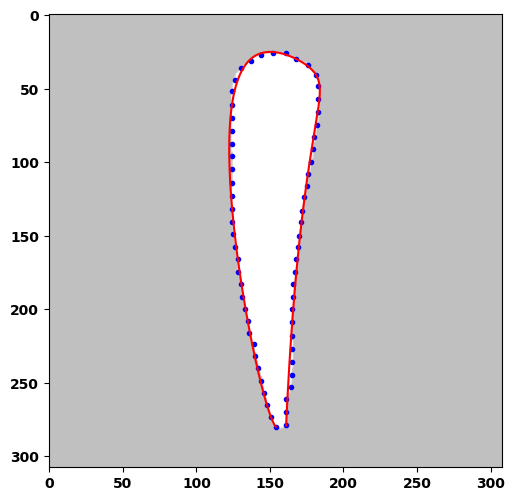

In [38]:
%%time
checkTo(3,mode=0,N=5,err_th=0.5)

^^^^^^^^^.^.^^.^.^..^.....................................
CP 5.0, steps:57, etime: 16.54688 err: 4.9609062964
..........................................
.......................^^^...^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^......
.^^^^^^^^^^^^^^....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.............................^^^^^^^^^^^^^^^^^^^...^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.....^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
.....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(2.1698232918974396,
 400.15625,
 1987,
 [[148.0, 279.0],
  [187.21184, -59.76637],
  [-124.1758, 498.81796],
  [186.88525, -265.49695],
  [400.42673, 212.54327],
  [-625.5826, 341.66302],
  [499.53928, -320.7169],
  [295.01294, -275.8697],
  [233.4091, 650.8015],
  [180.5904, -111.61679],
  [154.0, 280.0]])

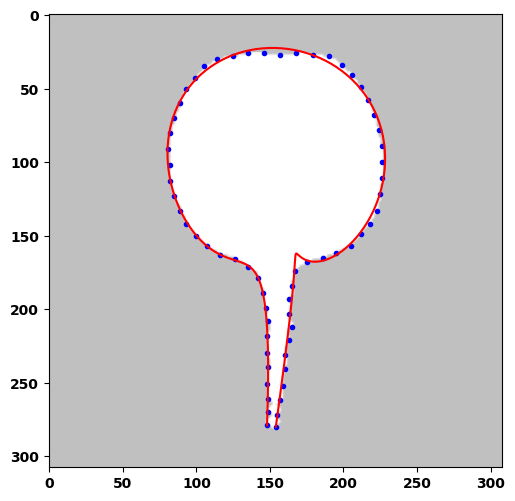

In [49]:
%%time
checkTo(4,mode=0,N=10,err_th=0.5)

^^^^^^^^^^^.^.^.^.^..^.^............................
CP 5.0, steps:51, etime: 16.76562 err: 4.9947664125
................................................
....................................................................................................
.....................................................^^^^^^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^.................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^.................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^..............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..........^^^^.....................^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.7246972139427261,
 709.953125,
 3001,
 [[148.0, 279.0],
  [181.87805, -130.32057],
  [-145.81781, 801.627],
  [460.60776, -748.6439],
  [-1175.018, -206.78265],
  [3154.54, 1151.9335],
  [-2934.0266, -776.44086],
  [1982.134, -7.7912874],
  [-137.90735, 258.29663],
  [157.88605, 317.18433],
  [191.93515, -9.713597],
  [154.0, 280.0]])

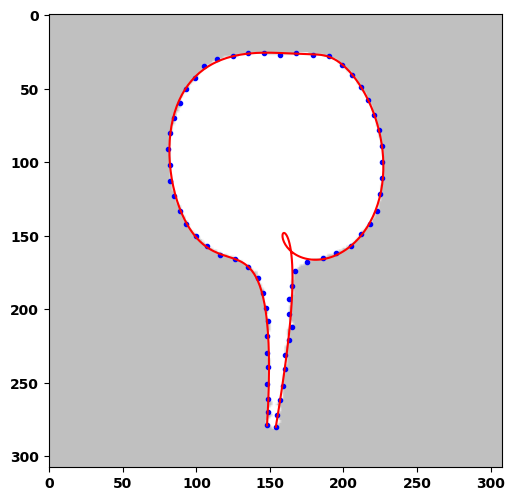

In [46]:
%%time
checkTo(4,mode=0,N=11,err_th=0.5)

^^^^^^^^^^^.^.^^..^.
CP 5.0, steps:19, etime: 10.51562 err: 4.5440350047
^^..^...........................................................................
.................................................................^^^^^^^^^^^^^^^^^^^^^^^^^^.........
.............^.^^^^^^^^^^^^^^^^^^^^^^..^....^....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^..^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^^.^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^..^^....^...^^^.^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^......
CP 2.0, steps:485, etime: 125.42188 err: 1.9833128556
..............
..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........
.......................^^^^^^^^^^^^^^^^^^^^^^^^^........E

Matrix([[154.0*t**12 + 195.005*t**11*(12 - 12*t) + 10107.4*t**10*(1 - t)**2 - 9832.08*t**9*(1 - t)**3 + 561982.0*t**8*(1 - t)**4 - 547131.0*t**7*(1 - t)**5 + 332333.0*t**6*(1 - t)**6 + 532364.0*t**5*(1 - t)**7 - 351161.0*t**4*(

(0.9941740117750494,
 167.921875,
 656,
 [[148.0, 279.0],
  [164.15942, -94.73588],
  [0.5422314, 809.0217],
  [450.54526, -1381.7561],
  [-709.4167, 3622.6648],
  [672.1768, -6416.859],
  [359.6673, 7944.943],
  [-690.82245, -6840.8936],
  [1135.3174, 4016.2048],
  [-44.69128, -1468.8053],
  [153.1426, 800.6547],
  [195.00511, -84.34503],
  [154.0, 280.0]])

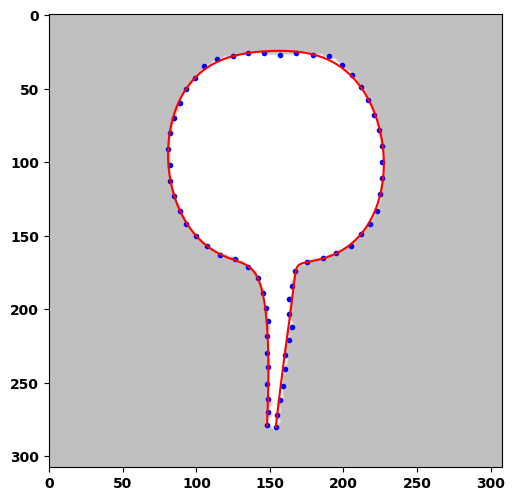

In [47]:
%%time
checkTo(4,mode=0,N=12,err_th=1)

^^^^^^^.^^^^.^.
CP 5.0, steps:14, etime: 7.12500 err: 3.4645052170
^^^^.^^.^^.^^.^........................^^^^^^^^^^^^^^^^^^^...^^.....................^
^^^^^^^^^^^.^^.................................^^^^^^^^^^^^^..^..^............................
CP 2.0, steps:193, etime: 39.10938 err: 1.9985706215
......
..^^^^^^^^^^^^^^^.^...^.......................................^^^^^^^^^^^^^^^^......................
........................^^^^^^^^^^^^^^^^^...^.^..............................................^^^^^^^
^^^^^^^^^^^^^.....^.............................................^^^^^^^^^^^^^^^^^^^^^^.^.^.^^^.^^..^
......^.^.^...........^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^..^.^.^.^.^^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^.^.^.^^^^^^^^.^.^.^^^^^^^^^^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^.^.^^.^.^^.^.^.^..^.^.^..^^^.
^.^.^..^.^.^.^.^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.996956254030736,
 336.703125,
 1875,
 [[150.0, 279.0],
  [167.36769, 194.17754],
  [-322.8264, 210.8435],
  [1173.8907, -80.05888],
  [-1658.4828, 14.157483],
  [1924.3301, 109.792114],
  [-795.5004, -230.37547],
  [591.18695, 331.9321],
  [137.92683, 192.33328],
  [156.0, 279.0]])

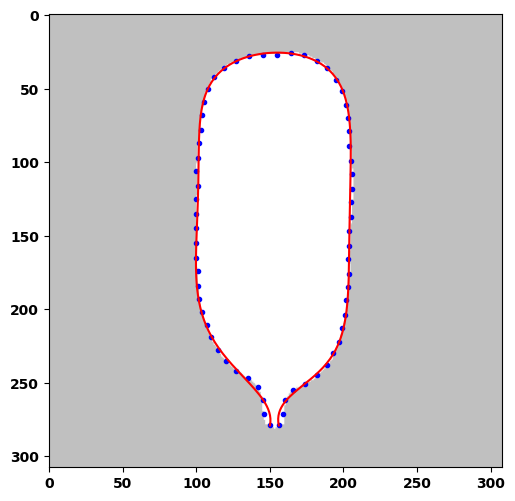

In [41]:
%%time
checkTo(5,mode=0,N=9,err_th=1)

^^^^^^^.^.^.^....^^....^..^.........................................................................
...........................................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^....^^......
.........................^^^^^^^.^^^.^^.............................................^^^^^^^^^^^^.^..
^................................^^^^^^^^^^^^^^^^^^^.........^^^^^^^^^^..^.^.......^^^^^^^^^^^^^^^^^
^^^^..................^^^^^^^^^^^^......................^^^^^^^^^^^^^^^^^^^^^....................^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^.....................^^^^^^^^^^^.^.^..^......................^^^^^^^^^^^
^^^^^^^^^^^^^^..............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...^^^...............^^^^^^^^^^^^^^..^.
...............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^^
...............^^^^^^^^^^^^^^^.^..............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^..........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^....

(6.042778104988414,
 379.59375,
 2892,
 [[150.0, 279.0],
  [-74.665924, -41.94968],
  [561.0737, 439.34686],
  [-830.0443, -873.49335],
  [1414.8436, 1067.1064],
  [-495.70734, -571.68964],
  [428.79605, 5.4440007],
  [156.0, 279.0]])

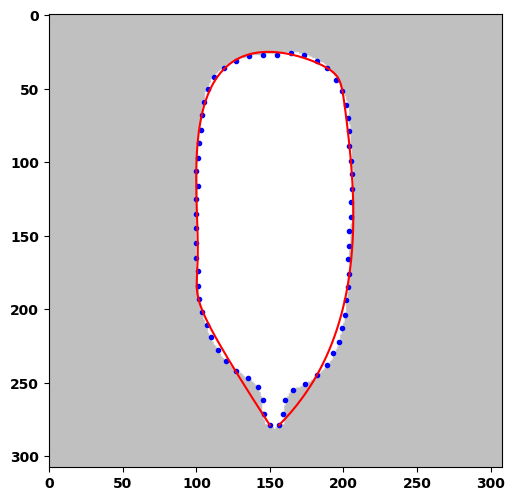

In [42]:
%%time
checkTo(5,mode=0,N=7,err_th=0.5)

^^^^^.^.^.^.^^.^.^^^^.^^.^..................^^^^^.^^^.^^.^^..................^^^^^.^^^.^^...........
.............^^^^^^^^^^^..^..............^^^.^........^^^^^^^^^^.^^.........^^^^^^^..............^^^
^^^^^^^^.^^^^.^^^.^.^.^........................^^^^^^^^^^^^^^^^^^^^^^...............................
....^^^^^^^^^^^^^^^^^^....................^^^^^^^^^^^^^^.^..^^^^^^^^^^^^^^^^^^^^....................
.....^^^^^^^^^^^^........^^^^^^^^^^^^..................................^^^^^^^^^^^^^^^^^^^^^^..^....
....................^^^^^^^^^^^^^^^^^^^^^.^^.......................^^^^^^^^^^^^^^^^^^^^^^^..........
......................^^^^^^^^^^^^^^^^^^^^^^^^^^^....................................^^^^^^^^^^^^^^^
^^^^^^^^^^^^^.......................................................^^^^^^^^^^...^..................
...............^^^^^^^......^^^^^^^^^^^^^.^^.^^......^..^...^..^.............^..^..................^
^^^^^^^^^^^^^^^^^.^^.
CP 5.0, steps:920, etime: 139.92188 err: 4.9447834987
^^.^^^^^^^^.^^.

(2.8799425417427384,
 448.21875,
 3001,
 [[150.0, 279.0],
  [120.52511, 143.78027],
  [-101.38737, 437.34735],
  [582.903, -643.10187],
  [-650.06213, 715.3239],
  [884.75354, -483.53336],
  [-160.70299, 225.50606],
  [355.5173, 42.24329],
  [156.0, 279.0]])

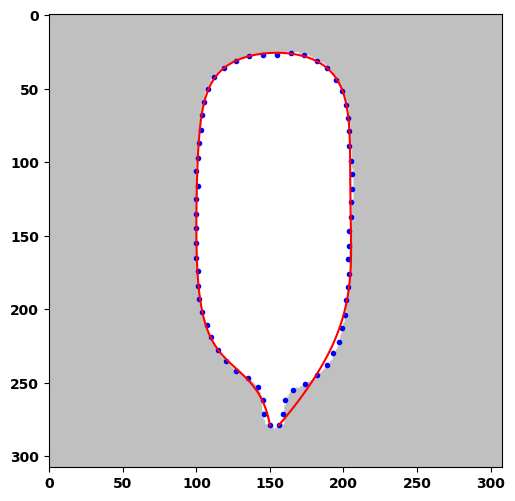

In [43]:
%%time
checkTo(5,mode=0,N=8,err_th=0.5)

^^^^^^.^^^^^^..^..^.
CP 5.0, steps:19, etime: 10.25000 err: 4.6773527264
^^...^..^.......................................................................
....................................................................................................
...............................................
CP 2.0, steps:246, etime: 63.56250 err: 1.9938213861
.....................................................
....................................................................................................
...^^^^^^^^^^^^^...........^^..........^^^^^^^^^^^^^^^^^^^^^^^^..................^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^.^.^^^.^^^^^.^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(1.094213559667942,
 470.5625,
 2054,
 [[138.0, 279.0],
  [173.0986, 56.713573],
  [112.33071, 1038.997],
  [-1087.1611, -1705.901],
  [3816.3503, 2784.5586],
  [-6182.538, -3102.668],
  [6854.1646, 2393.4265],
  [-4384.53, -1069.309],
  [2239.4768, 29.694468],
  [-255.82277, 591.9061],
  [268.39313, 116.1297],
  [144.0, 281.0]])

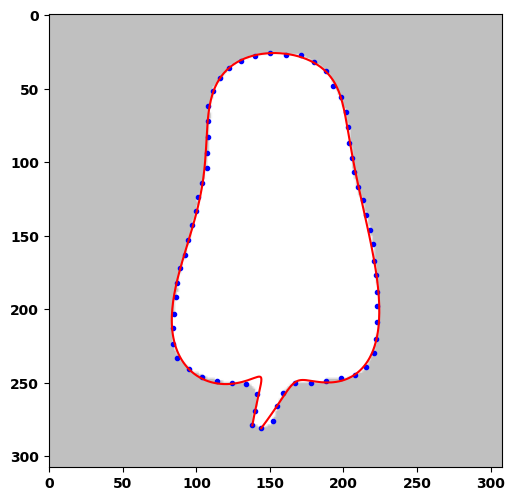

In [44]:
%%time
checkTo(6,mode=0,N=11,err_th=0.5)

^^^^^^^^^^^^^^^^.
CP 5.0, steps:16, etime: 9.54688 err: 4.1142056133
^^.^.^^..........................^^..^^^...................^^...^^^................
...^^...^^^...........
CP 2.0, steps:121, etime: 35.71875 err: 1.9948842789
.........^^^^..^^^.^^^....................^^^^..^^..........................^^
^^^^.^^^^^^^.^.^....................^^^^^^^^^^^..............^^^^^^^^^^.E

Matrix([[144.0*t**12 + 215.53*t**11*(12 - 12*t) - 6447.77*t**10*(1 - t)**2 + 324810.0*t**9*(1 - t)**3 - 921706.0*t**8*(1 - t)**4 + 1.30242e+6*t**7*(1 - t)**5 + 968843.0*t**6*(1 - t)**6 - 2.0868e+6*t**5*(1 - t)**7 + 1.23872e+6*t**4*(1 - t)**8 - 193829.0*t**3*(1 - t)**9 + 9878.84*t**2*(1 - t)**10 + 1878.11*t*(1 - t)**11 + 138.0*(1 - t)**12], [281.0*t**12 + 243.238*t**11*(12 - 12*t) - 7436.13*t**10*(1 - t)**2 + 480227.0*t**9*(1 - t)**3 - 2.55961e+6*t**8*(1 - t)**4 + 6.76106e+6*t**7*(1 - t)**5 - 8.74109e+6*t**6*(1 - t)**6 + 5.53057e+6*t**5*(1 - t)**7 - 1.55891e+6*t**4*(1 - t)**8 + 165522.0*t**3*(1 - t)**9 + 25396.

(0.9857248579494436,
 73.0625,
 272,
 [[138.0, 279.0],
  [156.50938, 157.11374],
  [149.67944, 384.79187],
  [-881.0405, 752.37103],
  [2502.46, -3149.3127],
  [-2634.8452, 6983.0366],
  [1048.5316, -9460.056],
  [1644.4746, 8536.693],
  [-1862.0323, -5170.932],
  [1476.4097, 2182.8503],
  [-97.69345, -112.66866],
  [215.5302, 243.23769],
  [144.0, 281.0]])

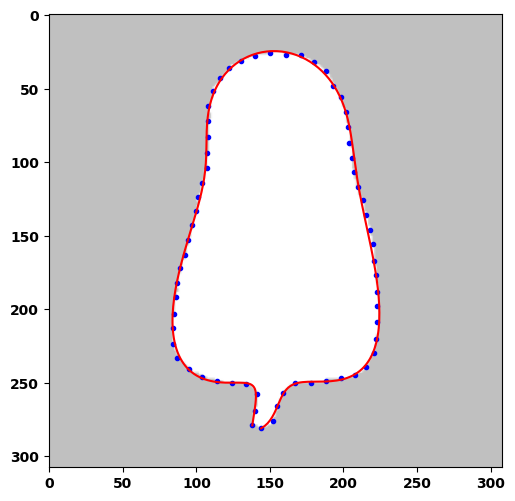

In [45]:
%%time
checkTo(6,mode=0,N=12,err_th=1)

^^^^^^^.^.^.^..
CP 5.0, steps:14, etime: 3.43750 err: 4.5811477230
.....
CP 2.0, steps:19, etime: 3.96875 err: 1.6834947716
^..^..^...^..^..................................................................
.^^^^^^^^^^^^^^.^........................................^^^^^^^^^^^^^^^....^.......................
....................^^^^^^^^^^^^^^^^^^......^^.^^.^^.......
CP 1.0, steps:258, etime: 29.71875 err: 0.9998280135
...............................^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^.^^^^^^.^^^^^^^^^.....^.............................^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^.................
.......................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^.^^.^................^^^^^^^^^^^^^^^^^^.^.^..^........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^.^...........................................
..........^^^^^^^^^^^^^^^^^^^^^^^^

(0.6319591341282343,
 261.28125,
 2402,
 [[168.0, 279.0],
  [171.49512, 168.1151],
  [257.82578, 427.7702],
  [157.05132, -590.4133],
  [107.5693, 310.02618],
  [73.71534, 132.61002],
  [161.0, 281.0]])

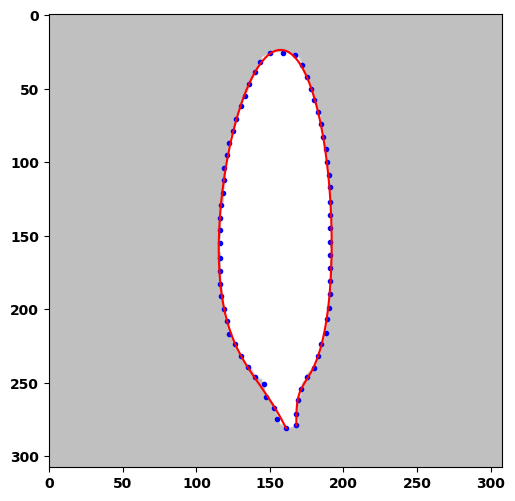

In [50]:
%%time
checkTo(7,mode=0,N=6,err_th=0.5)

^^^.^.^.^.^..^.^....................................................................................
...............................................^^^^^^^^^.^^.
CP 5.0, steps:159, etime: 15.60938 err: 4.9994858001
........................................
.......................^^^^^^^^.^^.^..^.............................................................
.....^^^^^^^^^^.^.^.^...................................................................^^^^^^^^^^^^
.^..^..^..............................................................................^^^^^^^^^^^^^^
^.^..............................................................^^^^^^^^^^^^^^^^^^^^.^...^.........
..................................................................^^^^^^^^^^^^^^^^.^.^.......^..^...
.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(2.382874580858728,
 153.0,
 1702,
 [[168.0, 279.0],
  [312.84592, -163.94089],
  [-177.82217, 110.61824],
  [523.34125, -169.74226],
  [-49.58683, 6.3988247],
  [161.0, 281.0]])

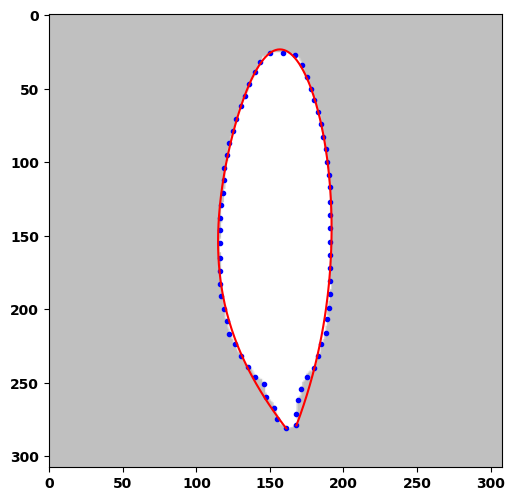

In [51]:
%%time
checkTo(7,mode=0,N=5,err_th=0.5)

^^^^^^^^^.^.^.^..
CP 5.0, steps:16, etime: 7.09375 err: 4.4827218514
^.^^.^..^..........................................................................
............................................................................^^^^^^^^^^^^^...........
............................^^^^^^^^^^^^^^^.
CP 2.0, steps:243, etime: 47.09375 err: 1.9571704209
.^^..........^^^^^^^^^^^.^^.^^^^^^^^^^^^^^...^^^^.......
..............^^^^^^^^^^^^^^....^^^^...........^^^^^^^^^^^^^^^^^^^^^^.....^^^^...................^^^
^^^^^^^^^......^^...................^^^^^^^^^^^^^^^.^.^.^.^.........................................
...............^^^^^^^^^^.^^^^^^.^.^..^.^..................
CP 1.0, steps:558, etime: 102.45312 err: 0.9996051618
................................^^^^^^^^^
^^^^^^.^^^^^^...^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^..^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^.^^^.^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.5873193654431973,
 441.421875,
 2461,
 [[166.0, 279.0],
  [150.98131, 74.74985],
  [436.501, -501.8098],
  [-601.1367, 843.14655],
  [1464.2764, -595.4146],
  [-1055.6648, 171.44368],
  [728.0482, 265.1207],
  [68.8638, -258.27533],
  [71.188, 43.58],
  [159.0, 280.0]])

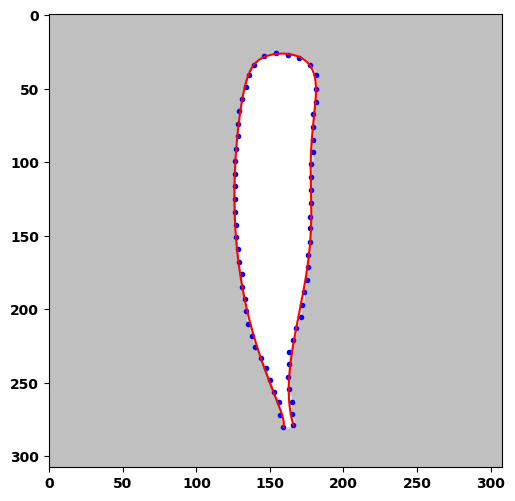

In [53]:
%%time
checkTo(8,mode=0,N=9,err_th=0.5)

# fitT mode 1

....................................................................................................
.
CP 5.0, steps:100, etime: 52.29688 err: 4.8904184236
................................
CP 2.0, steps:132, etime: 68.15625 err: 1.9633035335
............................
CP 1.0, steps:160, etime: 82.15625 err: 0.9987380084
...............................
CP 0.65, steps:191, etime: 97.54688 err: 0.6482304178
........
....................................................................................................
....................................................................................................
.............^^^^^^^^^.^^^^^^.^.^^^^.^..^^..C

Matrix([[156.0*t**7 + 485.831837007755*t**6*(7 - 7*t) - 12044.456155422*t**5*(1 - t)**2 + 50778.9678213651*t**4*(1 - t)**3 - 38946.6427863343*t**3*(1 - t)**4 + 17410.0892835273*t**2*(1 - t)**5 - 1128.48420594141*t*(1 - t)**6 + 149.0*(1 - t)**7], [281.0*t**7 + 195.974888465393*t**6*(7 - 7*t) + 619.024564666036*t**5*(1 - t)**2 - 419

(0.5137228026527839,
 222.78125,
 444,
 [[149.0, 279.0],
  [-161.2120294202017, 226.88434005820352],
  [829.0518706441578, -147.32305248722795],
  [-1112.761222466694, 188.53584757478217],
  [1450.8276520390023, -119.92569290189478],
  [-573.5455312105702, 29.477360222192175],
  [485.83183700775464, 195.97488846539338],
  [156.0, 281.0]])

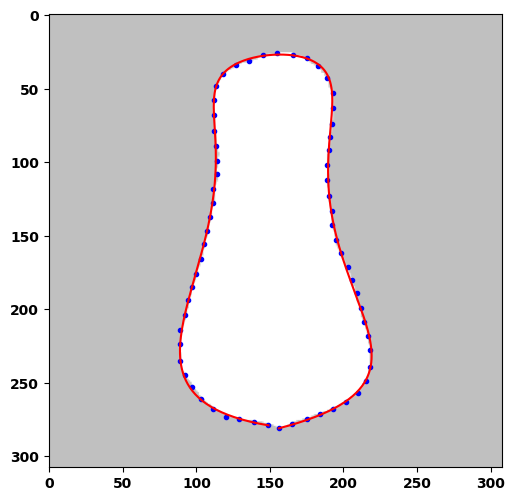

In [56]:
%%time
checkTo(0,mode=1,N=7,err_th=0.5)

....
CP 5.0, steps:3, etime: 9.98438 err: 4.8951966090
................................................................
CP 2.0, steps:67, etime: 88.01562 err: 1.9889341418
................................
...............................................................E

Matrix([[154.0*t**11 + 195.8326538444*t**10*(11 - 11*t) + 3207.13804584632*t**9*(1 - t)**2 + 107568.165483338*t**8*(1 - t)**3 - 113053.916667601*t**7*(1 - t)**4 + 609328.814990509*t**6*(1 - t)**5 - 639482.049136274*t**5*(1 - t)**6 + 447406.043038101*t**4*(1 - t)**7 - 139585.187787157*t**3*(1 - t)**8 + 22454.5921363061*t**2*(1 - t)**9 + 1280.41755880751*t*(1 - t)**10 + 147.0*(1 - t)**11], [280.0*t**11 + 251.86059169792*t**10*(11 - 11*t) - 20011.5268213647*t**9*(1 - t)**2 + 222529.524027406*t**8*(1 - t)**3 - 405855.297896902*t**7*(1 - t)**4 - 74556.6092580611*t**6*(1 - t)**5 + 890036.558376748*t**5*(1 - t)**6 - 848418.109712613*t**4*(1 - t)**7 + 309466.095736611*t**3*(1 - t)**8 - 25531.8941659425*t**2*(1 - t)**9 + 2698.50

(0.9929871213929323,
 204.25,
 163,
 [[147.0, 280.0],
  [116.40159625522799, 245.31836722189004],
  [408.265311569202, -464.21625756259056],
  [-845.970835073678, 1875.5520953734028],
  [1355.775887994247, -2570.9639688261013],
  [-1384.1602795157455, 1926.4860570925282],
  [1318.8935389404949, -161.37794211701535],
  [-342.5876262654585, -1229.8645390815202],
  [651.9282756565946, 1348.6637819842765],
  [58.311600833569436, -363.84594220663035],
  [195.8326538444004, 251.86059169792014],
  [154.0, 280.0]])

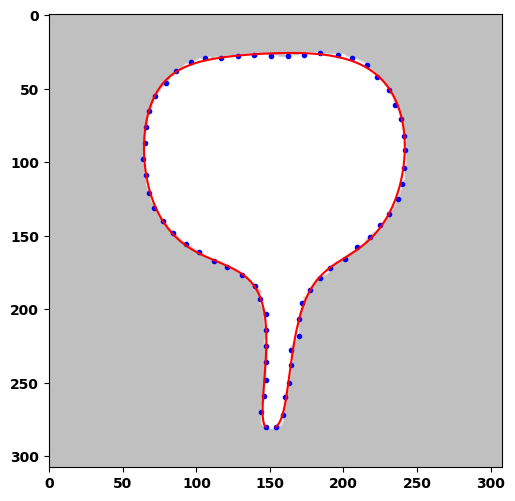

In [58]:
%%time
checkTo(1,N=11,mode=1,err_th=1)

.....
CP 5.0, steps:4, etime: 9.95312 err: 4.7634964544
......................................................................
CP 2.0, steps:74, etime: 81.00000 err: 1.9936764963
.........................
.............................................................
CP 1.0, steps:160, etime: 168.23438 err: 0.9929970403
.......................................
.......................
CP 0.65, steps:222, etime: 231.40625 err: 0.6487010214
.............................................................................
.......................................E

Matrix([[154.0*t**10 + 200.829643512917*t**9*(10 - 10*t) + 1520.07575514224*t**8*(1 - t)**2 + 92771.3257423372*t**7*(1 - t)**3 - 10197.7699343697*t**6*(1 - t)**4 - 62475.1918127806*t**5*(1 - t)**5 + 207396.873967659*t**4*(1 - t)**6 - 99068.2526073182*t**3*(1 - t)**7 + 17521.4681433626*t**2*(1 - t)**8 + 1206.39202151629*t*(1 - t)**9 + 147.0*(1 - t)**10], [280.0*t**10 + 247.950916823025*t**9*(10 - 10*t) - 26035.0984384929*t**8*(1 - t)**2 

(0.499847731847188,
 349.109375,
 339,
 [[147.0, 280.0],
  [120.63920215162898, 222.85348956176406],
  [389.365958741391, -526.631447480118],
  [-825.5687717276516, 2535.961327552409],
  [987.6041617507569, -4906.18597677003],
  [-247.9174278284943, 6044.764412587479],
  [-48.56080921128426, -4901.074505862398],
  [773.0943811861434, 2541.643136289231],
  [33.77946122538312, -578.5577430776204],
  [200.8296435129171, 247.95091682302507],
  [154.0, 280.0]])

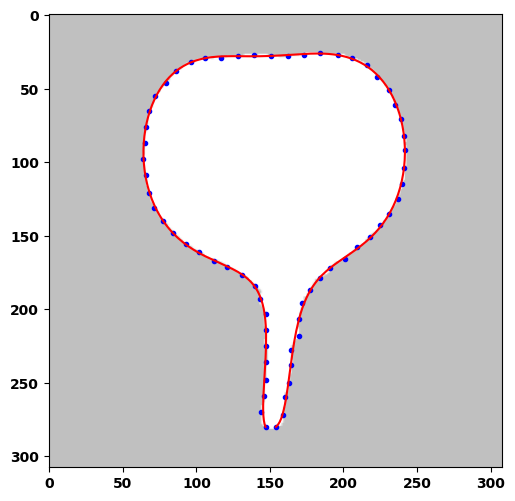

In [59]:
%%time
checkTo(1,N=10,mode=1,err_th=0.5)

...
CP 5.0, steps:2, etime: 6.87500 err: 4.8814313718
........
CP 2.0, steps:10, etime: 13.46875 err: 1.9434290042
.......................................
CP 1.0, steps:49, etime: 45.45312 err: 0.9981655218
..................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...............................^.^.^................................................................
.............................^....^

(0.665927922702847,
 2473.703125,
 3001,
 [[171.0, 277.0],
  [138.80468398835546, 29.265661522557686],
  [223.67854185870436, 783.8982308225425],
  [-169.7020904903967, -1325.391368070168],
  [877.6403487325219, 2057.2435020794305],
  [-393.3007000252848, -2182.171606761921],
  [357.4493782415064, 1386.4329259730648],
  [25.89579827493834, -208.64782114168466],
  [128.44504769381834, 243.1863749553193],
  [167.0, 281.0]])

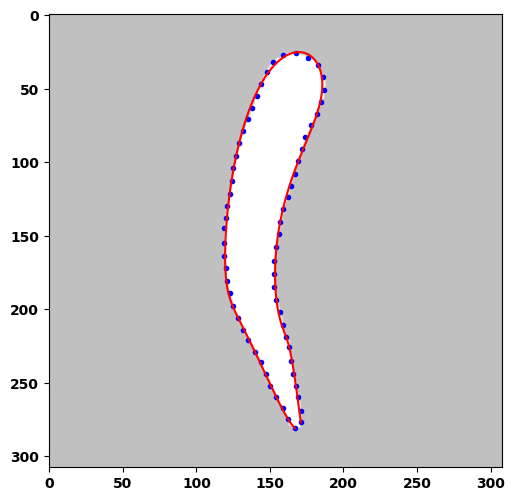

In [63]:
# %%time
checkTo(2,N=9,mode=1,err_th=0.5)

...
CP 5.0, steps:2, etime: 7.93750 err: 4.8764613637
.........
CP 2.0, steps:11, etime: 17.00000 err: 1.9521646047
................................
CP 1.0, steps:43, etime: 49.20312 err: 0.9950294623
........................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................................
CP 0.65, steps:465, etime: 476.53125 err: 0.6498201954
..................................
....................................................................................^.^....^........
.......................................^..^..^..^..^...............................^^.^.^.....^..^^^
.........................^^^.^^.......^..^...........^^.^^^^........^^.^^^^^.^^^

(0.5539817877097927,
 3048.4375,
 3001,
 [[171.0, 277.0],
  [132.26638352151596, 82.8855535278056],
  [493.51556353387485, 992.024603846653],
  [-1150.2585862193002, -1785.2561797895612],
  [2790.751976585595, 2562.9730619927022],
  [-2865.512480658169, -2645.2694310884335],
  [2602.4712006030627, 2008.036590939125],
  [-1317.926069761467, -1121.0544205429535],
  [634.1370816955066, 784.9974940327897],
  [34.867624713130944, 80.31702159641343],
  [167.0, 281.0]])

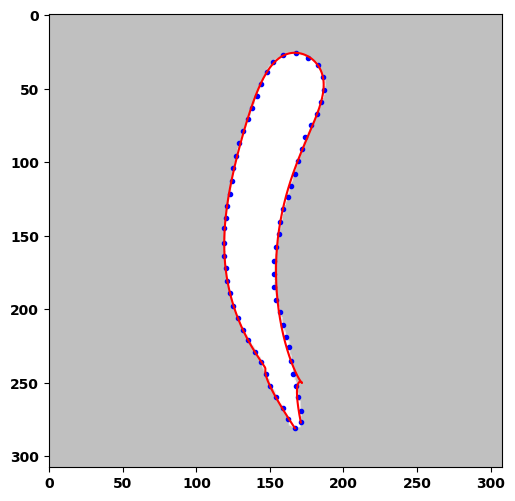

In [62]:
%%time
checkTo(2,N=10,mode=1,err_th=0.5)

.........
CP 5.0, steps:8, etime: 9.07812 err: 4.6151670974
..............
CP 2.0, steps:22, etime: 18.12500 err: 1.9791634658
.............................................................................
.......................................................................^............................
..................^.................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.................................................................................................^.^
.........................................................^..............................

(0.9998997378924929,
 830.140625,
 1279,
 [[171.0, 277.0],
  [191.5662976156918, 247.9687407519528],
  [-64.63740027677997, -170.12838412951083],
  [587.5988291955629, 498.46437819206847],
  [-37.27914888308159, -619.8015761203797],
  [111.09290091697774, 311.459823408241],
  [168.98788534546796, 221.0362695359926],
  [65.45349738030959, 100.33474260546798],
  [167.0, 281.0]])

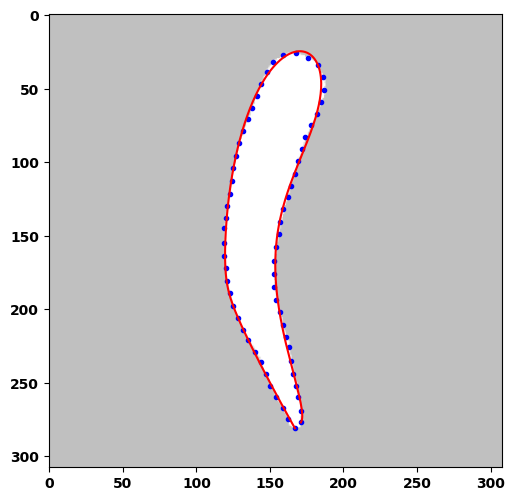

In [64]:
# %%time
checkTo(2,N=8,mode=1,err_th=1.0)

....................E

Matrix([[166.0*t**8 + 83.7587254840586*t**7*(8 - 8*t) + 8756.31378199864*t**6*(1 - t)**2 - 20635.3017720414*t**5*(1 - t)**3 + 46754.9865996223*t**4*(1 - t)**4 + 4755.51528186572*t**3*(1 - t)**5 + 2183.5095851968*t**2*(1 - t)**6 + 1453.6314350252*t*(1 - t)**7 + 170.0*(1 - t)**8], [281.0*t**8 + 144.605875986161*t**7*(8 - 8*t) + 9317.35495285307*t**6*(1 - t)**2 + 10907.3126197147*t**5*(1 - t)**3 - 48642.6827121224*t**4*(1 - t)**4 + 32959.1117849441*t**3*(1 - t)**5 - 2233.01434248618*t**2*(1 - t)**6 + 1999.7931551188*t*(1 - t)**7 + 276.0*(1 - t)**8]]) [[170.0, 276.0], [181.70392937814992, 249.9741443898497], [77.98248518559994, -79.7505122316493], [84.91991574760215, 588.5555675882882], [667.9283799946047, -694.8954673160342], [-368.48753164359664, 194.7734396377617], [312.7254922142373, 332.7626768876095], [83.75872548405857, 144.605875986161], [166.0, 281.0]]


(1.9451031528671967,
 15.796875,
 20,
 [[170.0, 276.0],
  [181.70392937814992, 249.9741443898497],
  [77.98248518559994, -79.7505122316493],
  [84.91991574760215, 588.5555675882882],
  [667.9283799946047, -694.8954673160342],
  [-368.48753164359664, 194.7734396377617],
  [312.7254922142373, 332.7626768876095],
  [83.75872548405857, 144.605875986161],
  [166.0, 281.0]])

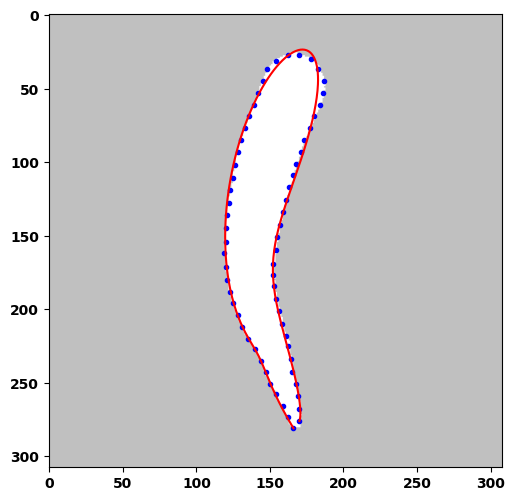

In [12]:
# %%time
checkTo(2,N=8,mode=1,err_th=2)

.........
CP 5.0, steps:8, etime: 8.92188 err: 4.6151670974
..............
CP 2.0, steps:22, etime: 18.29688 err: 1.9791634658
.............................................................................
.......................................................................^............................
..................^.................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.................................................................................................^.^
.........................................................^..............................

(0.8350634454584721,
 1955.265625,
 3001,
 [[171.0, 277.0],
  [187.2338401548506, 222.83623627710782],
  [-73.15203189120271, -127.10909258156082],
  [668.3979627678186, 395.79803835243393],
  [-202.09895111251691, -513.4066861806159],
  [277.8932301988464, 308.16481613185186],
  [84.10200781695198, 123.17471960376804],
  [85.89932243167932, 135.222648832142],
  [167.0, 281.0]])

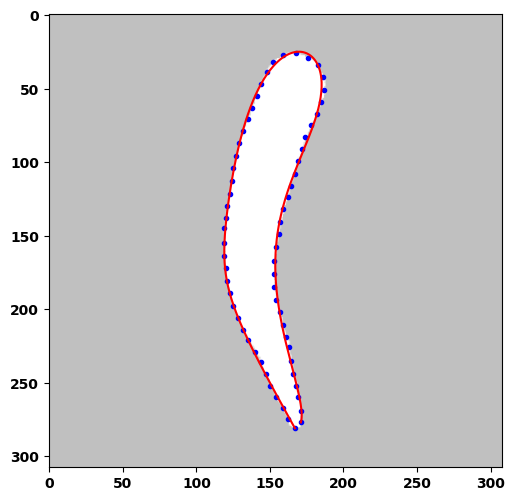

In [65]:
# %%time
checkTo(2,N=8,mode=1,err_th=0.65)

....................................................................................................
....................................................................................................
........................
CP 5.0, steps:223, etime: 58.81250 err: 4.9903009479
............................................................................
.................................................
CP 2.0, steps:348, etime: 91.04688 err: 1.9981261962
...................................................
....................................................................................................
..........................
CP 1.0, steps:525, etime: 137.10938 err: 0.9999594210
..................................^.......................................
.............^.............................................^^.^.....................................
..............^^^.^..^.^..................................^^^..^^^..^..............^^^^..^.^........
^^^..^^^^^.^.^.^.^.......^^^^

(0.8825697647353752,
 401.71875,
 1551,
 [[161.0, 279.0],
  [182.51467805135132, -202.98384399421573],
  [257.3657950857872, 336.28546879099326],
  [40.20612346494283, -327.68719805188954],
  [125.7899092335305, 233.62812026797351],
  [154.0, 280.0]])

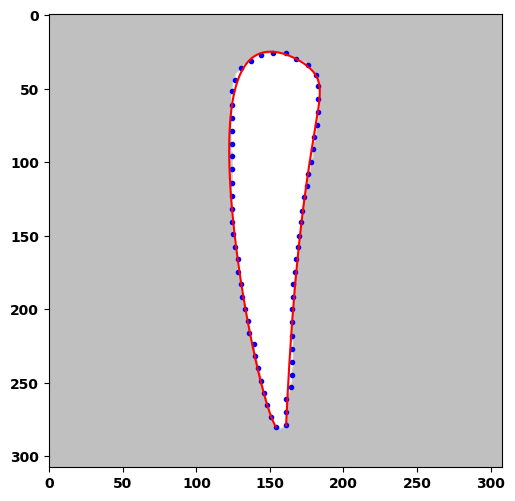

In [66]:
# %%time
checkTo(3,N=5,mode=1,err_th=0.5)

.....................................................................
CP 5.0, steps:68, etime: 27.07812 err: 4.9525814817
...............................
.....................................
CP 2.0, steps:136, etime: 52.23438 err: 1.9949363600
...............................................................
.............................................................
CP 1.0, steps:260, etime: 97.87500 err: 0.9993002564
.......................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
........................................................C

Matrix([[154.0*t**6 + 133.129224619392*t**5*(6 - 6*t) + 19.3524715951142*

(0.8487091668598812,
 280.921875,
 756,
 [[161.0, 279.0],
  [168.64282017287854, 226.75396917672856],
  [156.26151878035603, -304.3599619089404],
  [323.9642996497911, 499.24930638799026],
  [1.290164773007614, -458.3016248241668],
  [133.12922461939155, 261.4222451285025],
  [154.0, 280.0]])

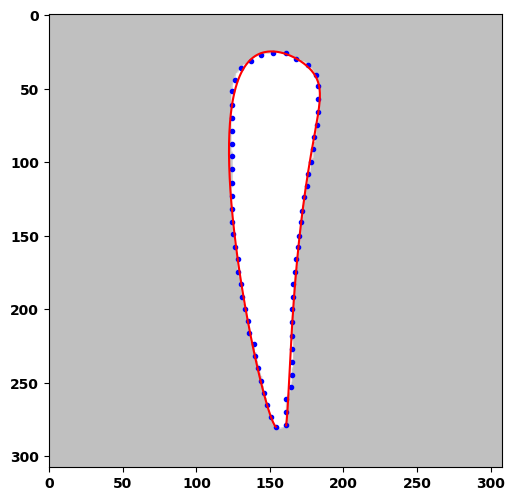

In [67]:
 %%time
checkTo(3,N=6,mode=1,err_th=0.5)

.....................................................................
CP 5.0, steps:68, etime: 27.10938 err: 4.9525814817
...............................
.....................................
CP 2.0, steps:136, etime: 52.12500 err: 1.9949363600
...............................................................
.............................................................
CP 1.0, steps:260, etime: 97.62500 err: 0.9993002564
.......................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
........................................................C

Matrix([[154.0*t**6 + 133.129224619392*t**5*(6 - 6*t) + 19.3524715951142*

(0.8487091668598812,
 280.921875,
 756,
 [[161.0, 279.0],
  [168.64282017287854, 226.75396917672856],
  [156.26151878035603, -304.3599619089404],
  [323.9642996497911, 499.24930638799026],
  [1.290164773007614, -458.3016248241668],
  [133.12922461939155, 261.4222451285025],
  [154.0, 280.0]])

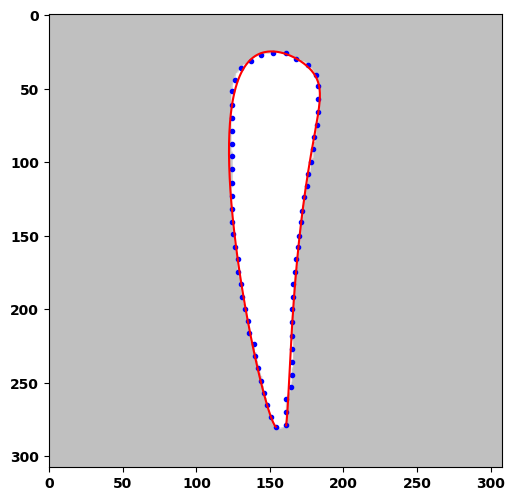

In [68]:
%%time
checkTo(3,N=6,mode=1,err_th=0.5)

..................
CP 5.0, steps:17, etime: 15.04688 err: 4.8766710603
....................
CP 2.0, steps:37, etime: 27.93750 err: 1.9637344684
..............................
CP 1.0, steps:67, etime: 47.28125 err: 0.9915715428
................................
........................................................................^^^.^..^....................
......................^^^^.^.^.^.^.................................^^^^^^^^^^^.^.^...^.^^.^.^.......
.........^.^^^^^^^^^^^^^^^^^^^.^^.^^.^^^^.^^^^^^^^^^^^^^^^^^^^^.^^.^^^^.^^^^^^^^^^^^^^^^^^.^^^^.^^^^
^^^^^^^^.^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.7582146909027355,
 1946.953125,
 3001,
 [[161.0, 279.0],
  [174.8669733092317, 90.66823975229256],
  [160.15183973865973, 857.093141681942],
  [49.37415961648799, -1735.7166216271094],
  [706.0099233831504, 2506.4863700435453],
  [-543.6169051909891, -2500.839279064597],
  [483.59226396525503, 1585.1331480361202],
  [40.69035580691152, -104.47166599862207],
  [154.0, 280.0]])

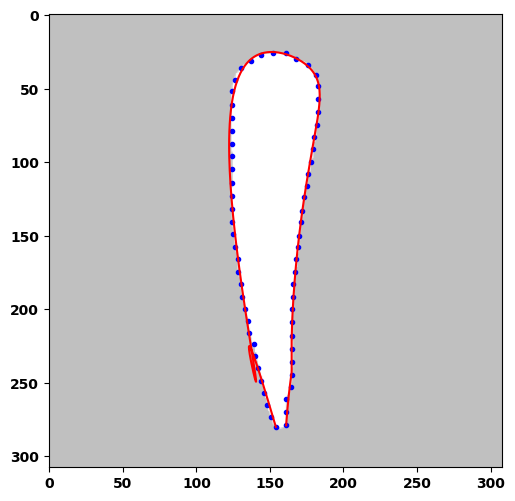

In [69]:
%%time
checkTo(3,N=8,mode=1,err_th=0.5)

.........
CP 5.0, steps:8, etime: 14.00000 err: 4.8136480850
...........................................................................................
.......................................
CP 2.0, steps:138, etime: 145.15625 err: 1.9995879305
.............................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.................................................................
CP 1.0, steps:664, etime: 681.04688 err: 0.9998878783
...................................
.......................................................................................^............
..............................

(0.5607737575396697,
 3049.5625,
 3001,
 [[148.0, 279.0],
  [147.5539029356004, 141.31352824014914],
  [207.75533447456846, -298.84925941080195],
  [-269.8600869728279, 2021.4208591844767],
  [232.1721912320732, -3969.2504493549327],
  [445.91088631180827, 4910.1743961347065],
  [-423.5290834431792, -4014.255584365515],
  [887.281030223369, 2037.162510502106],
  [-40.21540070798114, -251.58563129516162],
  [206.08110469343018, 105.6902925433779],
  [154.0, 280.0]])

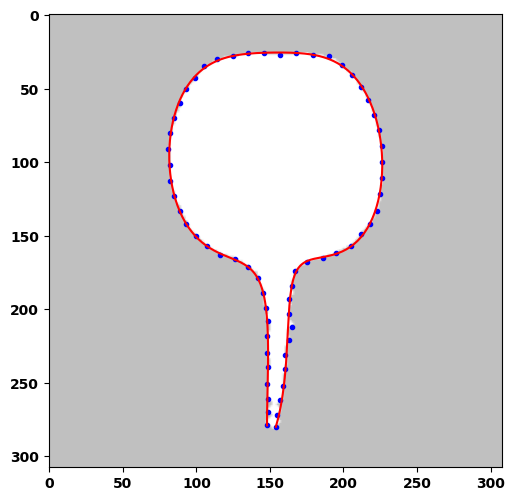

In [70]:
%%time
checkTo(4,N=10,mode=1,err_th=0.5)

..........
CP 5.0, steps:9, etime: 12.31250 err: 4.7333578649
..........................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.............................^.................................................^....................
........^^..^...........^...^..^^^.^..C

Matrix([[154.0*t**9 + 162.988702515346*t**8*(9 - 9*t) + 10481.3130073294*t**7*(1 - t)**2 - 40651.2942986698*t**6*(1 - t)**3 + 250783.766133295*t**5*(1 - t)**4 - 202281.010111077*t**4*(1 - t)**5 + 58857.5121006274*t**3*(1 - t)**6 + 736.65094174032*t**2*(1 - t)**7 + 1479.77262377321*t*(1 - t)**8 + 148.0*(1 - t)**9], [280.0*t**9 + 208.582133748115*t**8*(9 - 9*t) - 10541.7078039544*t**7*(1 - t)**2 + 102

(2.404481973864827,
 449.890625,
 538,
 [[148.0, 279.0],
  [164.4191804192451, 140.69086625124538],
  [20.462526159453326, -8.606551317312402],
  [700.6846678646124, 664.9406804113112],
  [-1605.4048421514042, -250.4955515935117],
  [1990.3473502642426, -857.3234692893304],
  [-483.94397974606846, 1216.8319498459948],
  [291.1475835369281, -292.8252167765098],
  [162.98870251534615, 208.58213374811504],
  [154.0, 280.0]])

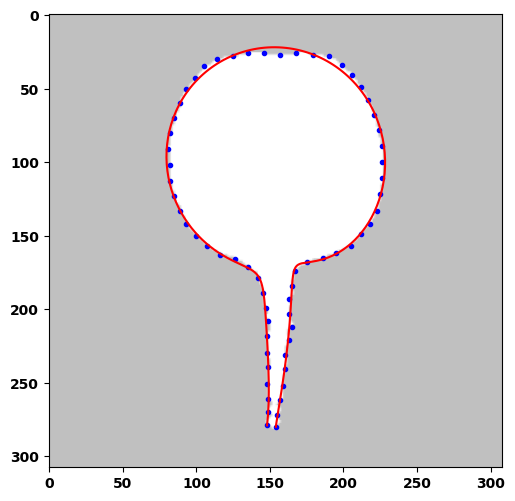

In [71]:
%%time
checkTo(4,N=9,mode=1,err_th=0.5)

..........
CP 5.0, steps:9, etime: 9.57812 err: 4.4167374012
.......................................................................
CP 2.0, steps:80, etime: 55.82812 err: 1.9985884739
...................
....................................................................................................
...........................................
CP 1.0, steps:242, etime: 160.21875 err: 0.9989448015
.........................................................
....................................................................................................
....................................................................................................
.......................^^.^.......................................^^..............^^^..^............
...........................^^^^.^..........................................^^^^.....................
.................^^^^^^..........................................^^^....^^^^........................
.................................

(0.7142795621444735,
 1870.5625,
 2880,
 [[150.0, 279.0],
  [98.95998426090843, 79.07359918020312],
  [43.937665284298355, 863.902678246392],
  [155.5919040026766, -1795.9031220049533],
  [60.36595844309628, 2295.537265464884],
  [284.4319518486291, -1875.0650085899338],
  [215.48644019754124, 916.8488980175936],
  [205.97180004989607, 95.69949131950298],
  [156.0, 279.0]])

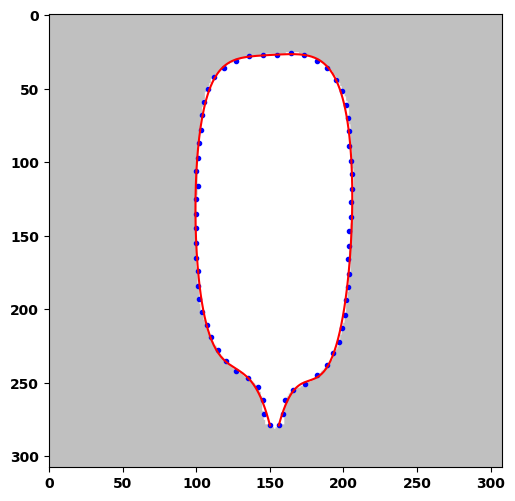

In [73]:
%%time
checkTo(5,N=8,mode=1,err_th=0.5)

........^^^.........................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.............................^............^^........................................................
............^^...................^^.^..^^^.............................^............................
.....^.......................................................^..^.^..^^..^.^.^^.^.^^..^.^..

(5.917854876327663,
 582.75,
 1158,
 [[150.0, 279.0],
  [65.13984573147732, 56.71552094693154],
  [317.1356812584872, 909.7672750060245],
  [-486.1255554992875, -1195.2141321156248],
  [838.7741666833339, 861.7854638455876],
  [-161.7934357664234, -284.9248670245393],
  [358.6953933100229, 83.91397338570808],
  [156.0, 279.0]])

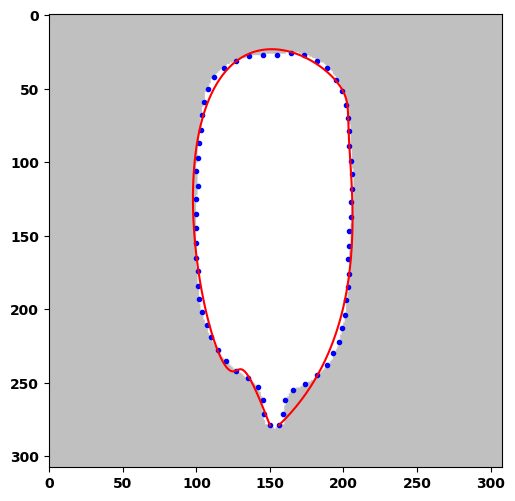

In [74]:
%%time
checkTo(5,N=7,mode=1,err_th=0.5)

.
CP 5.0, steps:0, etime: 4.81250 err: 4.5050444361
..................
CP 2.0, steps:18, etime: 20.03125 err: 1.9736223638
.................................................................................
.
CP 1.0, steps:100, etime: 87.26562 err: 0.9962659943
...........................................................................
CP 0.65, steps:175, etime: 149.68750 err: 0.6485737440
........................
......................................................E

Matrix([[156.0*t**9 + 169.414823907909*t**8*(9 - 9*t) + 14420.0226542017*t**7*(1 - t)**2 - 24096.830567144*t**6*(1 - t)**3 + 138811.546030668*t**5*(1 - t)**4 - 103259.913676266*t**4*(1 - t)**5 + 53530.4622284265*t**3*(1 - t)**6 - 4148.59846597271*t**2*(1 - t)**7 + 1176.70019747013*t*(1 - t)**8 + 150.0*(1 - t)**9], [279.0*t**9 + 150.466575184645*t**8*(9 - 9*t) + 19433.3042187134*t**7*(1 - t)**2 - 43739.0475846852*t**6*(1 - t)**3 + 24567.8536164787*t**5*(1 - t)**4 + 35037.1281306688*t**4*(1 - t)**5 - 43221.2372163923*t**3*(

(0.49883811930369226,
 215.234375,
 254,
 [[150.0, 279.0],
  [130.74446638557052, 134.57811501680638],
  [-115.23884627701973, 497.9338486255352],
  [637.2674074812685, -514.5385382903848],
  [-819.5231244148098, 278.0724454814982],
  [1101.6789367513327, 194.98296521014876],
  [-286.8670305612377, -520.7029474367286],
  [400.5561848389375, 539.8140060753718],
  [169.41482390790873, 150.46657518464485],
  [156.0, 279.0]])

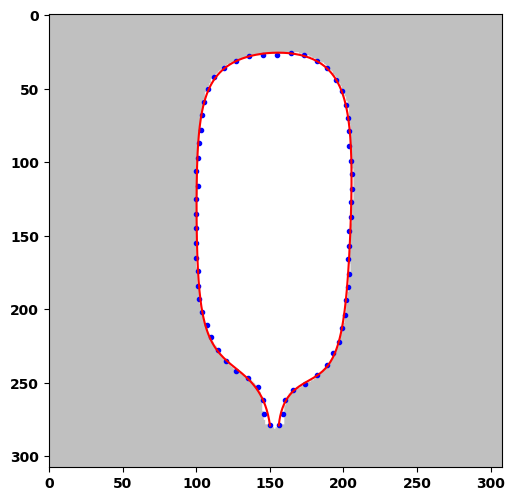

In [75]:
%%time
checkTo(5,N=9,mode=1,err_th=0.5)

................
CP 5.0, steps:15, etime: 21.07812 err: 4.9257448903
....................................................................................
.............
CP 2.0, steps:112, etime: 119.20312 err: 1.9888885243
.......................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.................................................^^^^.........^^^^^^......^^^^^^......^^^^^.....^^^^
^^^^....^^^^.....................................................................^.^................
.............^.^.^..........^.......^................^.^...^.^^^^^^^^.^..^...^...^...^^.^^^^....^..^
.^.^.^.^.^^...^^^..^.^...^....^.....^^^.^.^..^...^....^.^..^.^.^....^^^^..^^^^.^^...

(1.0187945932619085,
 1075.03125,
 1055,
 [[138.0, 279.0],
  [222.3182677962094, 96.65364960574433],
  [-778.8171038938347, 913.1621777211708],
  [2355.4958576613203, -1896.4896063520866],
  [-3420.293291434742, 2778.8629514174054],
  [3725.1740028719905, -2798.6592538544955],
  [-2122.0163891321836, 2041.2287098772983],
  [1205.8063702315028, -1102.2919960123784],
  [8.324418454980536, 819.3458844549705],
  [256.72308521905694, 90.97222431205162],
  [144.0, 281.0]])

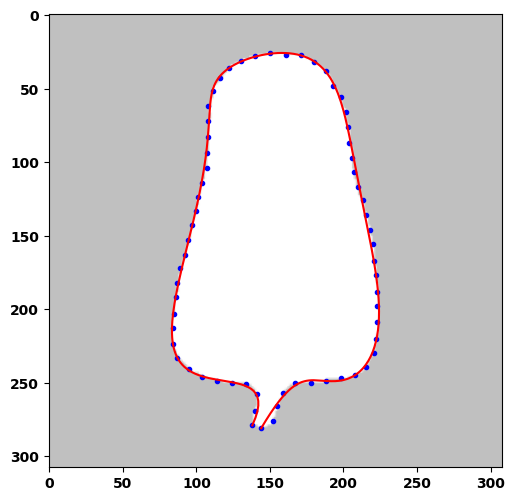

In [76]:
%%time
checkTo(6,N=10,mode=1,err_th=0.5)

...
CP 5.0, steps:2, etime: 8.95312 err: 4.4061264930
................
CP 2.0, steps:18, etime: 28.70312 err: 1.9945074769
......................................E

Matrix([[144.0*t**11 + 264.524196568565*t**10*(11 - 11*t) - 24829.0962601424*t**9*(1 - t)**2 + 449759.2595819*t**8*(1 - t)**3 - 1631122.0076277*t**7*(1 - t)**4 + 3364022.96179274*t**6*(1 - t)**5 - 2970895.80070511*t**5*(1 - t)**6 + 1316614.42730311*t**4*(1 - t)**7 - 201443.260547086*t**3*(1 - t)**8 + 9687.04360675507*t**2*(1 - t)**9 + 1752.6764638393*t*(1 - t)**10 + 138.0*(1 - t)**11], [281.0*t**11 + 179.286239536422*t**10*(11 - 11*t) + 16777.4033149209*t**9*(1 - t)**2 + 94054.3460699191*t**8*(1 - t)**3 - 320165.991215143*t**7*(1 - t)**4 + 571683.605397465*t**6*(1 - t)**5 - 601969.372741251*t**5*(1 - t)**6 + 358277.039540582*t**4*(1 - t)**7 - 107171.976393265*t**3*(1 - t)**8 + 36634.1982731471*t**2*(1 - t)**9 + 1396.81832784573*t*(1 - t)**10 + 279.0*(1 - t)**11]]) [[138.0, 279.0], [159.33422398539057, 126.98348434961206], [1

(0.9900732049598819,
 75.015625,
 57,
 [[138.0, 279.0],
  [159.33422398539057, 126.98348434961206],
  [176.1280655773649, 666.0763322390384],
  [-1220.8682457399177, -649.527129656151],
  [3989.7406887973025, 1085.6879986078243],
  [-6430.510391136603, -1302.964010262449],
  [7281.434982235361, 1237.4104012932148],
  [-4942.793962508186, -970.1999733792211],
  [2725.8136944357548, 570.0263398176915],
  [-451.43811382077115, 305.04369663492537],
  [264.52419656856466, 179.28623953642193],
  [144.0, 281.0]])

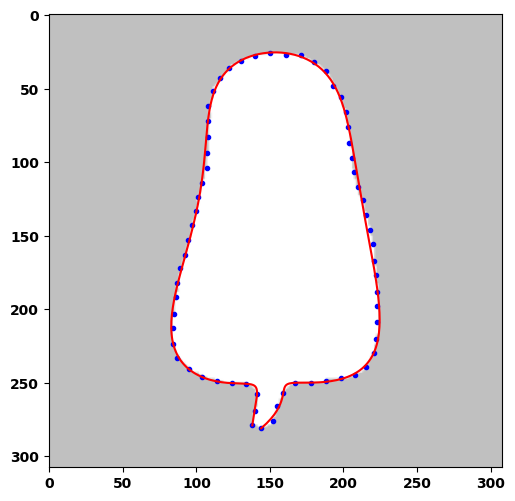

In [77]:
%%time
checkTo(6,N=11,mode=1,err_th=1.0)

みてみて

...
CP 5.0, steps:2, etime: 8.81250 err: 4.4061264930
................
CP 2.0, steps:18, etime: 28.39062 err: 1.9945074769
......................................
CP 1.0, steps:56, etime: 74.78125 err: 0.9900732050
...........................................
............................................................................
CP 0.65, steps:175, etime: 220.51562 err: 0.6498159557
........................
....................................................................................................
....................................................................................................
....................................................................................................
....................................^^................................^^..^........................^
^^.^^^^..^^^.^..^.^^^^^^.^^^^^.............................^^^....^.^...............................
..............^^^^..^...................................^^^.^..^..............^.

(0.5762624933097389,
 3691.734375,
 3001,
 [[138.0, 279.0],
  [170.32751366993523, 123.67235671213548],
  [24.903764443559776, 689.1894884917484],
  [-714.1182327715816, -759.3041960982437],
  [2995.140802529507, 1321.0248850384503],
  [-5029.311317705375, -2061.2606933402826],
  [5867.362904857776, 2735.225326214139],
  [-3979.564123103303, -2612.212897297831],
  [2254.523160824045, 1540.9261826172549],
  [-290.7583797252373, -41.91295160259624],
  [232.7262826477009, 249.1613537483908],
  [144.0, 281.0]])

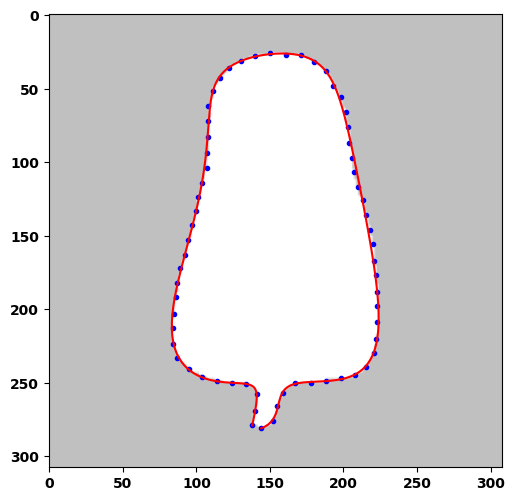

In [81]:
%%time
checkTo(6,N=11,mode=1,err_th=0.5)

.
CP 5.0, steps:0, etime: 7.00000 err: 3.4418080953
...........
CP 2.0, steps:11, etime: 23.43750 err: 1.9582550498
...........................
CP 1.0, steps:38, etime: 63.46875 err: 0.9822329371
...........................
CP 0.65, steps:65, etime: 103.54688 err: 0.6450529537
..................................
.............E

Matrix([[144.0*t**12 + 213.119945745099*t**11*(12 - 12*t) - 5763.86999066485*t**10*(1 - t)**2 + 261758.193121319*t**9*(1 - t)**3 - 381588.526321133*t**8*(1 - t)**4 - 419043.542954778*t**7*(1 - t)**5 + 3574431.9788191*t**6*(1 - t)**6 - 4172686.84924937*t**5*(1 - t)**7 + 2155607.19240755*t**4*(1 - t)**8 - 401219.077144628*t**3*(1 - t)**9 + 29189.1327584491*t**2*(1 - t)**10 + 1558.3977703254*t*(1 - t)**11 + 138.0*(1 - t)**12], [281.0*t**12 + 269.388097561614*t**11*(12 - 12*t) - 13890.4246099679*t**10*(1 - t)**2 + 501262.610469898*t**9*(1 - t)**3 - 2360823.88835829*t**8*(1 - t)**4 + 5927560.71142612*t**7*(1 - t)**5 - 7973217.65935526*t**6*(1 - t)**6 + 5796447.7409908

(0.49940483207548253,
 173.265625,
 113,
 [[138.0, 279.0],
  [129.86648086045022, 236.46971570267974],
  [442.25958724922805, -15.805318347339274],
  [-1823.7230779301271, 1798.302056380721],
  [4354.76200486374, -4391.275929222652],
  [-5268.544001577486, 7318.747147715739],
  [3868.43287750985, -8629.023440860668],
  [-529.0953825186587, 7484.293827558231],
  [-770.8859117598643, -4769.341188602608],
  [1189.809968733266, 2278.466411226807],
  [-87.33136349492199, -210.4609789389077],
  [213.11994574509902, 269.3880975616141],
  [144.0, 281.0]])

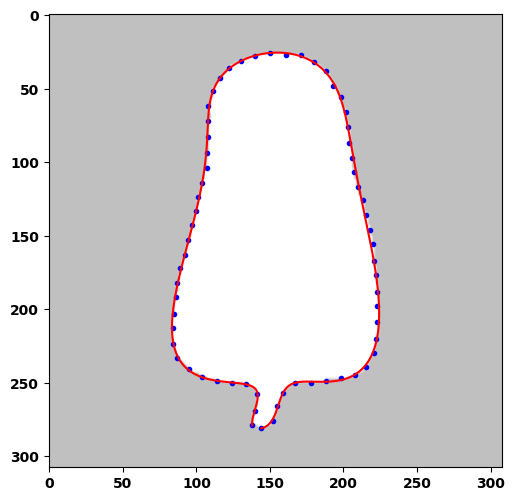

In [83]:
%%time
checkTo(6,N=12,mode=1,err_th=0.5)

....
CP 5.0, steps:3, etime: 3.21875 err: 4.6957193336
....
CP 2.0, steps:7, etime: 4.70312 err: 1.7093422002
.......................................................................
CP 1.0, steps:78, etime: 31.14062 err: 0.9993859193
.....................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.....................................

(0.6492343467126719,
 1121.25,
 3001,
 [[168.0, 279.0],
  [165.78131965733752, 168.99072442813198],
  [256.29295474976783, 483.3022590155715],
  [183.04424557133532, -688.329456313552],
  [61.39035183201265, 373.2529182834075],
  [99.9122457593166, 154.3233625758017],
  [161.0, 281.0]])

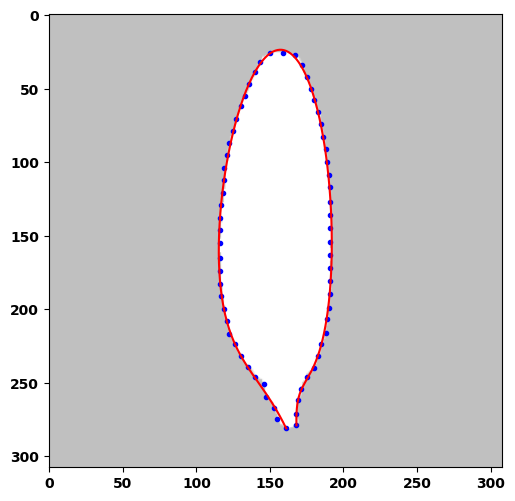

In [78]:
%%time
checkTo(7,N=6,mode=1,err_th=0.5)

....
CP 5.0, steps:3, etime: 3.28125 err: 4.6957193336
....
CP 2.0, steps:7, etime: 4.79688 err: 1.7093422002
.......................................................................
CP 1.0, steps:78, etime: 31.57812 err: 0.9993859193
.....................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.....................................

(0.6492343467126719,
 1115.109375,
 3001,
 [[168.0, 279.0],
  [165.78131965733752, 168.99072442813198],
  [256.29295474976783, 483.3022590155715],
  [183.04424557133532, -688.329456313552],
  [61.39035183201265, 373.2529182834075],
  [99.9122457593166, 154.3233625758017],
  [161.0, 281.0]])

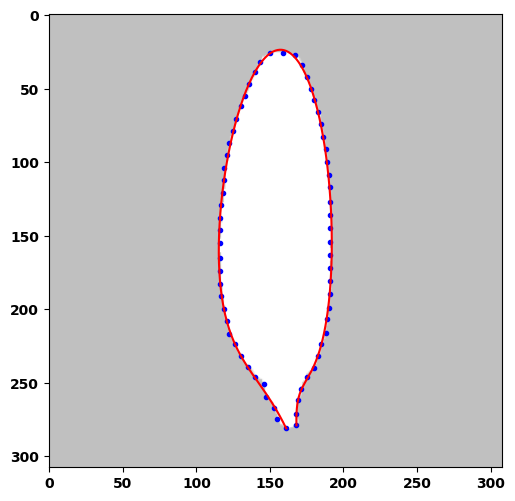

In [79]:
%%time
checkTo(7,N=6,mode=1,err_th=0.5)

.............
CP 5.0, steps:12, etime: 11.56250 err: 4.8822365788
..............................
CP 2.0, steps:42, etime: 31.45312 err: 1.9940481540
.........................................................
....................................................................................................
.........^^.^^....................................................................^^^.^.^...........
...^^......^..^....^....^....^^^^.^^^^..^.........................^^^^^^^.^^^^^^...^^^^...^^^.^^...^
.^.^........^^^^^^^^^^^.^.....^.^......^^^^^..^..........^.^^^^^^^.^..^.^^^^^^^^^^^^..^.^^..........
.^^^..^.^...^^^^^^^^.^^.^......^.^^.^.^^.^...^..^^^.^^^^^^.^^..^.^................^^^^^^^^.^^^^^^^^.
^..^^..^^^...^^^^.^^^^^^^^^^.^.^.^^^^^.^.^^.^^.^^.^^.......^^.......^^^^^^^.^^^^.^^.........^.......
....^..^^^^^^^^..^^^^.^^..^^^^^^..^^^^^....^^^^^.^.^.^.^.^.^^.^^.^^^^^^....^..^.^.^^^^^.^^^^^^.^..^.
...^^^..^........^^^^.^^^^^.^^^.^..^.^^^..^.^..^..^^....^^^^^^^^^.^.^.^.^^.^.^^^.^^^^.

(0.4999198717289141,
 1912.546875,
 2903,
 [[166.0, 279.0],
  [130.73079610634517, 17.51004860848656],
  [342.442529290611, 855.1199072508387],
  [-207.60222433003102, -1537.2992724364767],
  [828.133521208412, 2092.051820369389],
  [-456.99926102374735, -2011.0409180211605],
  [373.795946285984, 1241.3983679046994],
  [79.50382229816242, -25.388833146917012],
  [159.0, 280.0]])

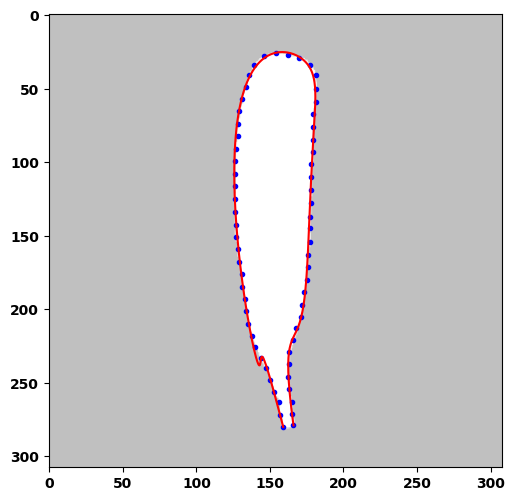

In [85]:
%%time
checkTo(8,N=8,mode=1,err_th=0.5)

....
CP 5.0, steps:3, etime: 7.28125 err: 4.1556517777
..................................
CP 2.0, steps:37, etime: 35.14062 err: 1.9755310710
..............................................................
....................................................................................................
....................
CP 1.0, steps:219, etime: 184.89062 err: 0.9979349639
................................................................................
...............................................................................
CP 0.65, steps:378, etime: 317.67188 err: 0.6483292032
.....................
............................................................................E

Matrix([[159.0*t**9 + 122.627471532918*t**8*(9 - 9*t) + 5447.45281610528*t**7*(1 - t)**2 + 14354.8523535528*t**6*(1 - t)**3 - 24611.4940911545*t**5*(1 - t)**4 + 85236.9931122839*t**4*(1 - t)**5 - 12575.5531725101*t**3*(1 - t)**6 + 11753.7537018244*t**2*(1 - t)**7 + 1184.61704264367*t*(1 - t)**8 + 166.

(0.4995307947155652,
 399.796875,
 476,
 [[166.0, 279.0],
  [131.62411584929708, 7.417223655678159],
  [326.4931583840106, 889.5980006744095],
  [-149.70896633940652, -1418.358506733653],
  [676.4840723197136, 1636.8187957398704],
  [-195.32931818376582, -1146.7230315232116],
  [170.89109944705717, 263.2842020616417],
  [151.31813378070237, 401.09012248925717],
  [122.62747153291777, 123.80197987501148],
  [159.0, 280.0]])

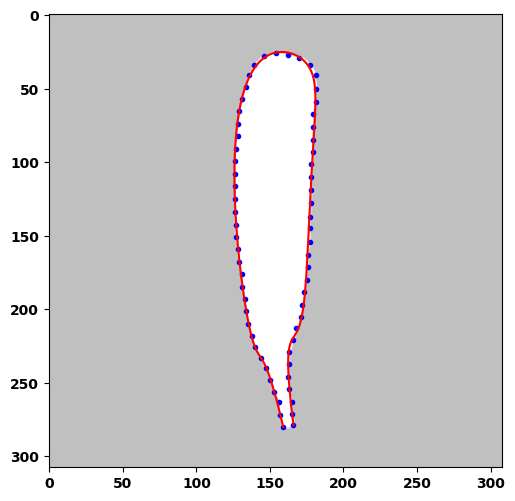

In [82]:
%%time
checkTo(8,N=9,mode=1,err_th=0.5)

ここから追加実験


....
CP 5.0, steps:3, etime: 10.28125 err: 4.8951966090
................................................................
CP 2.0, steps:67, etime: 90.23438 err: 1.9889341418
................................
...............................................................
CP 1.0, steps:162, etime: 209.40625 err: 0.9929871214
.....................................
.........................
CP 0.65, steps:224, etime: 286.50000 err: 0.6482418573
...........................................................................
...........E

Matrix([[154.0*t**11 + 200.114050889091*t**10*(11 - 11*t) + 1976.10795065658*t**9*(1 - t)**2 + 112310.963701312*t**8*(1 - t)**3 - 27514.9621451407*t**7*(1 - t)**4 + 222742.704650126*t**6*(1 - t)**5 - 182110.196715239*t**5*(1 - t)**6 + 275623.474932613*t**4*(1 - t)**7 - 117434.846573268*t**3*(1 - t)**8 + 21014.0003990421*t**2*(1 - t)**9 + 1313.7288971885*t*(1 - t)**10 + 147.0*(1 - t)**11], [280.0*t**11 + 238.035965322582*t**10*(11 - 11*t) - 17558.2034811569*t**9*(

(0.4999309152773913,
 393.984375,
 311,
 [[147.0, 280.0],
  [119.42989974440933, 233.86680697066916],
  [382.07273452803815, -459.44153645564023],
  [-711.7263428682933, 1986.99065307412],
  [835.22265131095, -2959.849574152669],
  [-394.1779149680506, 2311.9689988928626],
  [482.1270663422641, -275.83516275117626],
  [-83.37867316709305, -1240.7025932843183],
  [680.6725072806788, 1279.8457321978294],
  [35.92923546648328, -319.2400632937626],
  [200.11405088909095, 238.03596532258248],
  [154.0, 280.0]])

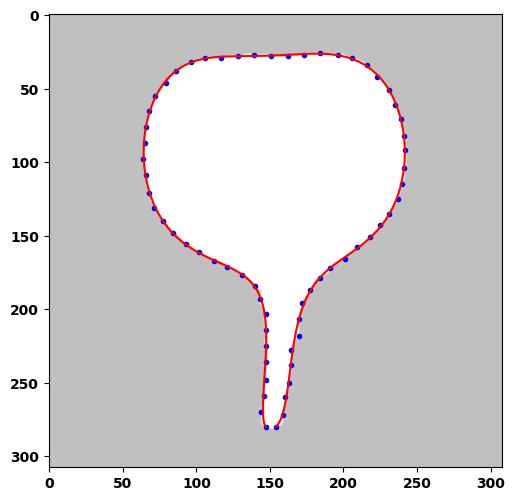

In [92]:
%%time
checkTo(1,N=11,mode=0,err_th=0.5)

.....
CP 5.0, steps:4, etime: 10.35938 err: 4.7634964544
......................................................................
CP 2.0, steps:74, etime: 83.03125 err: 1.9936764963
.........................
.............................................................
CP 1.0, steps:160, etime: 172.92188 err: 0.9929970403
.......................................
.......................
CP 0.65, steps:222, etime: 237.29688 err: 0.6487010214
.............................................................................
.......................................E

Matrix([[154.0*t**10 + 200.829643512917*t**9*(10 - 10*t) + 1520.07575514224*t**8*(1 - t)**2 + 92771.3257423372*t**7*(1 - t)**3 - 10197.7699343697*t**6*(1 - t)**4 - 62475.1918127806*t**5*(1 - t)**5 + 207396.873967659*t**4*(1 - t)**6 - 99068.2526073182*t**3*(1 - t)**7 + 17521.4681433626*t**2*(1 - t)**8 + 1206.39202151629*t*(1 - t)**9 + 147.0*(1 - t)**10], [280.0*t**10 + 247.950916823025*t**9*(10 - 10*t) - 26035.0984384929*t**8*(1 - t)**2

(0.499847731847188,
 358.28125,
 339,
 [[147.0, 280.0],
  [120.63920215162898, 222.85348956176406],
  [389.365958741391, -526.631447480118],
  [-825.5687717276516, 2535.961327552409],
  [987.6041617507569, -4906.18597677003],
  [-247.9174278284943, 6044.764412587479],
  [-48.56080921128426, -4901.074505862398],
  [773.0943811861434, 2541.643136289231],
  [33.77946122538312, -578.5577430776204],
  [200.8296435129171, 247.95091682302507],
  [154.0, 280.0]])

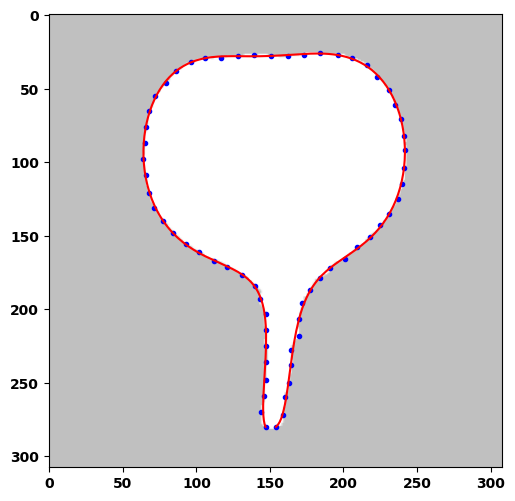

In [86]:
%%time
checkTo(1,N=10,mode=1,err_th=0.5)

....
CP 5.0, steps:3, etime: 10.34375 err: 4.8951966090
................................................................
CP 2.0, steps:67, etime: 89.34375 err: 1.9889341418
................................
...............................................................
CP 1.0, steps:162, etime: 208.46875 err: 0.9929871214
.....................................
.........................
CP 0.65, steps:224, etime: 285.90625 err: 0.6482418573
...........................................................................
...........E

Matrix([[154.0*t**11 + 200.114050889091*t**10*(11 - 11*t) + 1976.10795065658*t**9*(1 - t)**2 + 112310.963701312*t**8*(1 - t)**3 - 27514.9621451407*t**7*(1 - t)**4 + 222742.704650126*t**6*(1 - t)**5 - 182110.196715239*t**5*(1 - t)**6 + 275623.474932613*t**4*(1 - t)**7 - 117434.846573268*t**3*(1 - t)**8 + 21014.0003990421*t**2*(1 - t)**9 + 1313.7288971885*t*(1 - t)**10 + 147.0*(1 - t)**11], [280.0*t**11 + 238.035965322582*t**10*(11 - 11*t) - 17558.2034811569*t**9*(

(0.4999309152773913,
 393.34375,
 311,
 [[147.0, 280.0],
  [119.42989974440933, 233.86680697066916],
  [382.07273452803815, -459.44153645564023],
  [-711.7263428682933, 1986.99065307412],
  [835.22265131095, -2959.849574152669],
  [-394.1779149680506, 2311.9689988928626],
  [482.1270663422641, -275.83516275117626],
  [-83.37867316709305, -1240.7025932843183],
  [680.6725072806788, 1279.8457321978294],
  [35.92923546648328, -319.2400632937626],
  [200.11405088909095, 238.03596532258248],
  [154.0, 280.0]])

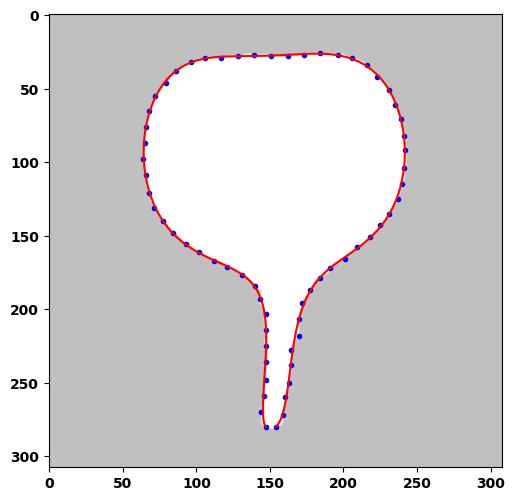

In [87]:
%%time
checkTo(1,N=11,mode=1,err_th=0.5)

^^^^^^^^.^^..^...
CP 5.0, steps:16, etime: 7.06250 err: 4.9811107331
.^.^..^.....^.^....................................................................
....................................................................................................
...............................
CP 2.0, steps:230, etime: 45.29688 err: 1.9981937965
............................................^^^^^^^^^^^^^^^^^^^^^^^^.
............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^..^.................^^^^^^^^^^^^^^^^.^.^^^^^^^^^^^^^^^^^^............................
..^^^^^^^^^^^^^^^^^^^^^^^^^^^^......^^^^^^^^^^^^^.^.^.^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^...............
.......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^..^........................................^^^^^^
^^^^^^^^^^..^........................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..........^.^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.6746863144808077,
 547.109375,
 3001,
 [[171.0, 277.0],
  [177.30486, 230.6618],
  [87.38998, 45.322834],
  [55.076313, 134.3514],
  [819.9756, -135.31404],
  [-689.5201, 54.793484],
  [763.68066, 91.18275],
  [-130.93294, -43.098175],
  [131.3219, 203.78642],
  [167.0, 281.0]])

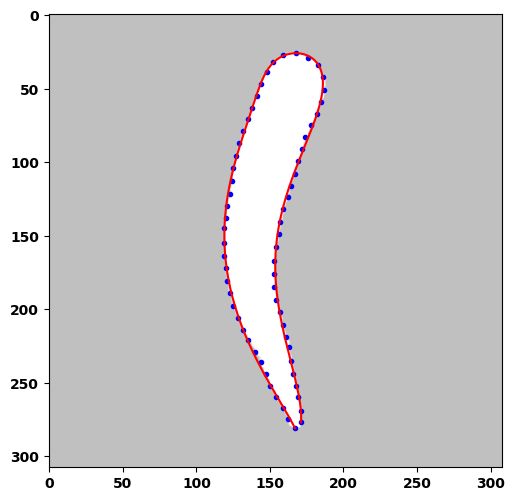

In [89]:
%%time
checkTo(2,N=9,mode=0,err_th=0.5)

^^^^^.^.^^^^.^.^.^..^..^............................................................................
..................................................................................^^^^.^^^^.^.^.....
................
CP 5.0, steps:215, etime: 35.31250 err: 4.9991103757
................................^^^^^^^^.^.^........................................
................^^^^^^^^^^.^.^.^.^.^...^...^..........^.^.^.^.^.^.^.^.^^^^.^.^.^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^^^^^^.^.^^^^^^.^^^^^^.^^^^^^.
CP 2.0, steps:460, etime: 72.28125 err: 1.9778931454
^^^^^^.^^^^^^.^^^^.^^^^.^^^^.^^^^^^^^^^
^^^^.^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^.^^^^.^^^^.^^^^.^^^^.^^
^^.^^^^.^^^^^^^^^^^^^^^^^.^^^^.^^^^^^^.^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^.^^^
^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^.^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.522773461923645,
 458.4375,
 3001,
 [[161.0, 279.0],
  [172.65817, -79.119514],
  [243.55157, 4.2323136],
  [154.83247, 336.11636],
  [46.754883, -697.70447],
  [77.706635, 817.23175],
  [254.76718, -136.81796],
  [41.503387, -53.50746],
  [154.0, 280.0]])

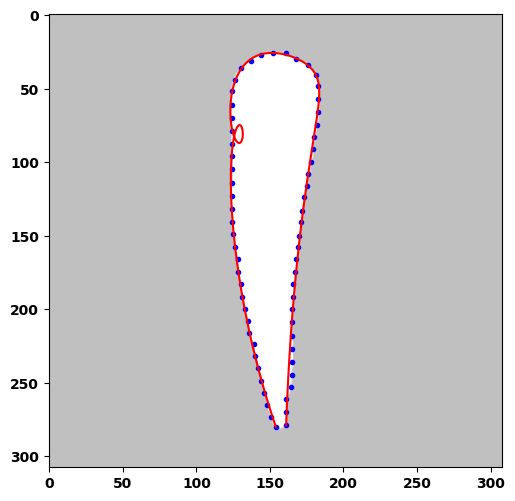

In [91]:
%%time
checkTo(3,N=8,mode=0,err_th=0.5)

^^^^^^^^^.^.^..^.^..^.^^.^^.^.......................................................................
.......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^....
....^^^^^^^^^^^^^^^^^^^^^^^^^^^....^^^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.......^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^...^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..
..^^^^^^^^^^^^^^^^^^^^^^^^^.......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^............................
.........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...
CP 5.0, steps:678, etime: 124.29688 err: 4.9594783058
.......^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^.....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...................................^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^............................
...^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(1.3698346130826857,
 550.234375,
 3001,
 [[147.0, 280.0],
  [162.95998, -111.60868],
  [26.973272, 816.311],
  [-329.30414, -893.217],
  [858.28186, 306.6811],
  [-546.95874, 670.2316],
  [691.83844, -1119.7736],
  [157.94621, 901.3547],
  [236.42856, -149.58803],
  [154.0, 280.0]])

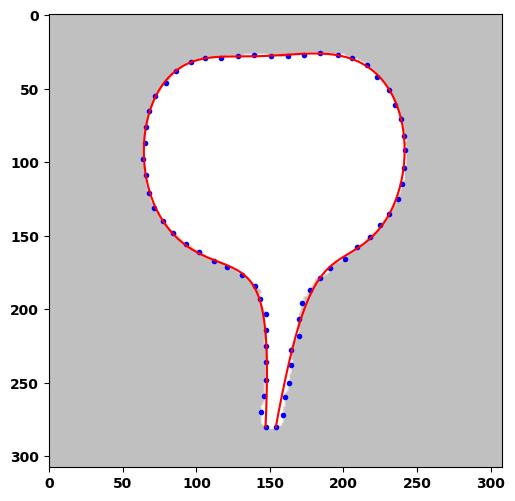

In [93]:
%%time
checkTo(1,N=9,mode=0,err_th=1.0)

^^^^^^^^^^.^..^...^......^.......................................^^^^^........................^^^^^^
^^...
CP 5.0, steps:104, etime: 26.18750 err: 4.9986710959
...^^^^^^^^^^^^^....^^^^^^^^.^..................^^^^^^^.^^^^^^^^^^.^^.^^^^^^^.............^.^^^
^^^^^^^^^^^............................^^^^^^^^^^^^.^^.^.............................^.^^^^^^^^^^^^^
^^.^......^.................................^.^^^^^^^^^^^^^^.^^^^^^^^^....^^^^^^^^^....^^^^^^^^^....
^^^^^^^^^.^^^^^^^^^^^^^.^.^^^^^^^^...^^^^^^^^^.....^^^^^^^^^.....^^^^^^^^^^^^^^^^^^^^^^^^..^^^^^^^^.
.....^^^^^^.................
CP 2.0, steps:527, etime: 111.68750 err: 1.9859379724
.......^.^.^^^^^^^^^^^^^^^^^^.^.^^^^^^^^^^....^^^^......................
.^^^^^^^...^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.
.............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.9984070454059517,
 376.84375,
 1844,
 [[147.0, 280.0],
  [143.2081, 4.434768],
  [225.25792, 308.42828],
  [-573.2683, 538.91504],
  [765.5218, -1794.7244],
  [-54.889957, 2487.4954],
  [-141.5396, -1816.4553],
  [765.55054, 563.514],
  [43.18754, 290.37616],
  [225.19661, 3.6649387],
  [154.0, 280.0]])

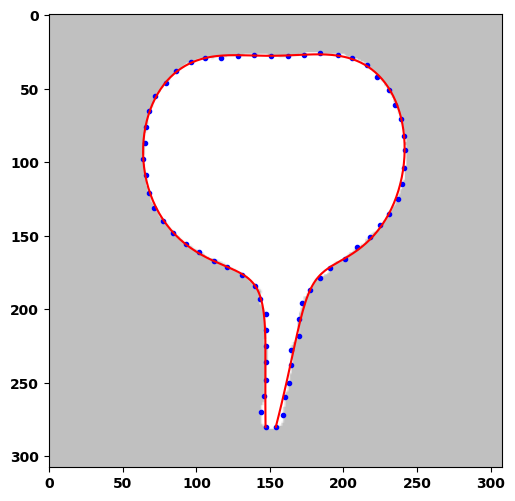

In [94]:
%%time
checkTo(1,N=10,mode=0,err_th=1.0)

^^^^^^^^^.^.^^......^..^.........
CP 5.0, steps:32, etime: 8.39062 err: 4.9993600382
...................................................................
....................................................................................................
..........................
CP 2.0, steps:225, etime: 39.09375 err: 1.9984768605
..........................................................................
....................................................................................................
....................................................................................................
.....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^.^^.^^^.^^....^.^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^..^....................................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^.......................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^.^........^.........................................^^^^^^^^^^^^^^^^^^^^^^^^^^

(1.1580868194021305,
 319.6875,
 1988,
 [[171.0, 277.0],
  [75.17177, -77.889206],
  [422.33847, 90.54141],
  [-36.396904, 131.45482],
  [335.44144, -351.11136],
  [-143.68045, 498.42154],
  [453.23242, -179.08324],
  [-35.26522, 7.7697597],
  [167.0, 281.0]])

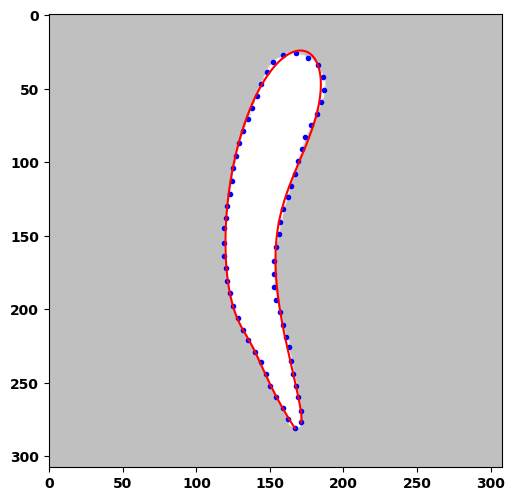

In [95]:
%%time
checkTo(2,N=8,mode=0,err_th=1.0)

^^^^^^^^^^^^.^.^..^.
CP 5.0, steps:19, etime: 8.96875 err: 4.4478792297
^..^..^.........................................................................
............................................................................................
CP 2.0, steps:191, etime: 43.56250 err: 1.9992367909
........
....................................................................................................
.......................................^^^^^^^^^^^^^^^....^.^.^.^^.^.^^.^.^^.^.^^.^.^^.^.^^.^.^^.^..
^..^.^^^^^^^^^^^^^^^^.^.^^.^..^..^..^......................................^^^^^^^^^^^^^^^^^^^^^^^..
..^......................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.......^^^^^^^^^^^^^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^........^.^.^........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^.^^^^.^.^^^^^^.^.^^^^^^^^.^.^.^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.E

Matrix([[167.0*t**10 + 78.6883*t**9*(10 - 10*t) + 

(0.9988260705492555,
 171.59375,
 833,
 [[171.0, 277.0],
  [165.59576, 207.32137],
  [187.6683, 341.84702],
  [-199.61081, -778.3681],
  [1029.5824, 1790.6161],
  [-567.82654, -2460.402],
  [422.55426, 1939.4509],
  [46.042763, -604.6042],
  [141.16508, 312.596],
  [78.6883, 116.04671],
  [167.0, 281.0]])

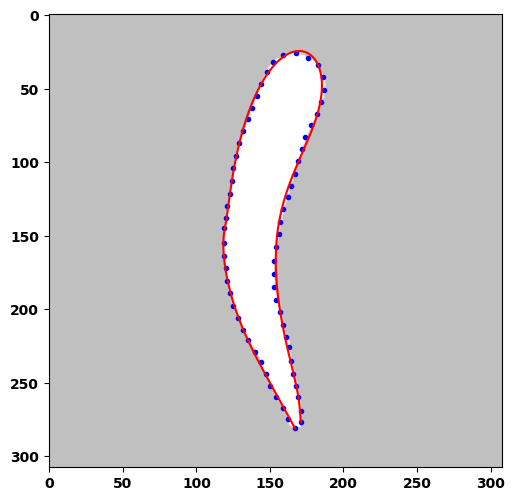

In [96]:
%%time
checkTo(2,N=10,mode=0,err_th=1.0)

^^^.^.^.^.^..^.^....^...............................................................................
........^^^^.^^..^..................................................................^^^.^.^.........
.............................................................^^^^.^.^.^.^..........................
CP 5.0, steps:298, etime: 34.21875 err: 4.9934850193
.
.................................^^^^^^^^^.^....^...................................................
................^^^^^^^^^^^^^^^.^^^^.^.^^^^^^^^^^^^^^^^^^.^.^.^^.^.^^^^.^.^^.^.^..^.^..^.^..........
.......^^^^^^^^^^^^.^.^................................^^^^^.....
CP 2.0, steps:564, etime: 62.79688 err: 1.9883798219
......................^^^^^^^^^^^^^
^.^............................................................................................^^^^^
^^^^^^^^^^^^.^.^..^...........................................................^^^^^^^^^^^^^^^^^^.^..
^.^...............E

Matrix([[154.0*t**6 + 152.407*t**5*(6 - 6*t) + 147.698*t**4*(1 

(0.9989398958314105,
 92.484375,
 818,
 [[161.0, 279.0],
  [178.80473, -80.01568],
  [205.39734, 95.678],
  [227.62482, 120.443726],
  [9.846508, -278.02258],
  [152.40651, 313.1805],
  [154.0, 280.0]])

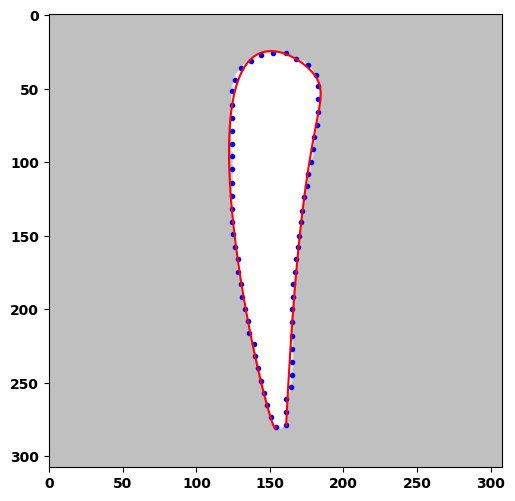

In [97]:
%%time
checkTo(3,N=6,mode=0,err_th=1.0)

^^^^^.^.^^^^.^.^.^..^..^............................................................................
..................................................................................^^^^.^^^^.^.^.....
................
CP 5.0, steps:215, etime: 37.93750 err: 4.9991103757
................................^^^^^^^^.^.^........................................
................^^^^^^^^^^.^.^.^.^.^...^...^..........^.^.^.^.^.^.^.^.^^^^.^.^.^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^^^^^^.^.^^^^^^.^^^^^^.^^^^^^.
CP 2.0, steps:460, etime: 76.65625 err: 1.9778931454
^^^^^^.^^^^^^.^^^^.^^^^.^^^^.^^^^^^^^^^
^^^^.^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^.^^^^.^^^^.^^^^.^^^^.^^
^^.^^^^.^^^^^^^^^^^^^^^^^.^^^^.^^^^^^^.^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^.^^^
^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^.^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.9787835774785014,
 145.59375,
 895,
 [[161.0, 279.0],
  [167.78107, 351.23944],
  [137.85727, -583.7622],
  [378.36826, 852.215],
  [-48.91506, -727.10645],
  [225.5919, 420.60352],
  [10.986565, -170.29582],
  [204.79881, 474.00876],
  [154.0, 280.0]])

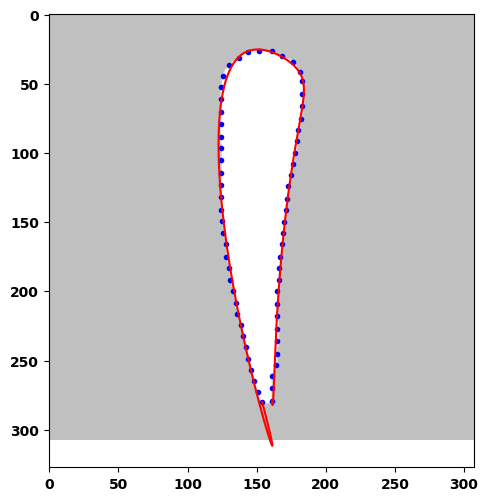

In [98]:
%%time
checkTo(3,N=8,mode=0,err_th=1.0)

^^^^^^^^^.^.^^.^.^..^.....................................
CP 5.0, steps:57, etime: 17.18750 err: 4.9609062964
..........................................
.......................^^^...^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^......
.^^^^^^^^^^^^^^....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.............................^^^^^^^^^^^^^^^^^^^...^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.....^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
.....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(2.1698232918974396,
 430.5,
 1987,
 [[148.0, 279.0],
  [187.21184, -59.76637],
  [-124.1758, 498.81796],
  [186.88525, -265.49695],
  [400.42673, 212.54327],
  [-625.5826, 341.66302],
  [499.53928, -320.7169],
  [295.01294, -275.8697],
  [233.4091, 650.8015],
  [180.5904, -111.61679],
  [154.0, 280.0]])

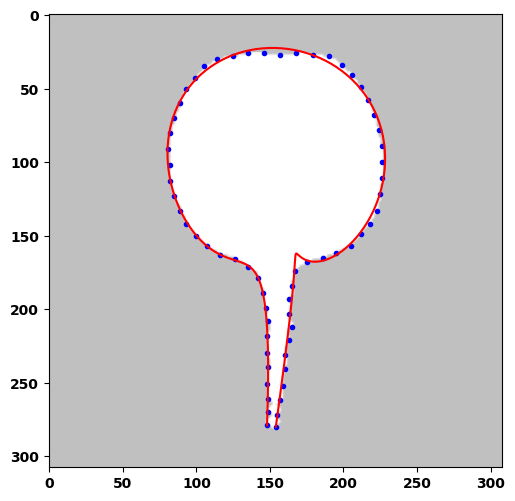

In [99]:
%%time
checkTo(4,N=10,mode=0,err_th=1.0)

^^^^^^^^^^^.^.^^..^.
CP 5.0, steps:19, etime: 10.48438 err: 4.5440350047
^^..^...........................................................................
.................................................................^^^^^^^^^^^^^^^^^^^^^^^^^^.........
.............^.^^^^^^^^^^^^^^^^^^^^^^..^....^....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^..^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^^.^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^..^^....^...^^^.^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^......
CP 2.0, steps:485, etime: 129.89062 err: 1.9833128556
..............
..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........
.......................^^^^^^^^^^^^^^^^^^^^^^^^^........
CP 1.0, steps:655, etime: 172.17188 err: 0.9941740118
.............................^^^^^^^^^^^^^^^
^^^^^^^^^^^^^............^^^^^^^^^^.^^.^^.........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.
CP 0.65, steps:798, etime: 207

(0.4959810483916819,
 297.359375,
 1153,
 [[148.0, 279.0],
  [168.30981, -116.536476],
  [-37.280556, 853.1576],
  [449.1799, -1415.1383],
  [-690.74133, 3522.9102],
  [673.7407, -6393.785],
  [446.1716, 8056.028],
  [-706.3503, -6874.3765],
  [964.2091, 3925.7498],
  [136.78896, -1415.7999],
  [90.399506, 786.7614],
  [203.38235, -83.67201],
  [154.0, 280.0]])

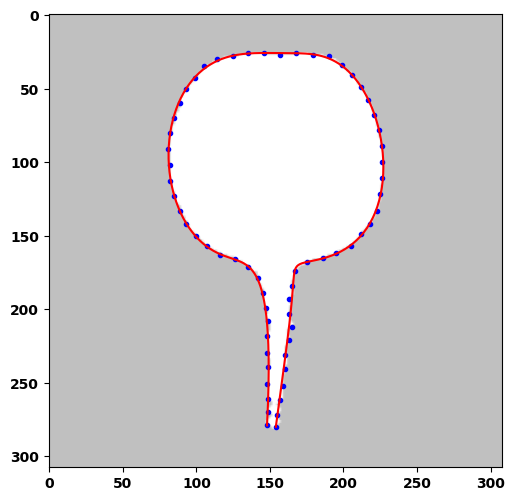

In [102]:
%%time
checkTo(4,N=12,mode=0,err_th=0.5)

^^^^^^^^^.^.^^.^.^..^.....................................
CP 5.0, steps:57, etime: 17.18750 err: 4.9609062964
..........................................
.......................^^^...^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^......
.^^^^^^^^^^^^^^....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.............................^^^^^^^^^^^^^^^^^^^...^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.....^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
.....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(1.6972790943329383,
 617.375,
 3001,
 [[148.0, 279.0],
  [164.71504, -48.880653],
  [67.26376, 514.6155],
  [-173.726, -251.18993],
  [672.5176, 125.82853],
  [-606.39777, 295.04172],
  [300.52356, -237.42595],
  [586.12024, -312.31104],
  [52.32667, 707.6664],
  [206.51736, -124.70491],
  [154.0, 280.0]])

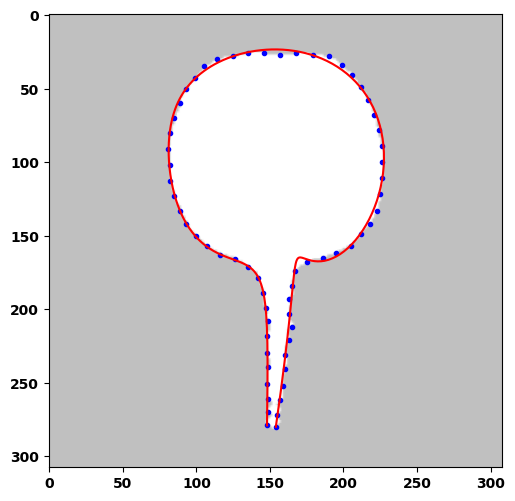

In [112]:
%%time
checkTo(4,N=10,mode=0,err_th=0.5,pat=2000)

^^^^^.^.^.^.^^.^.^^^^.^^.^..................^^^^^.^^^.^^.^^..................^^^^^.^^^.^^...........
.............^^^^^^^^^^^..^..............^^^.^........^^^^^^^^^^.^^.........^^^^^^^..............^^^
^^^^^^^^.^^^^.^^^.^.^.^........................^^^^^^^^^^^^^^^^^^^^^^...............................
....^^^^^^^^^^^^^^^^^^....................^^^^^^^^^^^^^^.^..^^^^^^^^^^^^^^^^^^^^....................
.....^^^^^^^^^^^^........^^^^^^^^^^^^..................................^^^^^^^^^^^^^^^^^^^^^^..^....
....................^^^^^^^^^^^^^^^^^^^^^.^^.......................^^^^^^^^^^^^^^^^^^^^^^^..........
......................^^^^^^^^^^^^^^^^^^^^^^^^^^^....................................^^^^^^^^^^^^^^^
^^^^^^^^^^^^^.......................................................^^^^^^^^^^...^..................
...............^^^^^^^......^^^^^^^^^^^^^.^^.^^......^..^...^..^.............^..^..................^
^^^^^^^^^^^^^^^^^.^^.
CP 5.0, steps:920, etime: 139.25000 err: 4.9447834987
^^.^^^^^^^^.^^.

(2.8799425417427384,
 455.03125,
 3001,
 [[150.0, 279.0],
  [120.52511, 143.78027],
  [-101.38737, 437.34735],
  [582.903, -643.10187],
  [-650.06213, 715.3239],
  [884.75354, -483.53336],
  [-160.70299, 225.50606],
  [355.5173, 42.24329],
  [156.0, 279.0]])

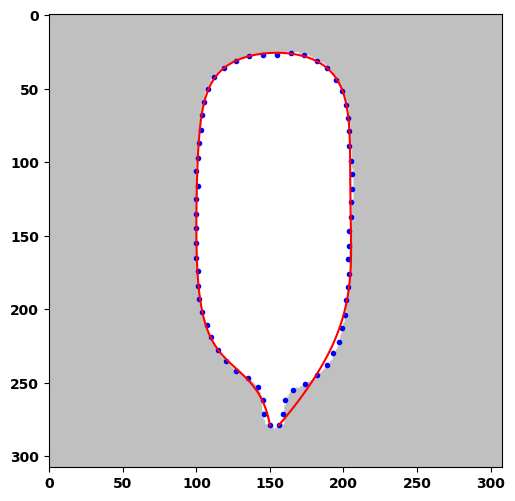

In [100]:
%%time
checkTo(5,N=8,mode=0,err_th=1.0)

^^^.^.^.^.^.
CP 5.0, steps:11, etime: 4.01562 err: 3.7434532931
^..^.
CP 2.0, steps:16, etime: 4.64062 err: 1.5104654656
^^.^^.^..^..^......................E

Matrix([[161.0*t**7 + 96.7355*t**6*(7 - 7*t) + 2463.56*t**5*(1 - t)**2 + 2227.21*t**4*(1 - t)**3 + 8213.51*t**3*(1 - t)**4 + 4381.33*t**2*(1 - t)**5 + 1321.46*t*(1 - t)**6 + 168.0*(1 - t)**7], [281.0*t**7 + 167.97*t**6*(7 - 7*t) + 5950.47*t**5*(1 - t)**2 - 1613.74*t**4*(1 - t)**3 - 11585.5*t**3*(1 - t)**4 + 7499.76*t**2*(1 - t)**5 + 1146.46*t*(1 - t)**6 + 279.0*(1 - t)**7]]) [[168.0, 279.0], [188.77962, 163.77979], [208.63464, 357.13165], [234.67174, -331.01526], [63.634495, -46.106968], [117.31247, 283.35577], [96.735535, 167.96977], [161.0, 281.0]]
Wall time: 9.14 s


(0.9969614963477328,
 9.078125,
 52,
 [[168.0, 279.0],
  [188.77962, 163.77979],
  [208.63464, 357.13165],
  [234.67174, -331.01526],
  [63.634495, -46.106968],
  [117.31247, 283.35577],
  [96.735535, 167.96977],
  [161.0, 281.0]])

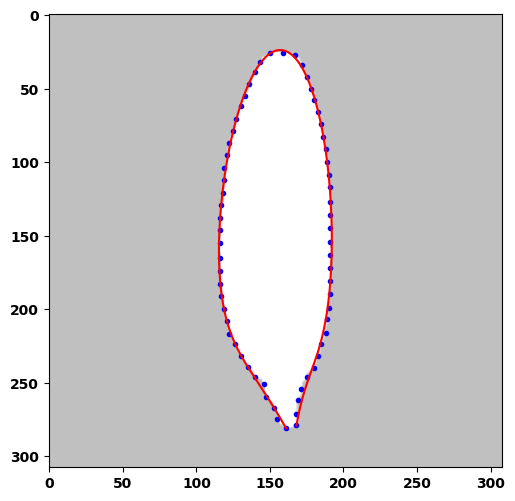

In [101]:
%%time
checkTo(7,N=7,mode=0,err_th=1.0)

^^^^^e1e1e1.^.^.^..^.^.^^.^..^.............................................................
CP 5.0, steps:84, etime: 21.89062 err: 4.9951479025
...............
....................................................................................................
................^^^^^^^^^^^^.^.^..........................................^^^^^^^^^^^^^^....^.......
............................................^^^^^^^^^^^^^...........................................
..........^^^^^^^^^^^^^....................................................^^^^^^^^^^^^^^^.^.^.^.^..
..^.^.^.^.^..............................^^^^^^^^^^^^.^..^.^.^.^....^.^.^.^.^...
CP 2.0, steps:579, etime: 123.56250 err: 1.9964290743
.^.^.^.^.^.^.^.^....
..^.^.^^^^^^^^^^^^^.^..^.^.^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^.^.^^
^^^^^^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^

(1.1425821542711367,
 639.65625,
 3001,
 [[138.0, 279.0],
  [206.61087, 103.74769],
  [-595.44037, 869.2075],
  [1611.2235, -1688.4375],
  [-1741.8445, 2571.917],
  [1344.367, -2847.8003],
  [-39.500195, 2542.8716],
  [-9.1200905, -1755.24],
  [382.70938, 947.48114],
  [238.12238, 77.78585],
  [144.0, 281.0]])

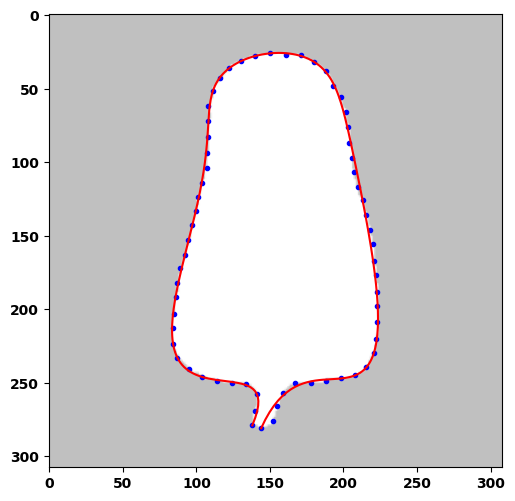

In [104]:
%%time
checkTo(6,N=10,mode=0,err_th=1.0)

.....
CP 5.0, steps:4, etime: 10.03125 err: 4.7634964544
......................................................................
CP 2.0, steps:74, etime: 81.43750 err: 1.9936764963
.........................
.............................................................E

Matrix([[154.0*t**10 + 190.133598764986*t**9*(10 - 10*t) + 5869.42433323198*t**8*(1 - t)**2 + 41153.4955589735*t**7*(1 - t)**3 + 148009.715366578*t**6*(1 - t)**4 - 203497.619761358*t**5*(1 - t)**5 + 230258.404337249*t**4*(1 - t)**6 - 93868.0149587133*t**3*(1 - t)**7 + 17137.9913327344*t**2*(1 - t)**8 + 1207.47965708481*t*(1 - t)**9 + 147.0*(1 - t)**10], [280.0*t**10 + 264.662530578593*t**9*(10 - 10*t) - 28934.7110122835*t**8*(1 - t)**2 + 321548.554594216*t**7*(1 - t)**3 - 1019258.66701359*t**6*(1 - t)**4 + 1459357.31073267*t**5*(1 - t)**5 - 993285.847229613*t**4*(1 - t)**6 + 307899.722884913*t**3*(1 - t)**7 - 25825.3579340842*t**2*(1 - t)**8 + 2406.36068018061*t*(1 - t)**9 + 280.0*(1 - t)**10]]) [[147.0, 280.0], [120.747

(0.9929970403088083,
 168.34375,
 161,
 [[147.0, 280.0],
  [120.74796570848137, 240.6360680180606],
  [380.84425183854273, -573.8968429796487],
  [-782.2334579892776, 2565.8310240409437],
  [1096.4685920821364, -4729.932605855302],
  [-807.5302371482442, 5791.100439415363],
  [704.8081684122767, -4853.612700064712],
  [342.94579632477894, 2679.571288285133],
  [130.43165184959963, -642.993578050744],
  [190.1335987649858, 264.6625305785928],
  [154.0, 280.0]])

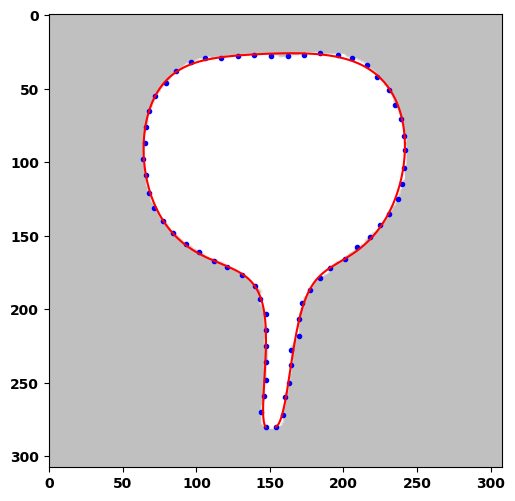

In [105]:
%%time
checkTo(1,N=10,mode=1,err_th=1.0)

.............................
CP 5.0, steps:28, etime: 17.00000 err: 4.9855177481
.......................................................................
...........................................
CP 2.0, steps:142, etime: 74.01562 err: 1.9894375272
.........................................................
....................................................................................................
...............................................E

Matrix([[154.0*t**7 + 136.136931975103*t**6*(7 - 7*t) + 3386.41469001459*t**5*(1 - t)**2 - 3045.83679640281*t**4*(1 - t)**3 + 14659.9187604207*t**3*(1 - t)**4 + 2388.85170532652*t**2*(1 - t)**5 + 1220.05385832812*t*(1 - t)**6 + 161.0*(1 - t)**7], [280.0*t**7 + 247.248666557387*t**6*(7 - 7*t) + 5687.09190757397*t**5*(1 - t)**2 - 20008.6096835133*t**4*(1 - t)**3 + 20734.1651344545*t**3*(1 - t)**4 - 7452.8325955316*t**2*(1 - t)**5 + 1881.20660949105*t*(1 - t)**6 + 279.0*(1 - t)**7]]) [[161.0, 279.0], [174.2934083325889, 268.7438013558642

(0.9987996798666631,
 175.265625,
 347,
 [[161.0, 279.0],
  [174.2934083325889, 268.7438013558642],
  [113.75484311078674, -354.8967902634096],
  [418.8548217263071, 592.4047181272718],
  [-87.02390846865163, -571.6745623860945],
  [161.25784238164704, 270.8139003606651],
  [136.13693197510278, 247.2486665573871],
  [154.0, 280.0]])

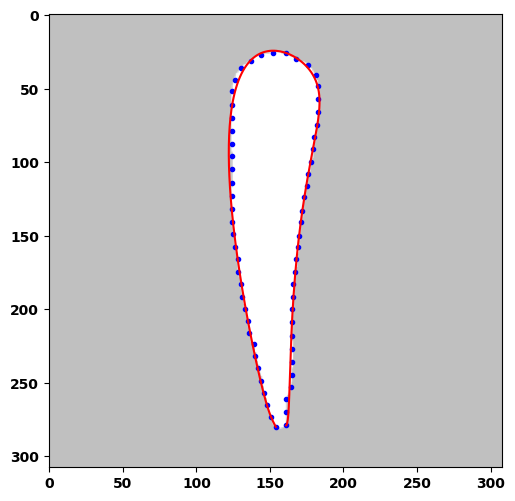

In [106]:
%%time
checkTo(3,N=7,mode=1,err_th=1.0)

.
CP 5.0, steps:0, etime: 6.78125 err: 3.4418080953
...........
CP 2.0, steps:11, etime: 22.76562 err: 1.9582550498
...........................E

Matrix([[144.0*t**12 + 218.110517476221*t**11*(12 - 12*t) - 7991.9506656938*t**10*(1 - t)**2 + 298204.96817081*t**9*(1 - t)**3 - 598569.026285126*t**8*(1 - t)**4 + 132665.21711826*t**7*(1 - t)**5 + 2957743.7455919*t**6*(1 - t)**6 - 3850393.99917961*t**5*(1 - t)**7 + 2075601.20575095*t**4*(1 - t)**8 - 395095.381724794*t**3*(1 - t)**9 + 29423.2872812516*t**2*(1 - t)**10 + 1545.81003197988*t*(1 - t)**11 + 138.0*(1 - t)**12], [281.0*t**12 + 265.647121051109*t**11*(12 - 12*t) - 15146.4175983773*t**10*(1 - t)**2 + 553549.978120056*t**9*(1 - t)**3 - 2858168.53061964*t**8*(1 - t)**4 + 7659968.23651847*t**7*(1 - t)**5 - 10407441.7268737*t**6*(1 - t)**6 + 7252656.09879982*t**5*(1 - t)**7 - 2514715.05839904*t**4*(1 - t)**8 + 425666.986497965*t**3*(1 - t)**9 - 1431.68664325484*t**2*(1 - t)**10 + 2801.26870286318*t*(1 - t)**11 + 279.0*(1 - t)**12]]) [[138

(0.9822329371486682,
 61.984375,
 39,
 [[138.0, 279.0],
  [128.81750266498975, 233.43905857193147],
  [445.8073830492666, -21.69222186749759],
  [-1795.8880987490618, 1934.8499386271121],
  [4193.133748991815, -5080.232441210183],
  [-4861.608584822738, 9157.394064141186],
  [3201.0213696881992, -11263.465072374103],
  [167.5065872705301, 9671.677066311195],
  [-1209.2303561315675, -5774.077839635643],
  [1355.4771280491348, 2516.136264182074],
  [-121.09016160142117, -229.4911757329892],
  [218.11051747622147, 265.6471210511085],
  [144.0, 281.0]])

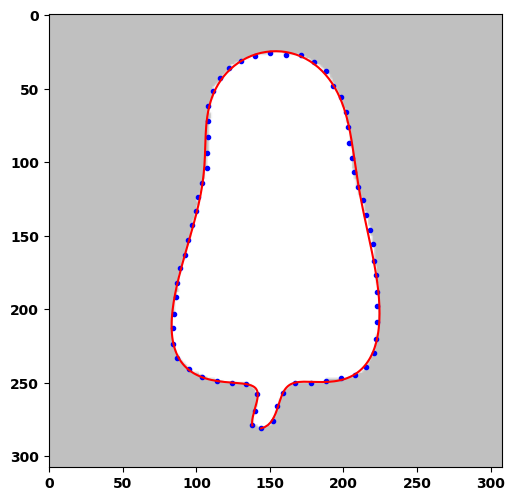

In [107]:
%%time
checkTo(6,N=12,mode=1,err_th=1.0)

^^^^^^^^^^^.^.^.^.^..^.^............................
CP 5.0, steps:51, etime: 18.56250 err: 4.9947664125
................................................
....................................................................................................
.....................................................^^^^^^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^.................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^.................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^..............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..........^^^^.....................^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

(0.7246972139427261,
 687.71875,
 3001,
 [[148.0, 279.0],
  [181.87805, -130.32057],
  [-145.81781, 801.627],
  [460.60776, -748.6439],
  [-1175.018, -206.78265],
  [3154.54, 1151.9335],
  [-2934.0266, -776.44086],
  [1982.134, -7.7912874],
  [-137.90735, 258.29663],
  [157.88605, 317.18433],
  [191.93515, -9.713597],
  [154.0, 280.0]])

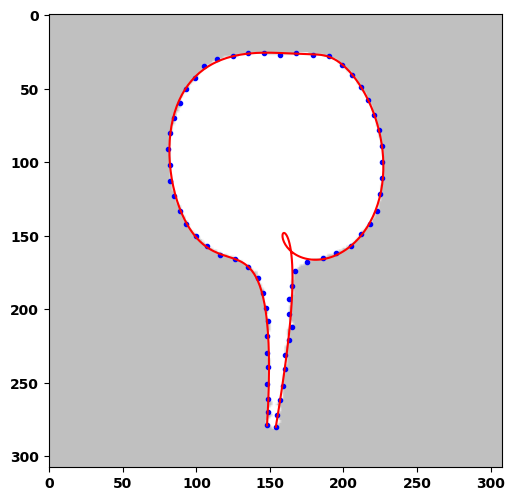

In [108]:
%%time
checkTo(4,mode=0,N=11,err_th=0.5)

.........
CP 5.0, steps:8, etime: 16.42188 err: 4.8355238879
.............................................
CP 2.0, steps:53, etime: 72.62500 err: 1.9980713601
..............................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.........................
CP 1.0, steps:524, etime: 663.79688 err: 0.9988864465
...........................................................................
...........................................................
CP 0.65, steps:658, etime: 832.26562 err: 0.6496506150
.........................................
............................^^..........E

Matrix([[154.0*t**11 + 162.0514912

(0.49994719220838113,
 933.84375,
 740,
 [[148.0, 279.0],
  [152.52431531445464, 247.2482172028023],
  [147.13962597116273, -760.9490723195354],
  [130.85321220587025, 3220.7947781473204],
  [-862.7018470093444, -5884.614531197011],
  [2180.780597381845, 6895.202785141637],
  [-2223.768873156401, -5228.830570803889],
  [2089.2215654828556, 2211.538400696796],
  [-485.6446943754075, 15.252434318933933],
  [285.46557482418643, -43.11373483002081],
  [162.05149129016047, 207.35090727762426],
  [154.0, 280.0]])

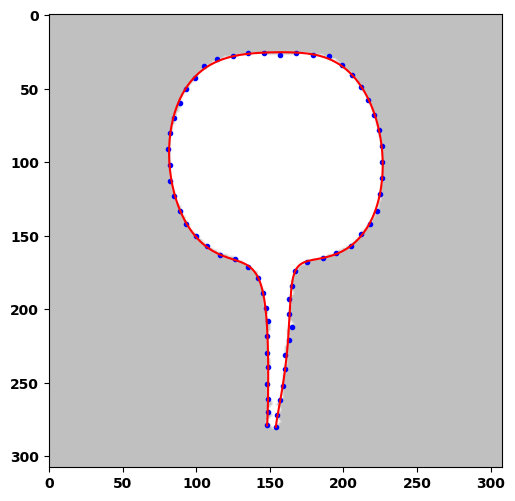

In [109]:
%%time
checkTo(4,mode=1,N=11,err_th=0.5)

.............................
CP 5.0, steps:28, etime: 16.76562 err: 4.9855177481
.......................................................................
...........................................
CP 2.0, steps:142, etime: 74.53125 err: 1.9894375272
.........................................................
....................................................................................................
...............................................
CP 1.0, steps:346, etime: 175.98438 err: 0.9987996799
.....................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......^..........................................................^^..^.............................
............^^^.........^.....

(0.842559087890097,
 548.34375,
 1095,
 [[161.0, 279.0],
  [169.86423478532933, 247.00259183316027],
  [144.77807401559448, -397.01371343565245],
  [366.38397330279633, 651.6072560859939],
  [-46.499370203266984, -596.7344102122743],
  [144.804215345271, 266.24458246604024],
  [138.37320236037166, 246.21930639610514],
  [154.0, 280.0]])

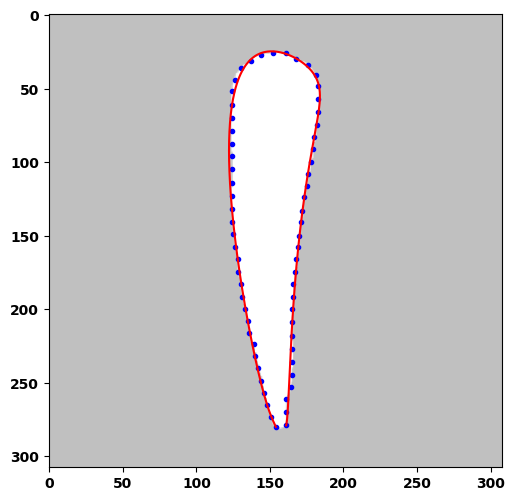

In [113]:
%%time
checkTo(3,mode=1,N=7,err_th=0.5)

# 次数別近似結果　rb6

..e1e1.e1e1e1.e1e1e1.e1e1e1.e1e1e1.e1e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e2e2e2.e1e1e1.e1e1e1.e1e1e1..........................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................C

Matrix([[144.0*t**5 + 268.381266336647*t**4*(5 - 5*t) + 1757.

(35.934166171998015,
 155.546875,
 591,
 [[138.0, 279.0],
  [-56.336703924381425, 177.07644763818718],
  [353.4371916213337, -576.6806536135329],
  [175.76934606672754, 671.0943021043946],
  [268.38126633664734, 108.30801046225272],
  [144.0, 281.0]])

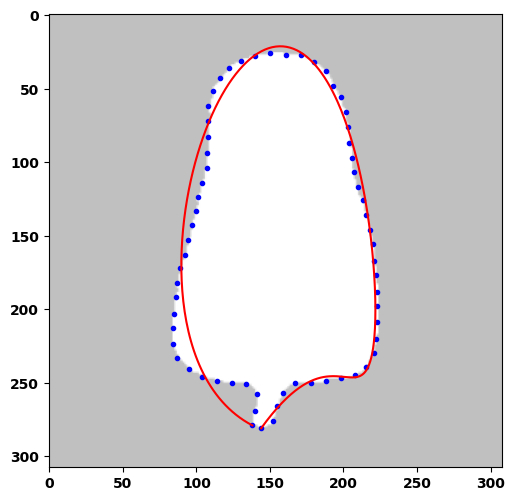

In [5]:
%%time
checkTo(6,mode=1,N=5,err_th=1.0)